In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [162]:
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import io
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
from geopy.geocoders import Nominatim
from time import sleep
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

In [142]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [143]:
data=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Processed Data/Eco_Strava_data.csv')
data['Strava_MADT']=data['stv_total']/data['days_in_month']
data.head()

Unnamed: 0    ID location  latitude  longitude  year  month   MTT  \
0           0  3575    urban     32.66    -117.07  2018      3  7684   
1           1  3575    urban     32.66    -117.07  2018      4  8974   
2           2  3575    urban     32.66    -117.07  2018      5  8480   
3           3  3575    urban     32.66    -117.07  2018      6  8796   
4           4  3575    urban     32.66    -117.07  2018      7  8831   

   days_in_month  Simple_MADT  ...      osmId  dist   edge_uid osm_refere  \
0             31       247.87  ...  234828855   d11  305836426  234828855   
1             30       299.13  ...  234828855   d11  305836426  234828855   
2             31       273.55  ...  234828855   d11  305836426  234828855   
3             30       293.20  ...  234828855   d11  305836426  234828855   
4             31       284.87  ...  234828855   d11  305836426  234828855   

  stv_total stv_com_total stv_rec_total stv_com_ratio stv_rec_ratio  \
0      2115           120          1995          0.06          0.94   
1      2245           155          2090          0.07          0.93   
2      2530           175          2355          0.07          0.93   
3      2335           145          2190          0.06          0.94   
4      2550           135          2415          0.05          0.95   

   Strava_MADT  
0        68.23  
1        74.83  
2        81.61  
3        77.83  
4        82.26  

[5 rows x 45 columns]

In [17]:
data.columns

Index(['Unnamed: 0', 'ID', 'location', 'latitude', 'longitude', 'year',
       'month', 'MTT', 'days_in_month', 'Simple_MADT', 'AASHTO_MADT', 'diff',
       'type', 'geometry', 'road', 'city', 'county', 'state', 'country', 'id',
       'serial_num', 'user_type', 'domain', 'site_name', 'lat', 'long',
       'osmid', 'name', 'OSM Functional Class', 'City Bicycle Facilities',
       'geometry.1', 'GEOID', 'Location_County', 'Region', 'edgeUID_', 'osmId',
       'dist', 'edge_uid', 'osm_refere', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'Strava_MADT'],
      dtype='object')

In [18]:
# Import full Month Data


In [19]:
data['City Bicycle Facilities'].unique()

array(['Path', 'Bike Lane', 'Bike Route', 'Trail', 'Unknown',
       'Cycle Track', 'Other'], dtype=object)

<AxesSubplot:xlabel='AASHTO_MADT', ylabel='Strava_MADT'>

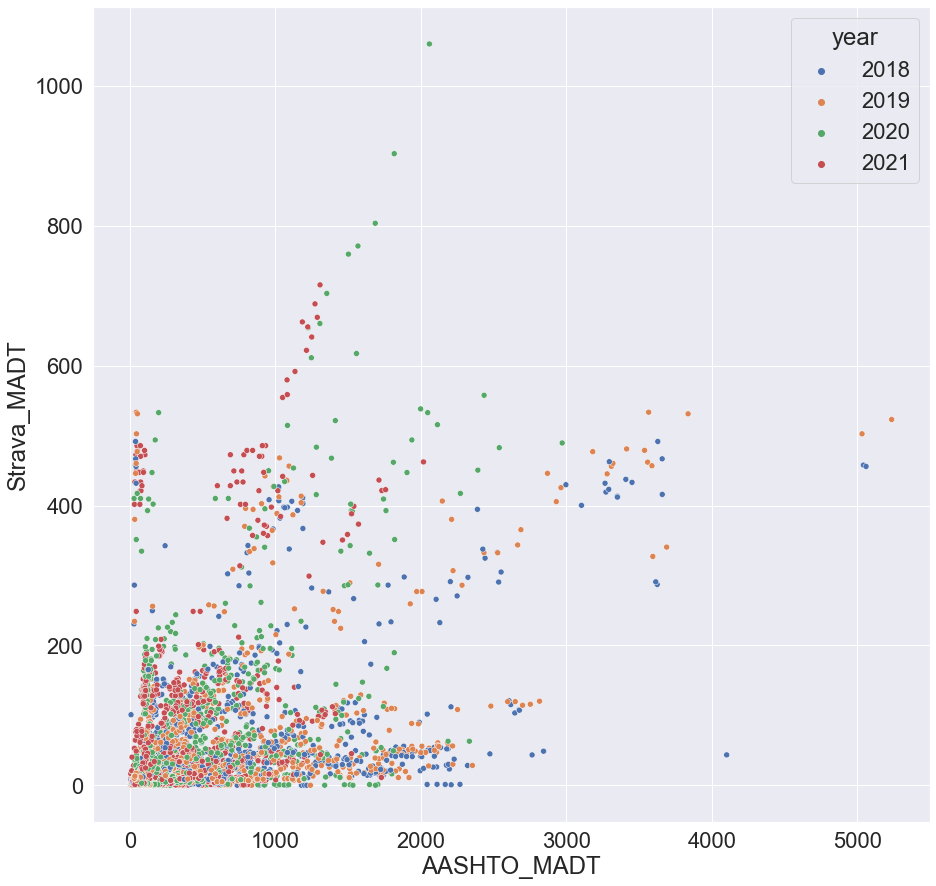

In [20]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale=2.0)
sns.scatterplot(data=data, x="AASHTO_MADT", y="Strava_MADT", hue="year", palette="deep")

<AxesSubplot:xlabel='Simple_MADT', ylabel='Strava_MADT'>

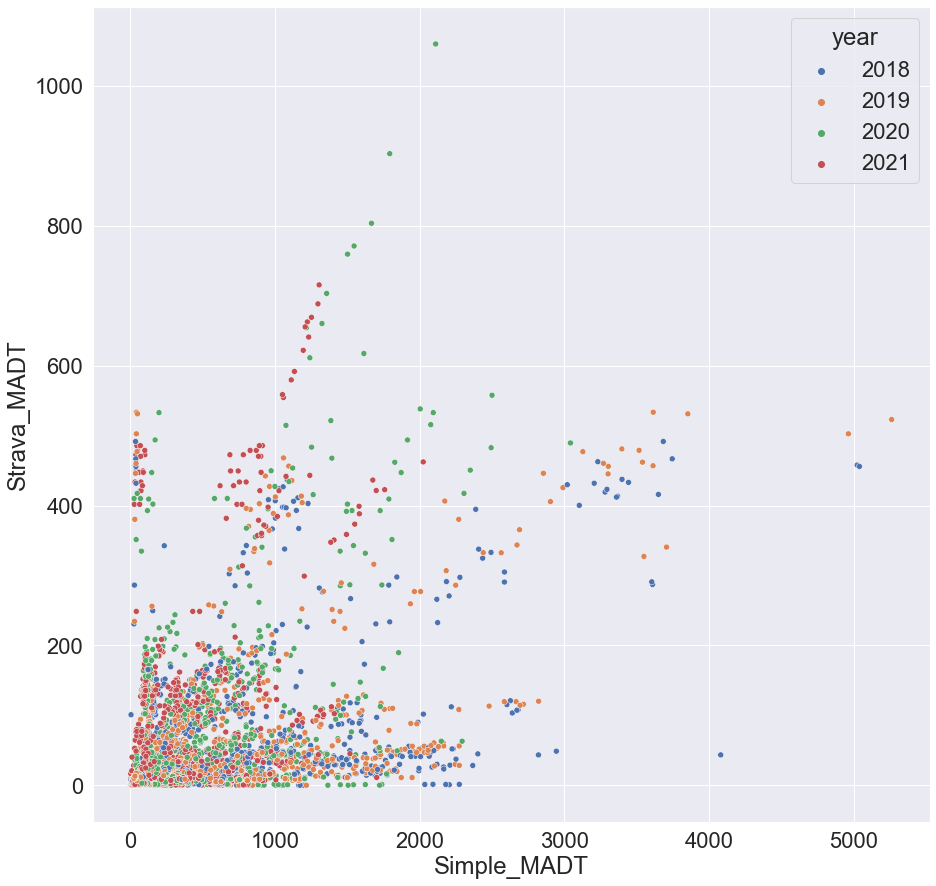

In [21]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale=2.0)
sns.scatterplot(data=data, x="Simple_MADT", y="Strava_MADT", hue="year", palette="deep")

# lets separate the Pattern by Bike facilities

In [22]:
data['City Bicycle Facilities'].unique()

array(['Path', 'Bike Lane', 'Bike Route', 'Trail', 'Unknown',
       'Cycle Track', 'Other'], dtype=object)

In [23]:
path=data.loc[data['City Bicycle Facilities']=='Path']

In [24]:
def path_cor(MOY_ind):
    d18=MOY_ind.loc[MOY_ind['year']==2018]
    d19=MOY_ind.loc[MOY_ind['year']==2019]
    d20=MOY_ind.loc[MOY_ind['year']==2020]
    d21=MOY_ind.loc[MOY_ind['year']==2021]
    import seaborn as sns

    sns.set(rc={'figure.figsize':(25,30)})
    sns.set(font_scale=2.0)
    import seaborn as sns


    fig, ax = plt.subplots(2,2)

    ax1 = sns.scatterplot(x=d18['AASHTO_MADT'],y=d18['Strava_MADT'],hue=d18['ID'],palette="deep",
                       markers=True,marker="o",s=40, ax=ax[0,0]) 
    plt.xticks(rotation = 'vertical')
    ax2 = sns.scatterplot(x=d19['AASHTO_MADT'],y=d19['Strava_MADT'],hue=d19['ID'],palette="deep",
                       markers=True,marker="o",s=40,ax=ax[0,1]) 
    plt.xticks(rotation = 'vertical')
    ax3 = sns.scatterplot(x=d20['AASHTO_MADT'],y=d20['Strava_MADT'],hue=d20['ID'],palette="deep",
                       markers=True,marker="o",s=40,ax=ax[1,0])
    plt.xticks(rotation = 'vertical')
    ax4 = sns.scatterplot(x=d21['AASHTO_MADT'],y=d21['Strava_MADT'],hue=d21['ID'],palette="deep",
                       markers=True, marker="o",s=40,ax=ax[1,1]) 
#    ax1.set(ylim=(0, 1000))
#    ax2.set(ylim=(0, 1000))
#    ax3.set(ylim=(0, 1000))
#    ax4.set(ylim=(0, 1000))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    ax1.title.set_text('2018 AASHTO_MADT Vs Strava_MADT')
    ax2.title.set_text('2019 AASHTO_MADT Vs Strava_MADT')
    ax3.title.set_text('2020 AASHTO_MADT Vs Strava_MADT')
    ax4.title.set_text('2021 AASHTO_MADT Vs Strava_MADT')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
    ax1.set_ylabel('Strava_MADT' )
    ax1.set_xlabel('AASHTO_MADT')
    ax2.set_ylabel('Strava_MADT' )
    ax2.set_xlabel('AASHTO_MADT')
    ax3.set_ylabel('Strava_MADT' )
    ax3.set_xlabel('AASHTO_MADT')
    ax4.set_ylabel('Strava_MADT' )
    ax4.set_xlabel('AASHTO_MADT')
    plt.show()

In [146]:
def path_cor_simple(MOY_ind):
    d18=MOY_ind.loc[MOY_ind['year']==2018]
    d19=MOY_ind.loc[MOY_ind['year']==2019]
    d20=MOY_ind.loc[MOY_ind['year']==2020]
    d21=MOY_ind.loc[MOY_ind['year']==2021]
    import seaborn as sns

    sns.set(rc={'figure.figsize':(25,30)})
    sns.set(font_scale=2.0)
    import seaborn as sns


    fig, ax = plt.subplots(2,2)

    ax1 = sns.scatterplot(x=d18['Simple_MADT'],y=d18['Strava_MADT'],hue=d18['ID'],palette="deep",
                       markers=True,marker="o",s=40, ax=ax[0,0]) 
    plt.xticks(rotation = 'vertical')
    ax2 = sns.scatterplot(x=d19['Simple_MADT'],y=d19['Strava_MADT'],hue=d19['ID'],palette="deep",
                       markers=True,marker="o",s=40,ax=ax[0,1]) 
    plt.xticks(rotation = 'vertical')
    ax3 = sns.scatterplot(x=d20['Simple_MADT'],y=d20['Strava_MADT'],hue=d20['ID'],palette="deep",
                       markers=True,marker="o",s=40,ax=ax[1,0])
    plt.xticks(rotation = 'vertical')
    ax4 = sns.scatterplot(x=d21['Simple_MADT'],y=d21['Strava_MADT'],hue=d21['ID'],palette="deep",
                       markers=True, marker="o",s=40,ax=ax[1,1]) 
#    ax1.set(ylim=(0, 1000))
#    ax2.set(ylim=(0, 1000))
#    ax3.set(ylim=(0, 1000))
#    ax4.set(ylim=(0, 1000))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    ax1.title.set_text('2018 Simple_MADT Vs Strava_MADT')
    ax2.title.set_text('2019 Simple_MADT Vs Strava_MADT')
    ax3.title.set_text('2020 Simple_MADT Vs Strava_MADT')
    ax4.title.set_text('2021 Simple_MADT Vs Strava_MADT')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
    ax1.set_ylabel('Strava_MADT' )
    ax1.set_xlabel('Simple_MADT')
    ax2.set_ylabel('Strava_MADT' )
    ax2.set_xlabel('Simple_MADT')
    ax3.set_ylabel('Strava_MADT' )
    ax3.set_xlabel('Simple_MADT')
    ax4.set_ylabel('Strava_MADT' )
    ax4.set_xlabel('Simple_MADT')
    plt.show()

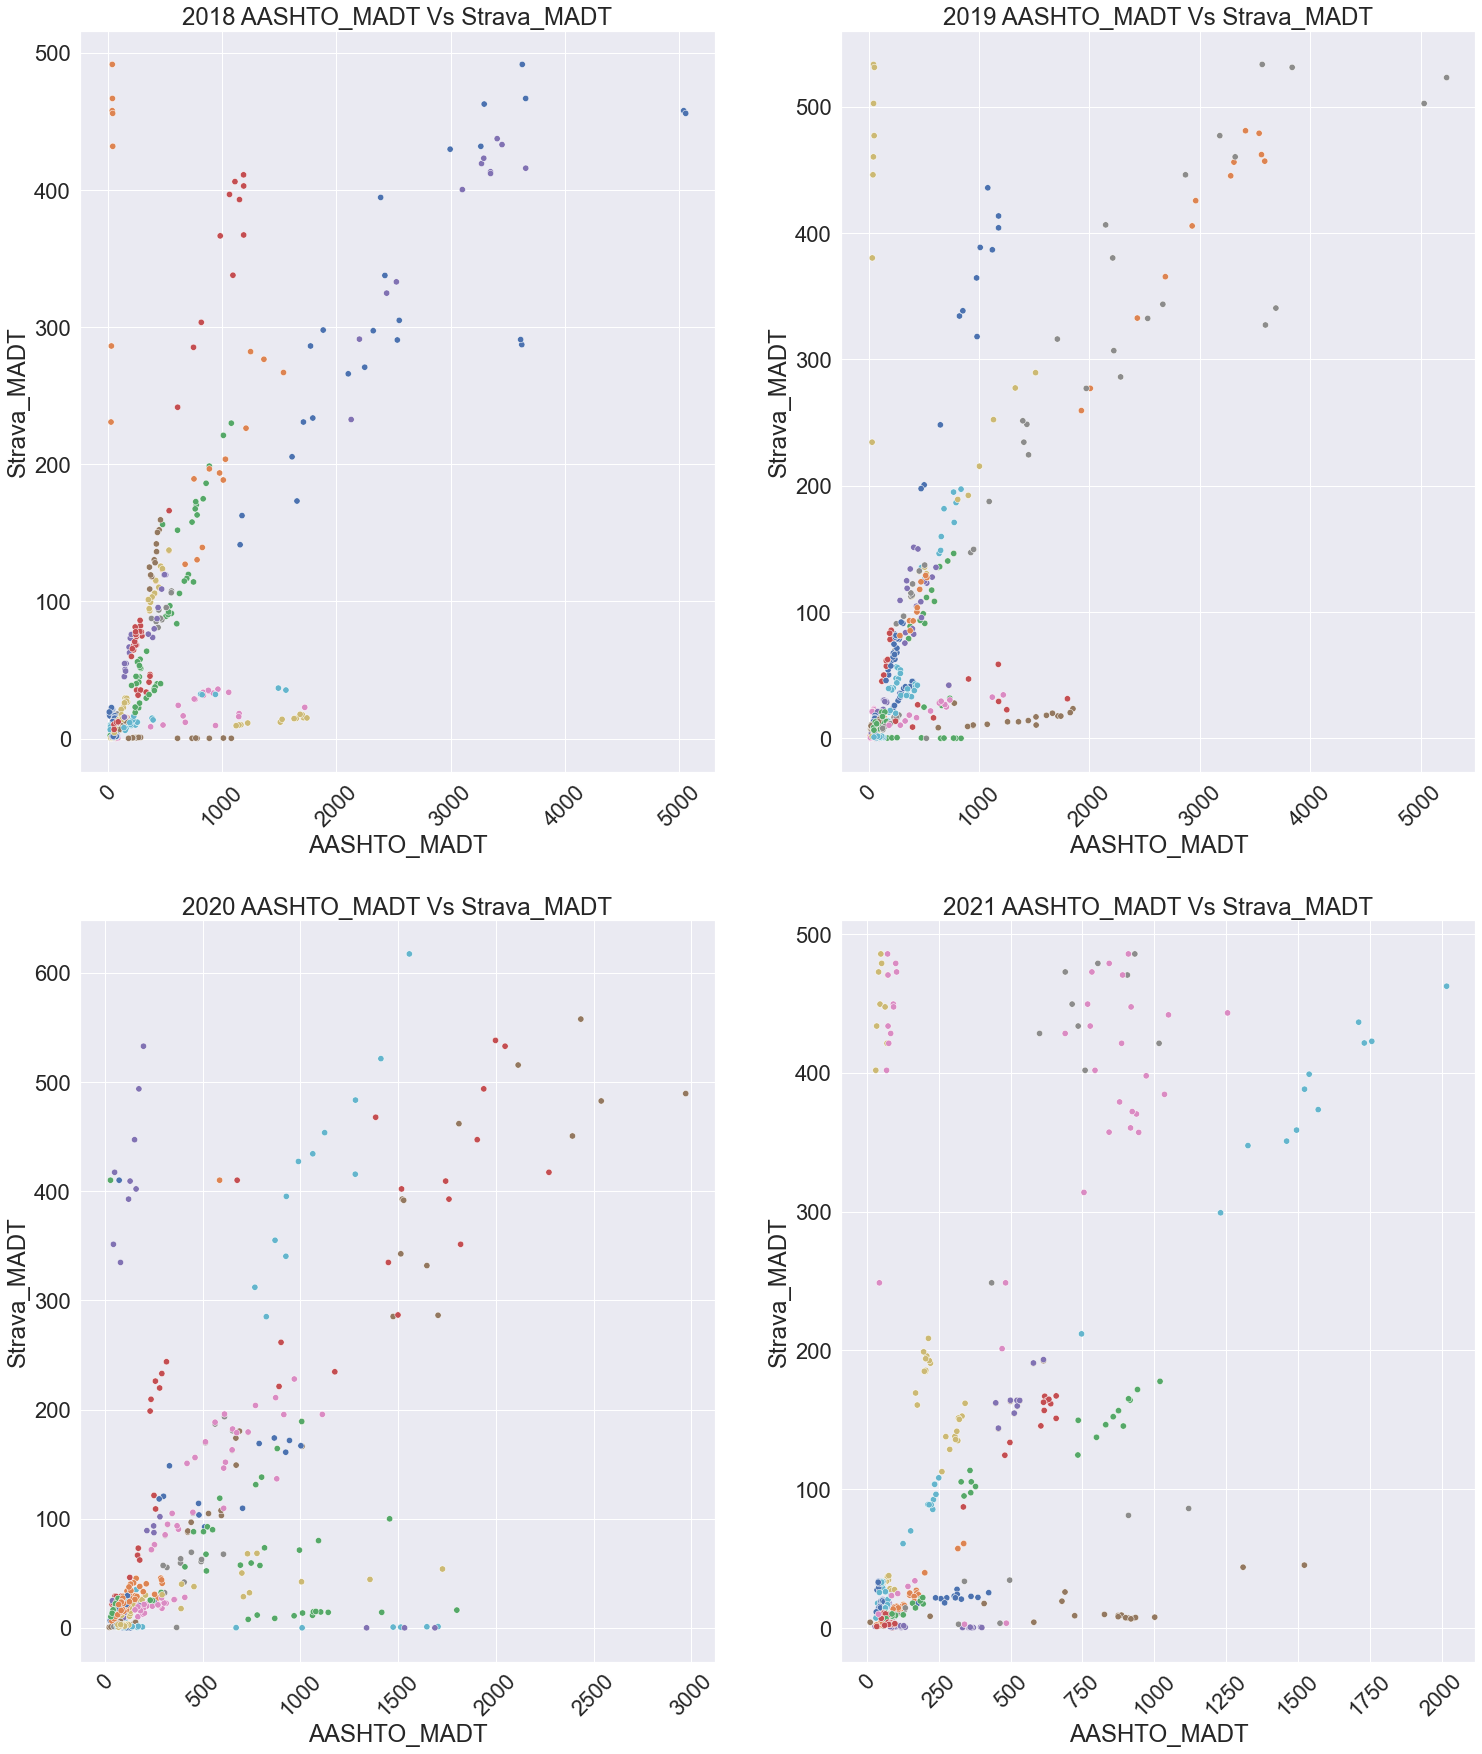

In [25]:
path_cor(path)

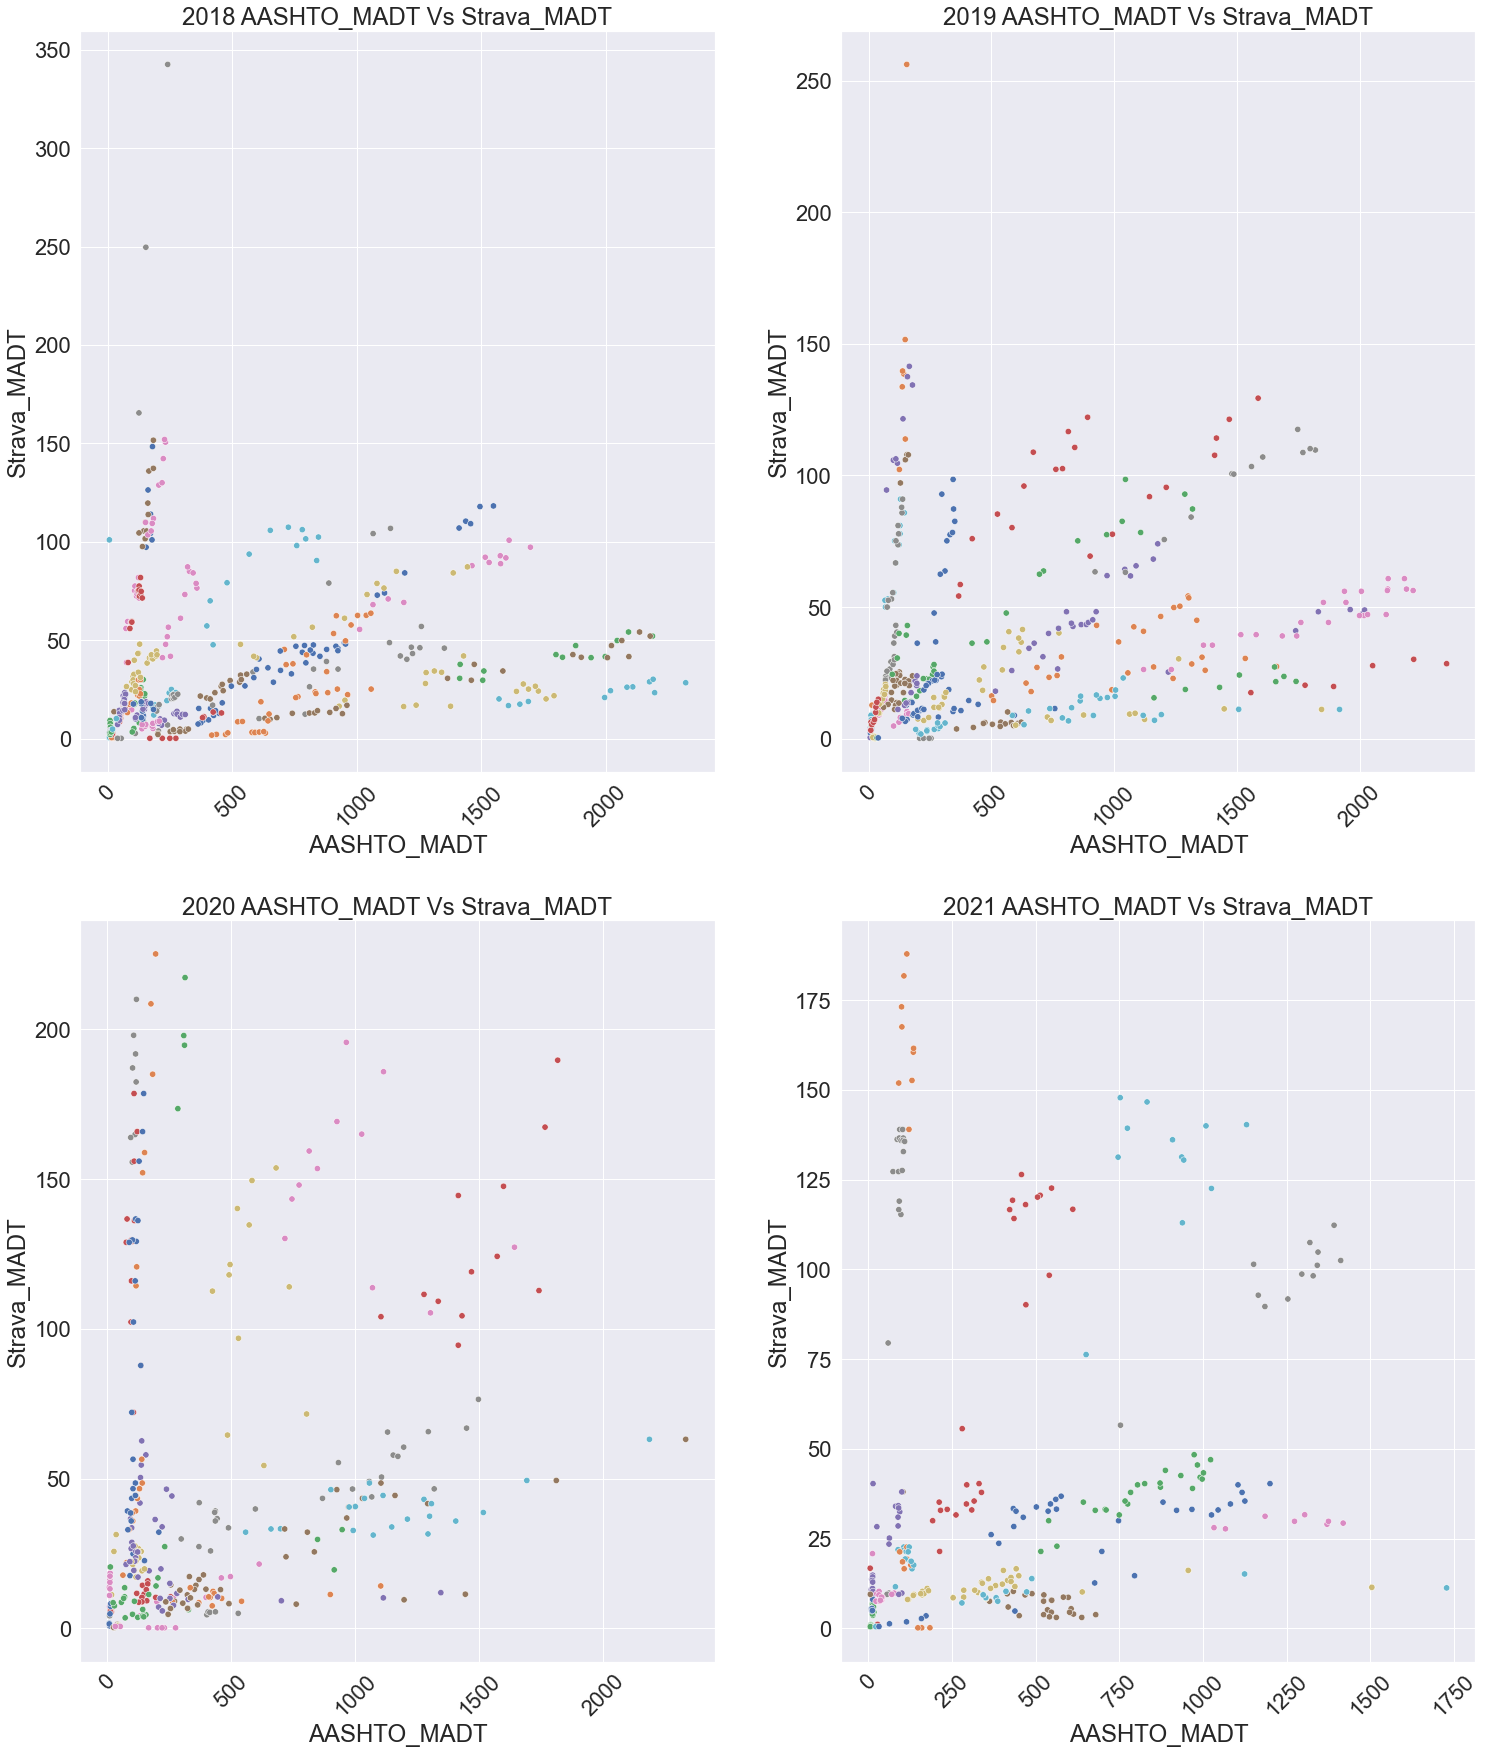

In [26]:
bl=data.loc[data['City Bicycle Facilities']=='Bike Lane']
path_cor(bl)

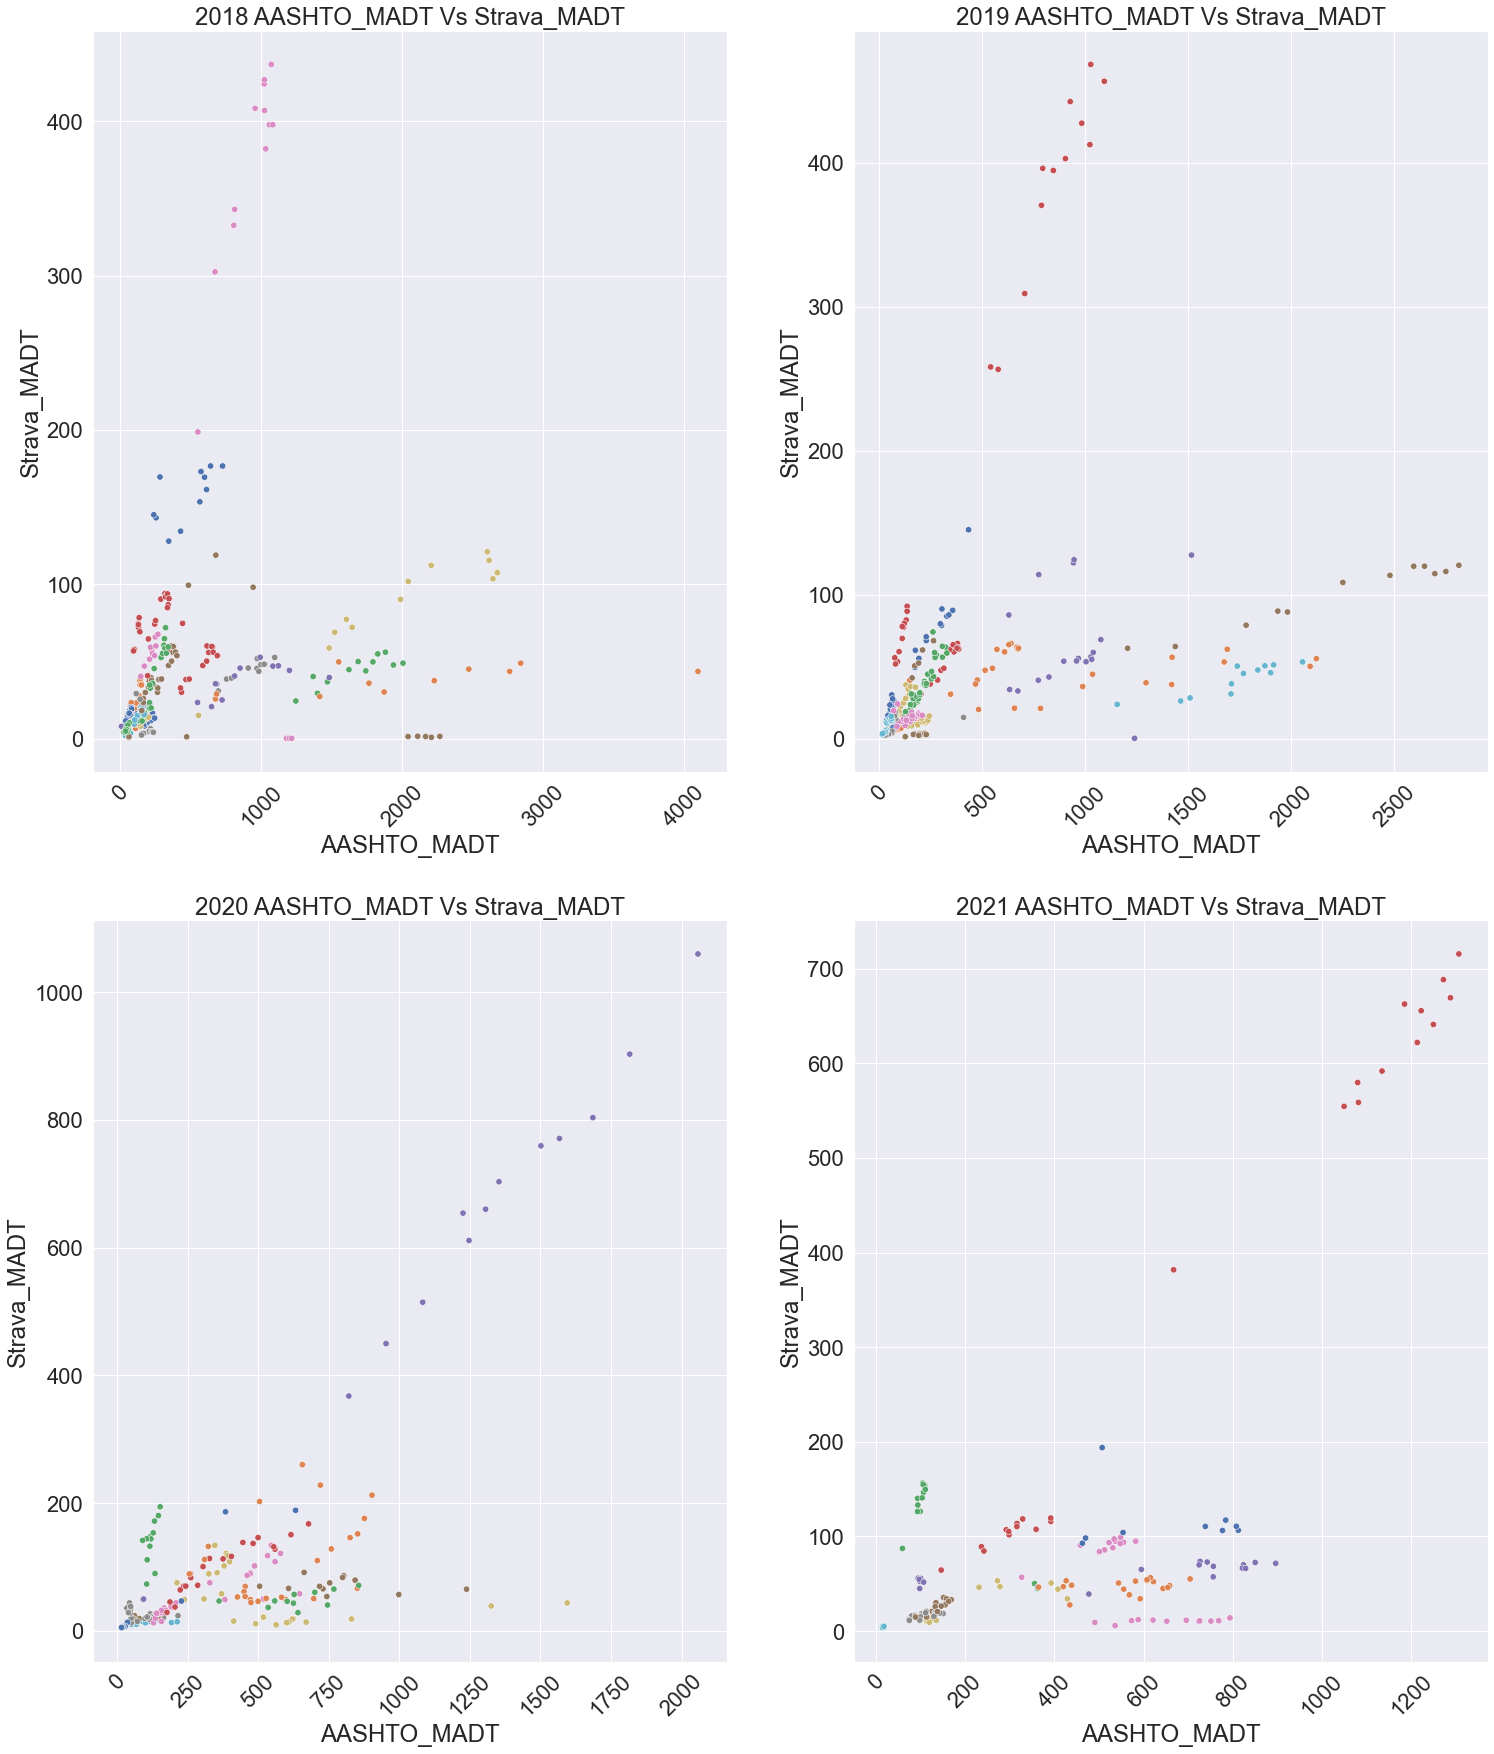

In [27]:
br=data.loc[data['City Bicycle Facilities']=='Bike Route']
path_cor(br)

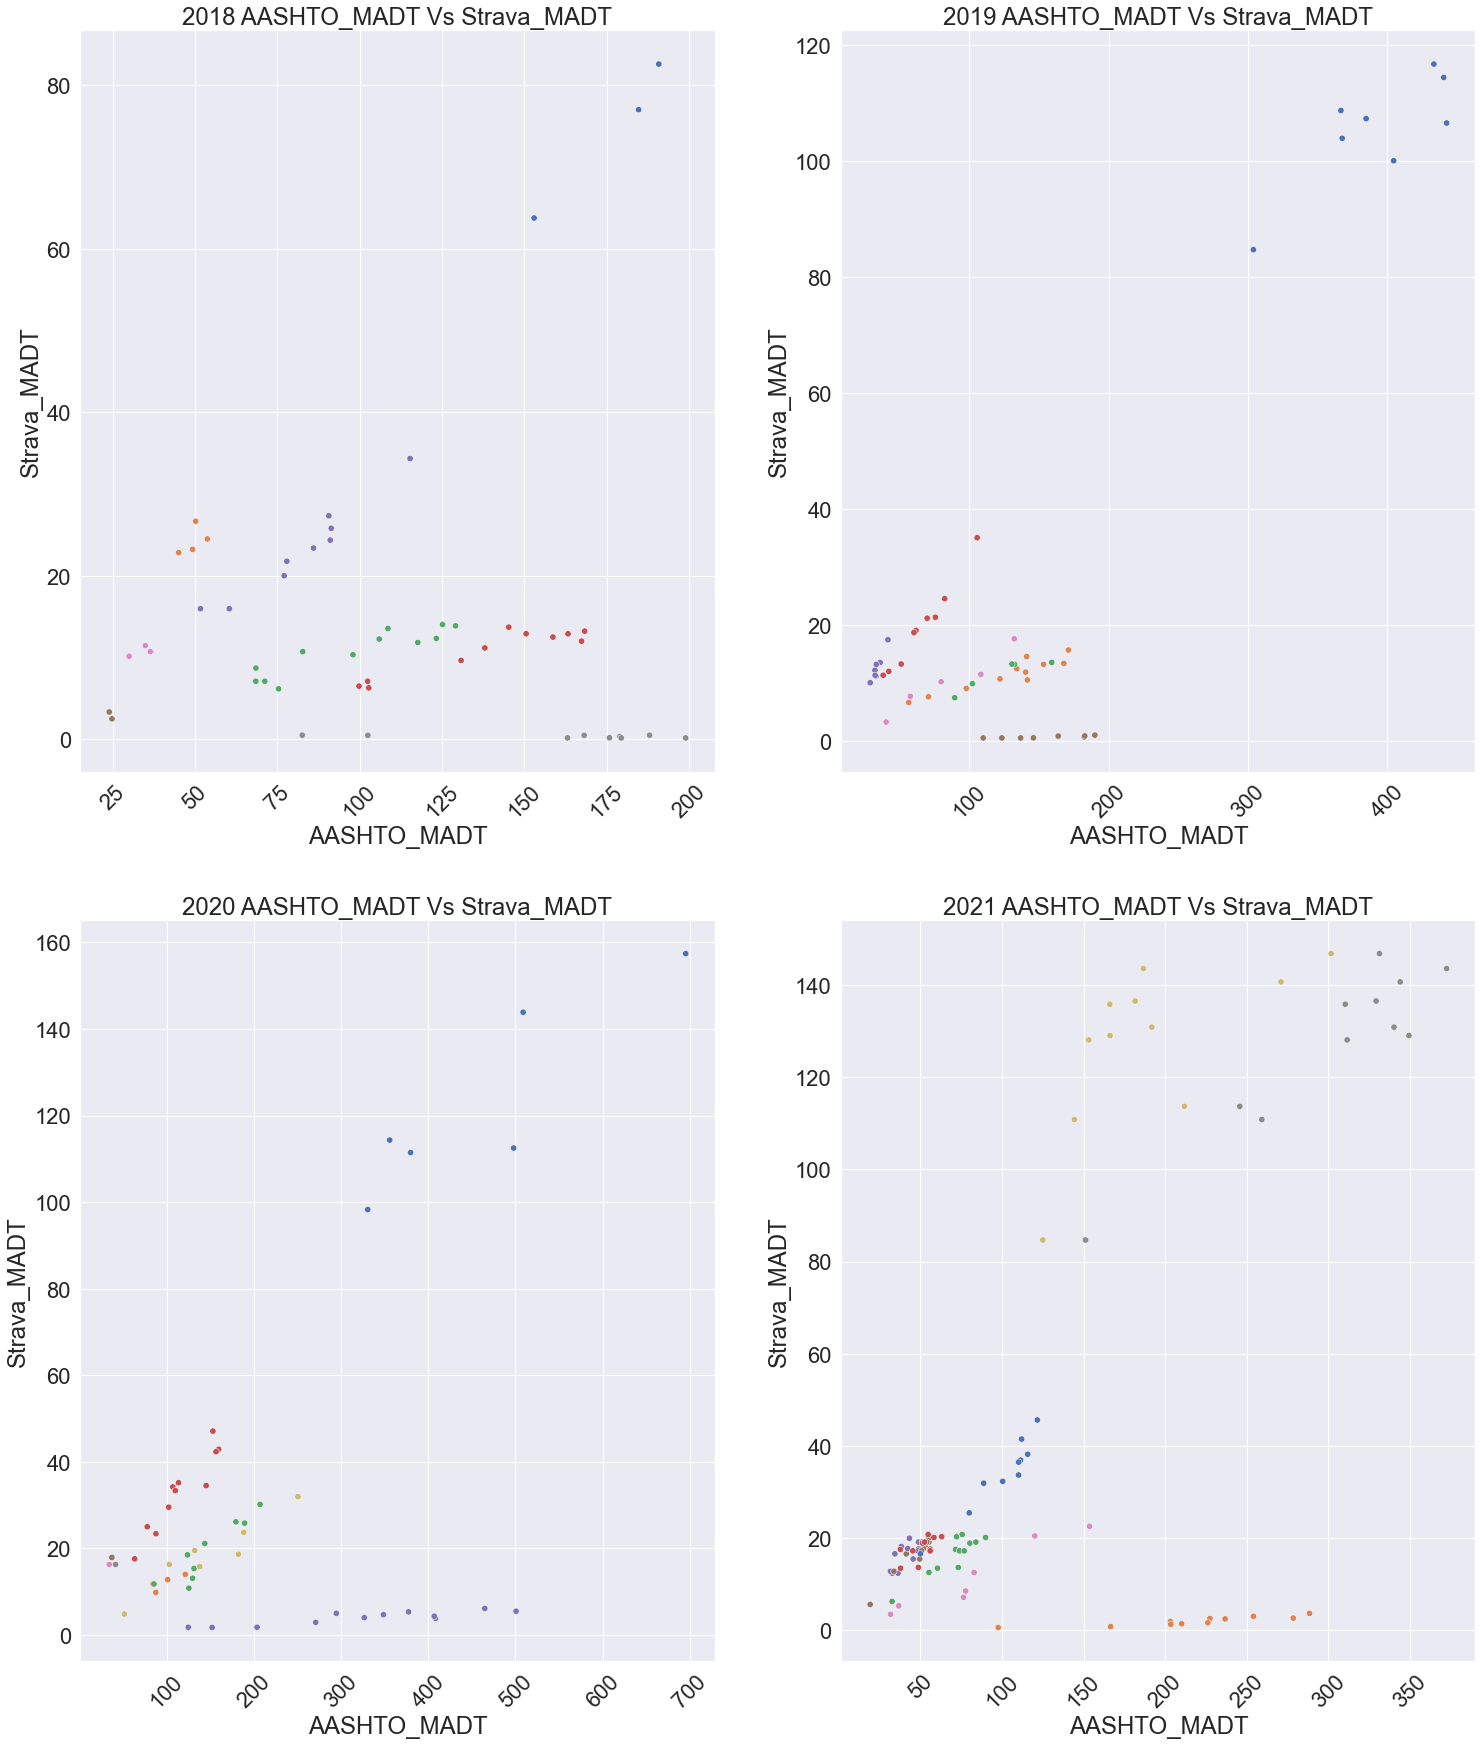

In [28]:
tl=data.loc[data['City Bicycle Facilities']=='Trail']
path_cor(tl)

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2892\2691221900.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax1 = sns.scatterplot(x=d18['AASHTO_MADT'],y=d18['Strava_MADT'],hue=d18['ID'],palette="deep",


AttributeError: 'NoneType' object has no attribute 'remove'

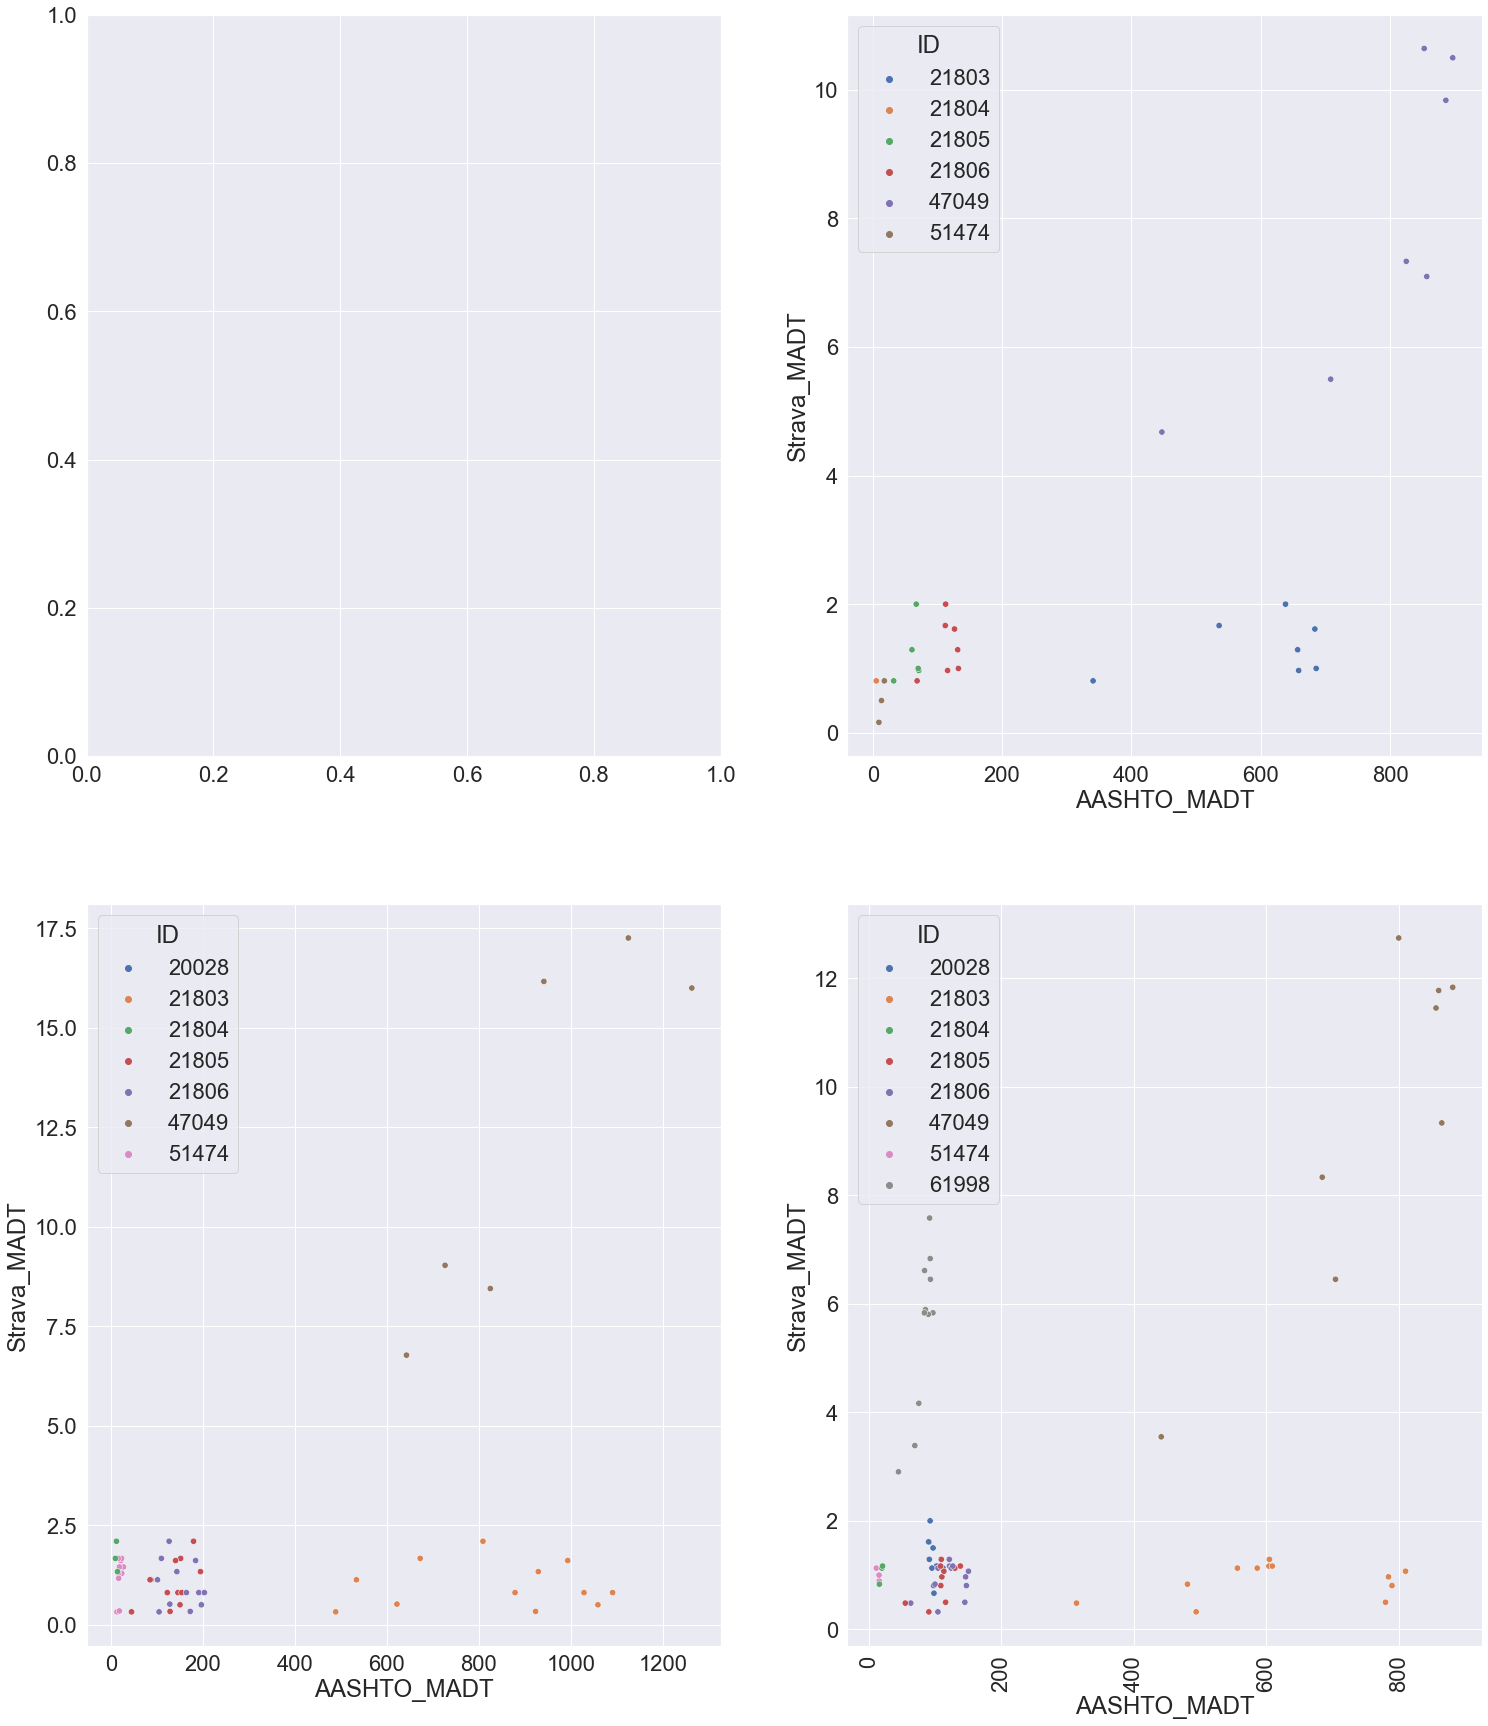

In [29]:
ct=data.loc[data['City Bicycle Facilities']=='Cycle Track']
path_cor(ct)

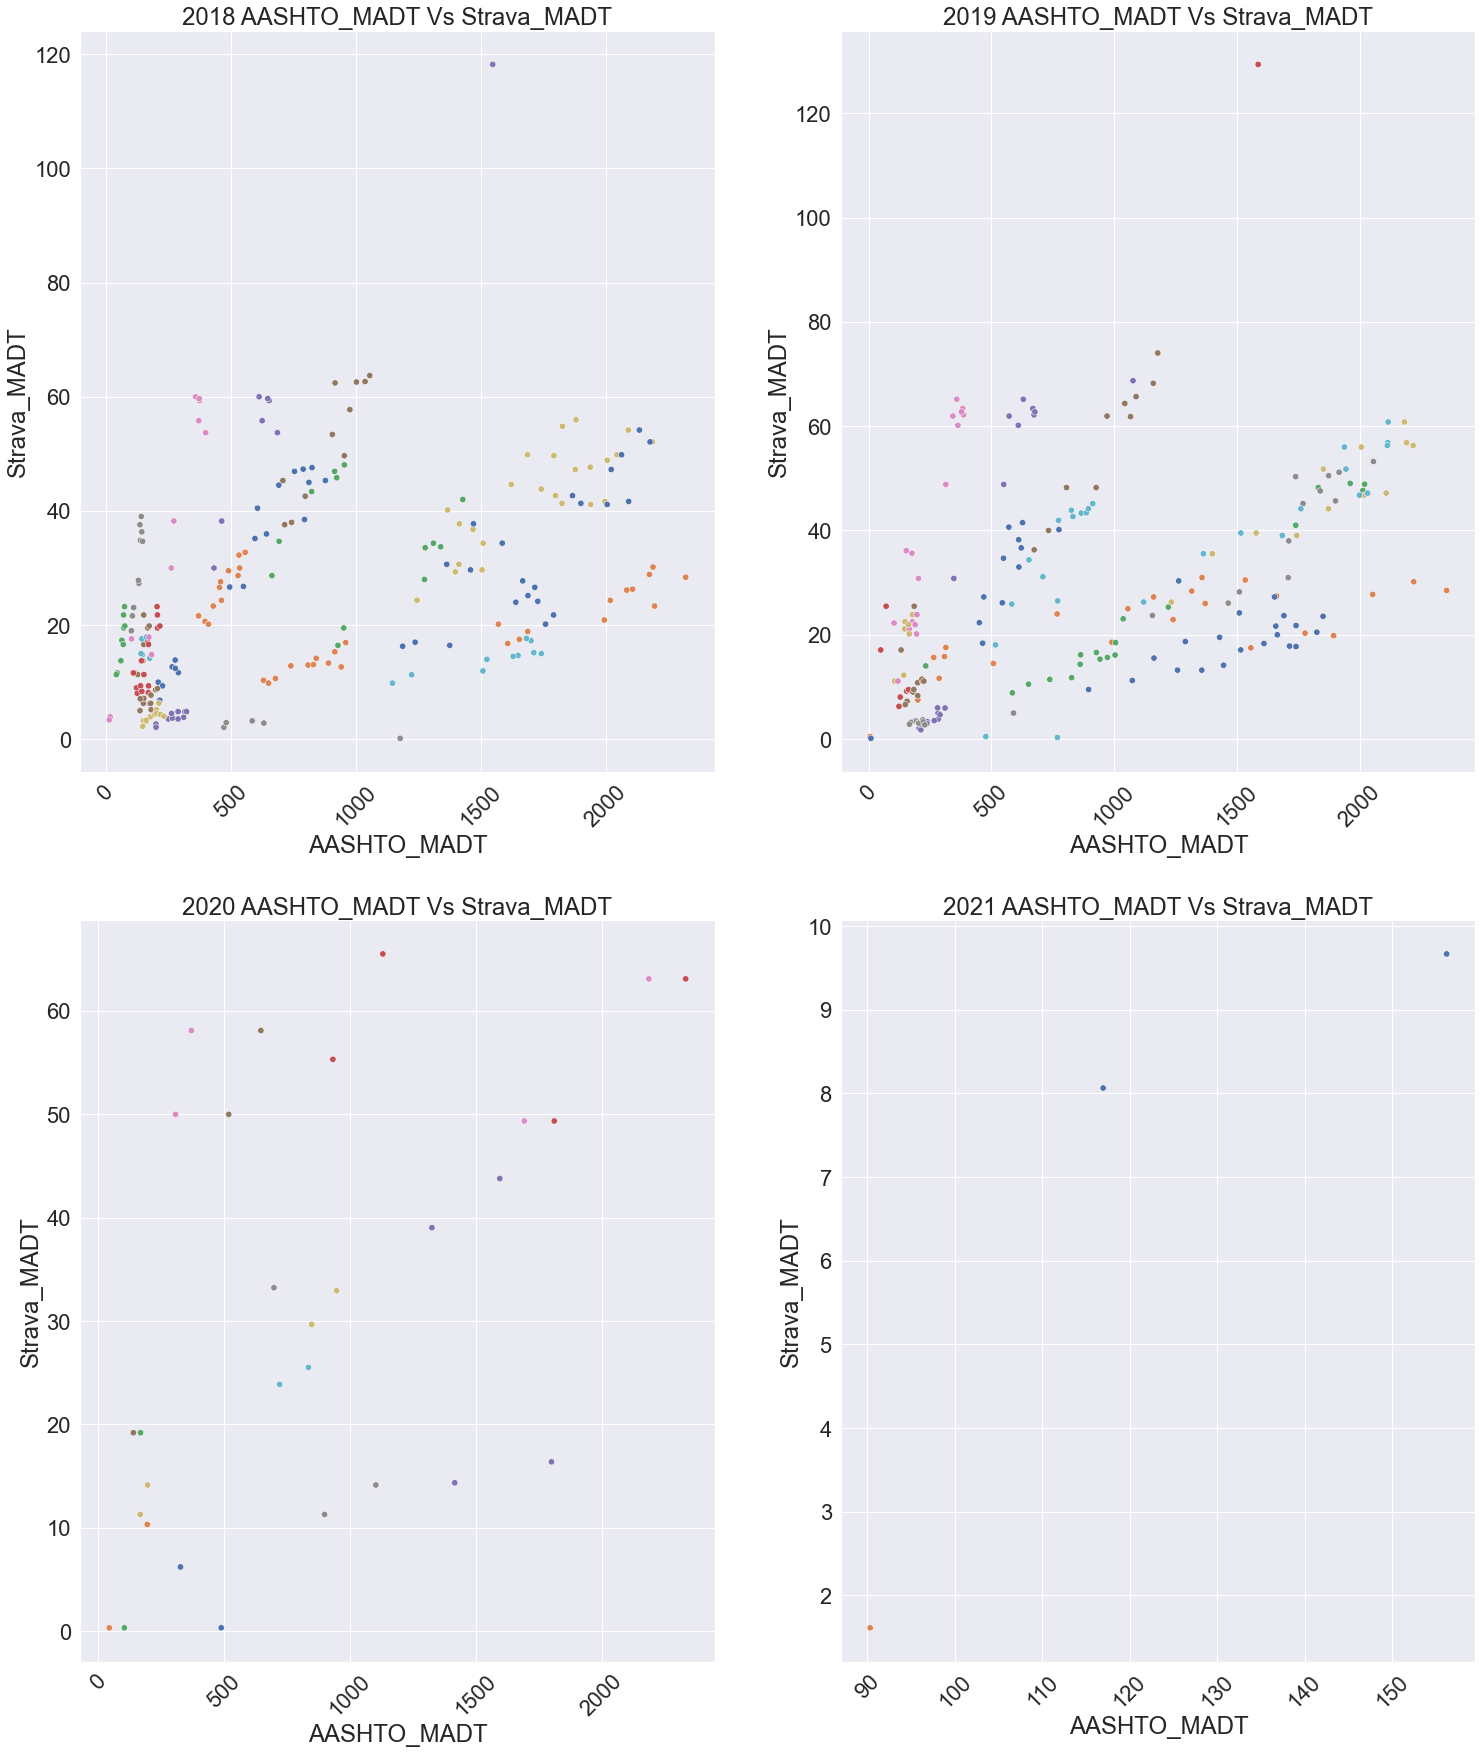

In [30]:
# Dive Commute Vs Recreation
com=data.loc[data['stv_com_ratio']>=0.60]
path_cor(com)

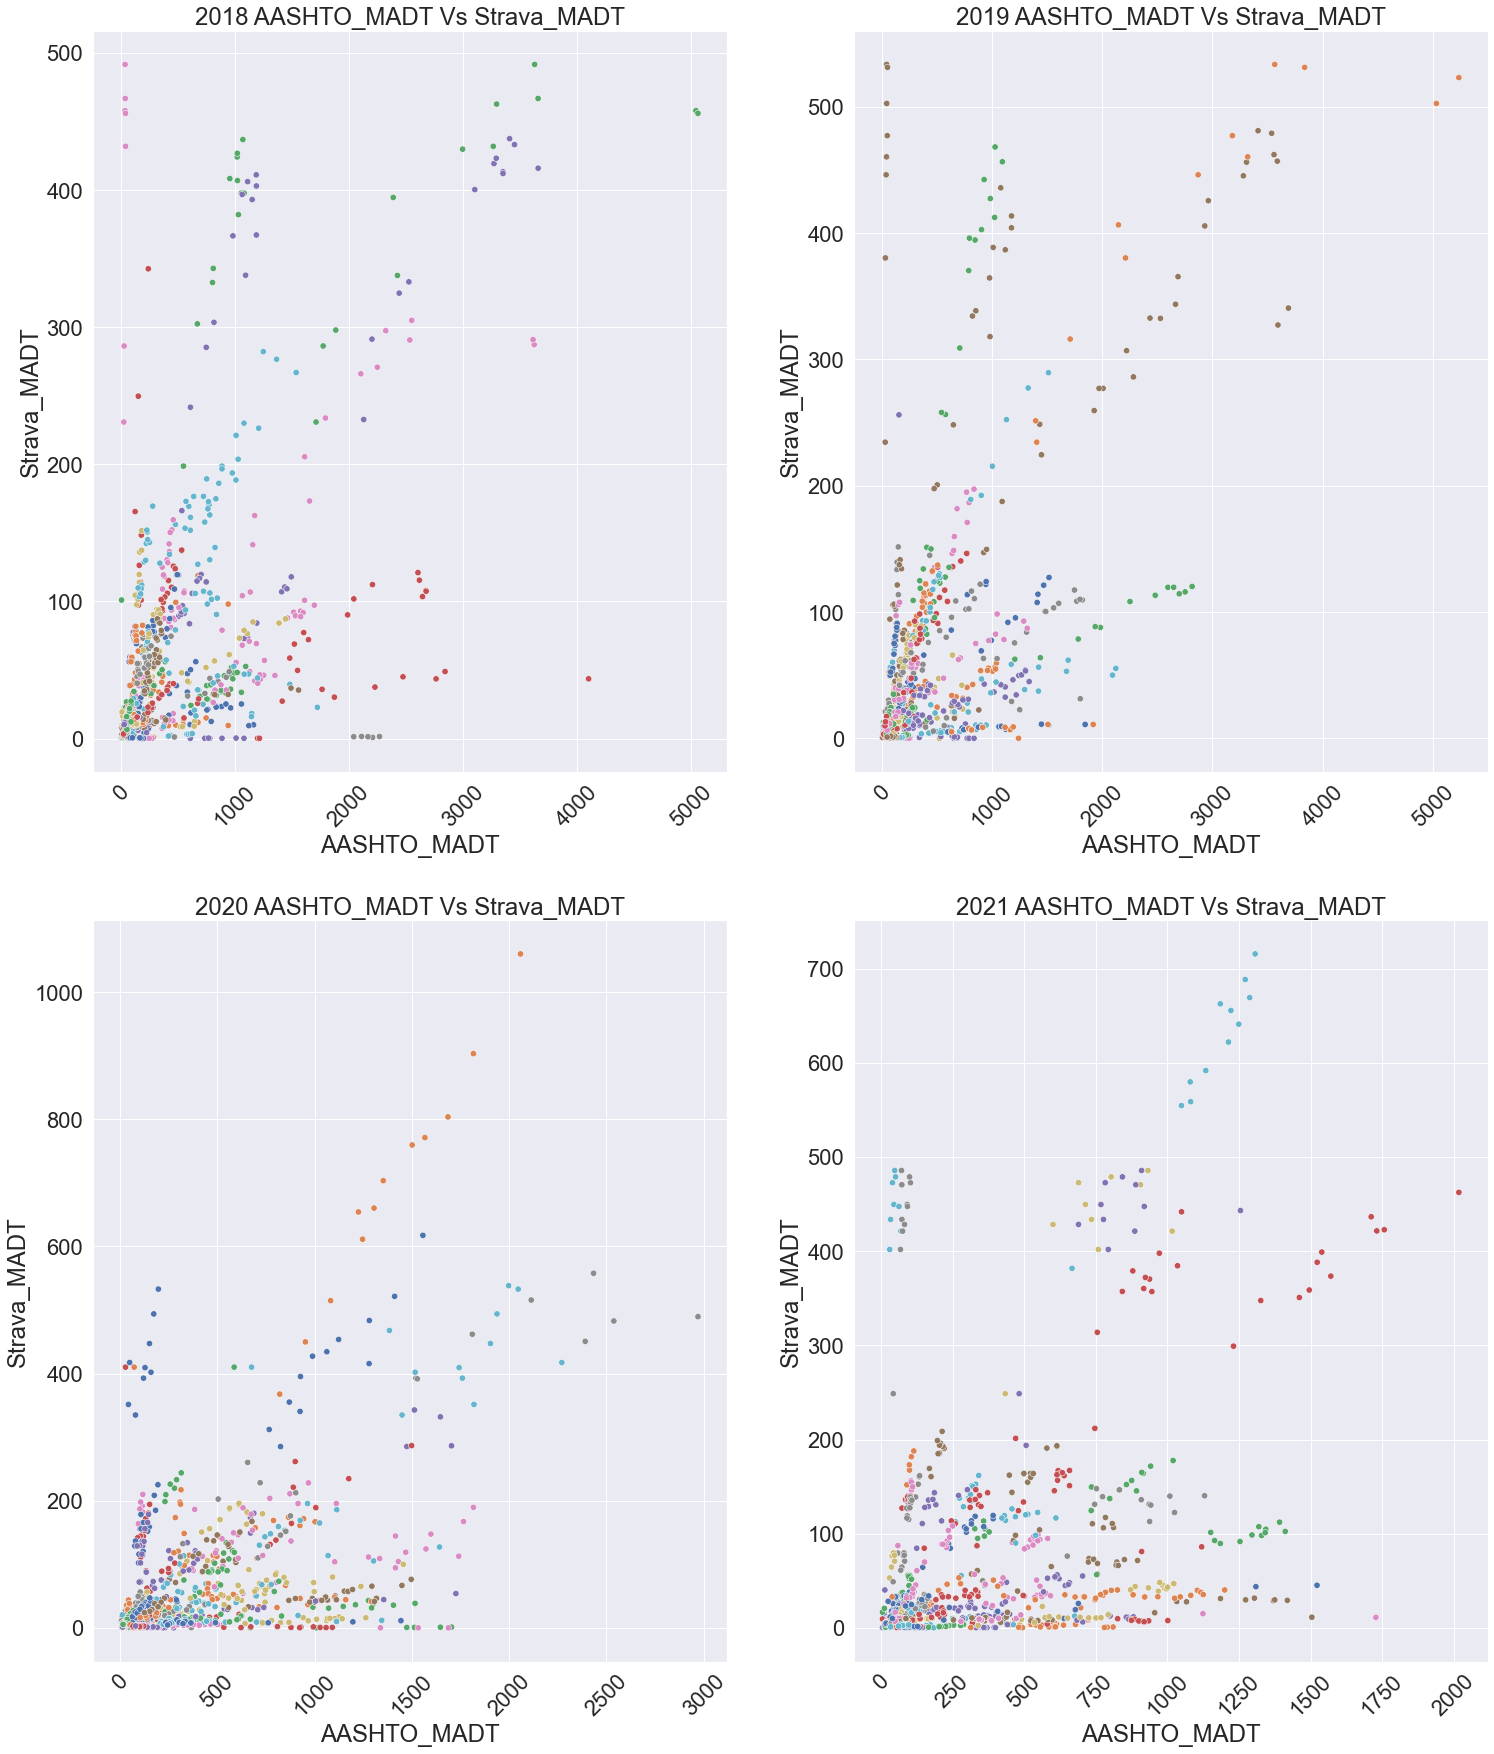

In [31]:
coml=data.loc[data['stv_com_ratio']<0.60]
path_cor(coml)

In [32]:
data.columns

Index(['Unnamed: 0', 'ID', 'location', 'latitude', 'longitude', 'year',
       'month', 'MTT', 'days_in_month', 'Simple_MADT', 'AASHTO_MADT', 'diff',
       'type', 'geometry', 'road', 'city', 'county', 'state', 'country', 'id',
       'serial_num', 'user_type', 'domain', 'site_name', 'lat', 'long',
       'osmid', 'name', 'OSM Functional Class', 'City Bicycle Facilities',
       'geometry.1', 'GEOID', 'Location_County', 'Region', 'edgeUID_', 'osmId',
       'dist', 'edge_uid', 'osm_refere', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'Strava_MADT'],
      dtype='object')

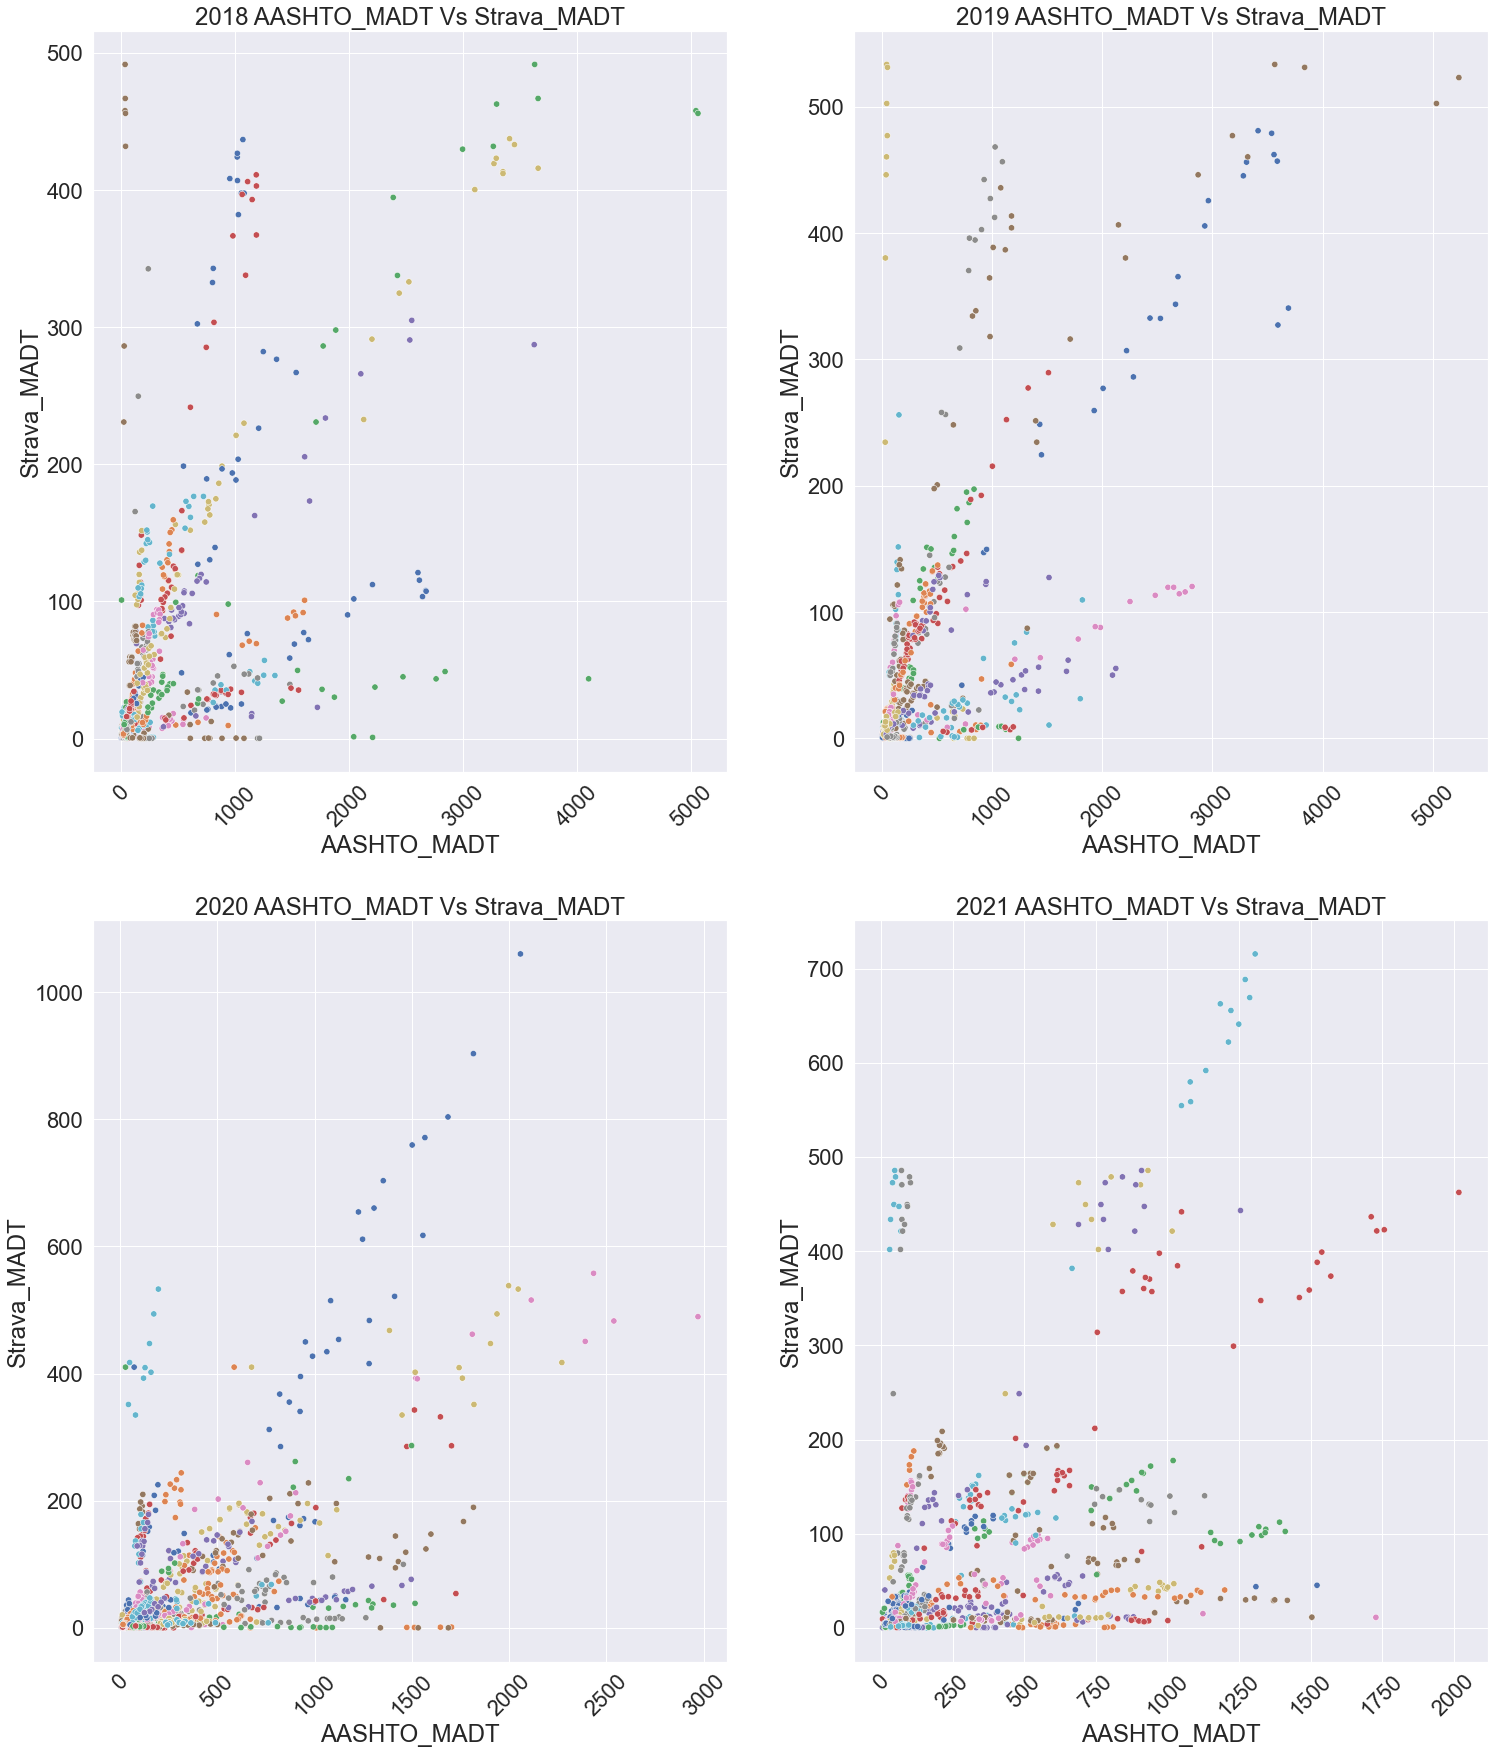

In [33]:
# Dive Commute Vs Recreation
rec=data.loc[data['stv_rec_ratio']>=0.60]
path_cor(rec)

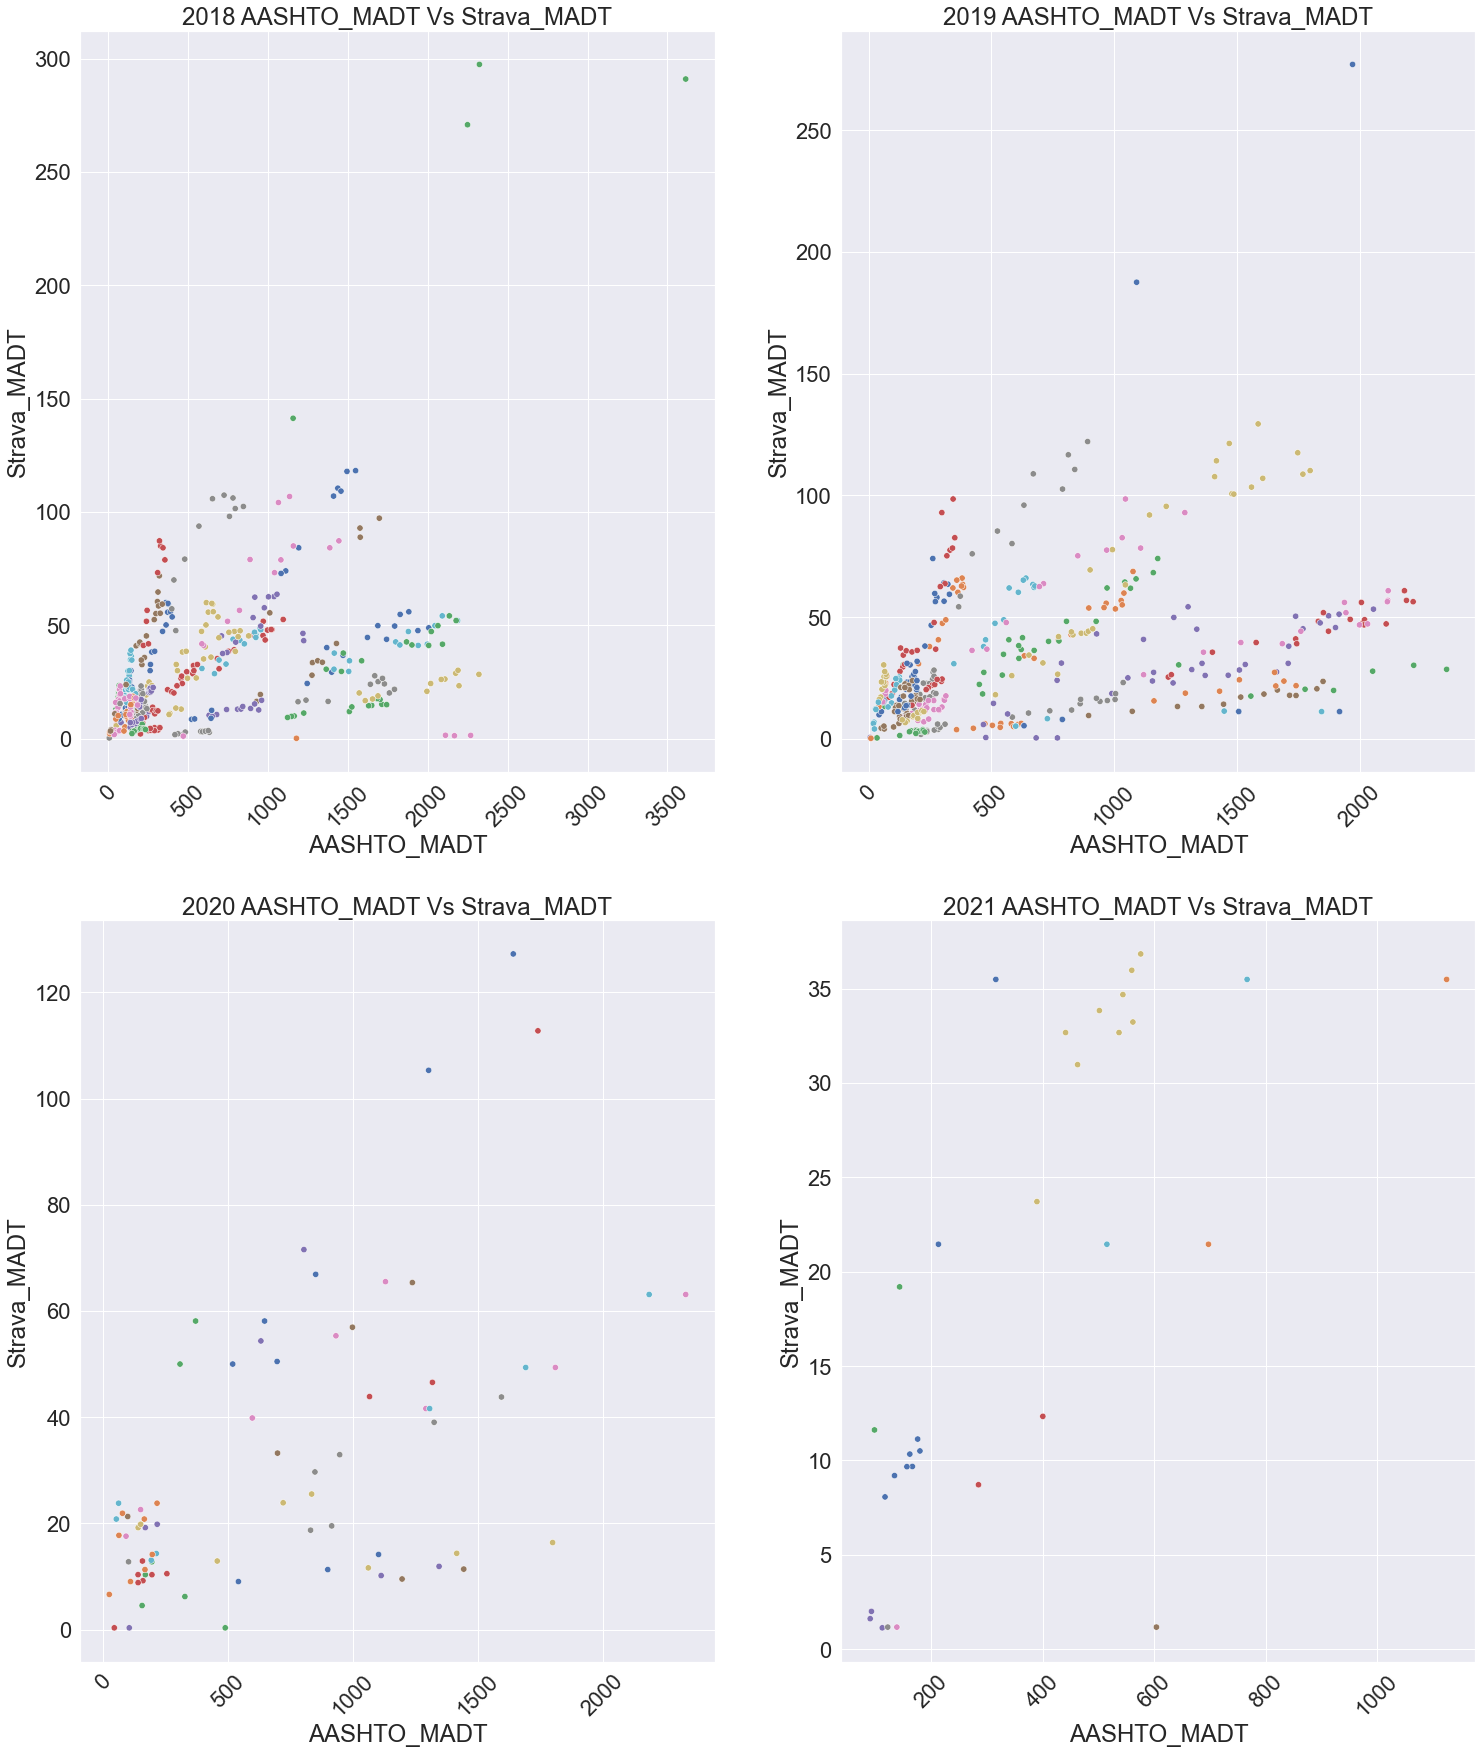

In [34]:
# Dive Commute Vs Recreation
recl=data.loc[data['stv_rec_ratio']<0.60]
path_cor(recl)

# split the pattern by seasonality

In [35]:
data.columns

Index(['Unnamed: 0', 'ID', 'location', 'latitude', 'longitude', 'year',
       'month', 'MTT', 'days_in_month', 'Simple_MADT', 'AASHTO_MADT', 'diff',
       'type', 'geometry', 'road', 'city', 'county', 'state', 'country', 'id',
       'serial_num', 'user_type', 'domain', 'site_name', 'lat', 'long',
       'osmid', 'name', 'OSM Functional Class', 'City Bicycle Facilities',
       'geometry.1', 'GEOID', 'Location_County', 'Region', 'edgeUID_', 'osmId',
       'dist', 'edge_uid', 'osm_refere', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'Strava_MADT'],
      dtype='object')

In [36]:
# get June/July/August Data
dos678=data[(data['month']>5) &(data['month']<9)]
dos678=dos678[['id','year','AASHTO_MADT']]
dos678c=pd.DataFrame({'Average AASHTO_MADT678' : dos678.groupby(['id','year'])['AASHTO_MADT'].mean()}).reset_index()
dos678c.head()

id  year  Average AASHTO_MADT678
0  100000671  2018                   50.35
1  100000671  2019                   55.62
2  100000671  2020                   90.37
3  100000671  2021                   49.54
4  100002415  2018                 1569.05

In [37]:
# get December/January/February Data
dos12=data.loc[data['month']==12]
dos1=data.loc[data['month']==1]
dos3=data.loc[data['month']==2]
dos1213=pd.concat([dos12,dos1,dos3],axis=0)
dos1213=dos1213[['id','year','AASHTO_MADT']]
dos12131=pd.DataFrame({'Average AASHTO_MADT12131' : dos1213.groupby(['id','year'])['AASHTO_MADT'].mean()}).reset_index()
dos12131.head()

id  year  Average AASHTO_MADT12131
0  100000671  2018                     56.10
1  100000671  2019                     35.25
2  100000671  2020                     58.51
3  100000671  2021                     35.96
4  100002415  2018                   1217.95

In [38]:
seasonal_data=pd.merge(dos12131,dos678c, left_on=['id','year'],right_on=['id','year'],how='inner')
seasonal_data['seasonal_factor']=seasonal_data['Average AASHTO_MADT678']/seasonal_data['Average AASHTO_MADT12131']
seasonal_data=seasonal_data[['id','year','seasonal_factor']]
seasonal_data.head()

id  year  seasonal_factor
0  100000671  2018             0.90
1  100000671  2019             1.58
2  100000671  2020             1.54
3  100000671  2021             1.38
4  100002415  2018             1.29

In [39]:
seasonal_data.shape

(400, 3)

In [40]:
data1=pd.merge(data, seasonal_data, on=['id','year'], how='inner')
data1.shape

(4557, 46)

In [41]:
data1['seasonal_factor'].describe()

count   4557.00
mean       1.67
std        2.29
min        0.28
25%        1.21
50%        1.36
75%        1.58
max       36.44
Name: seasonal_factor, dtype: float64

In [42]:
hs=data1.loc[data1['seasonal_factor']>3]
hs['county'].unique()

array(['El Dorado County', 'Alameda County', nan], dtype=object)

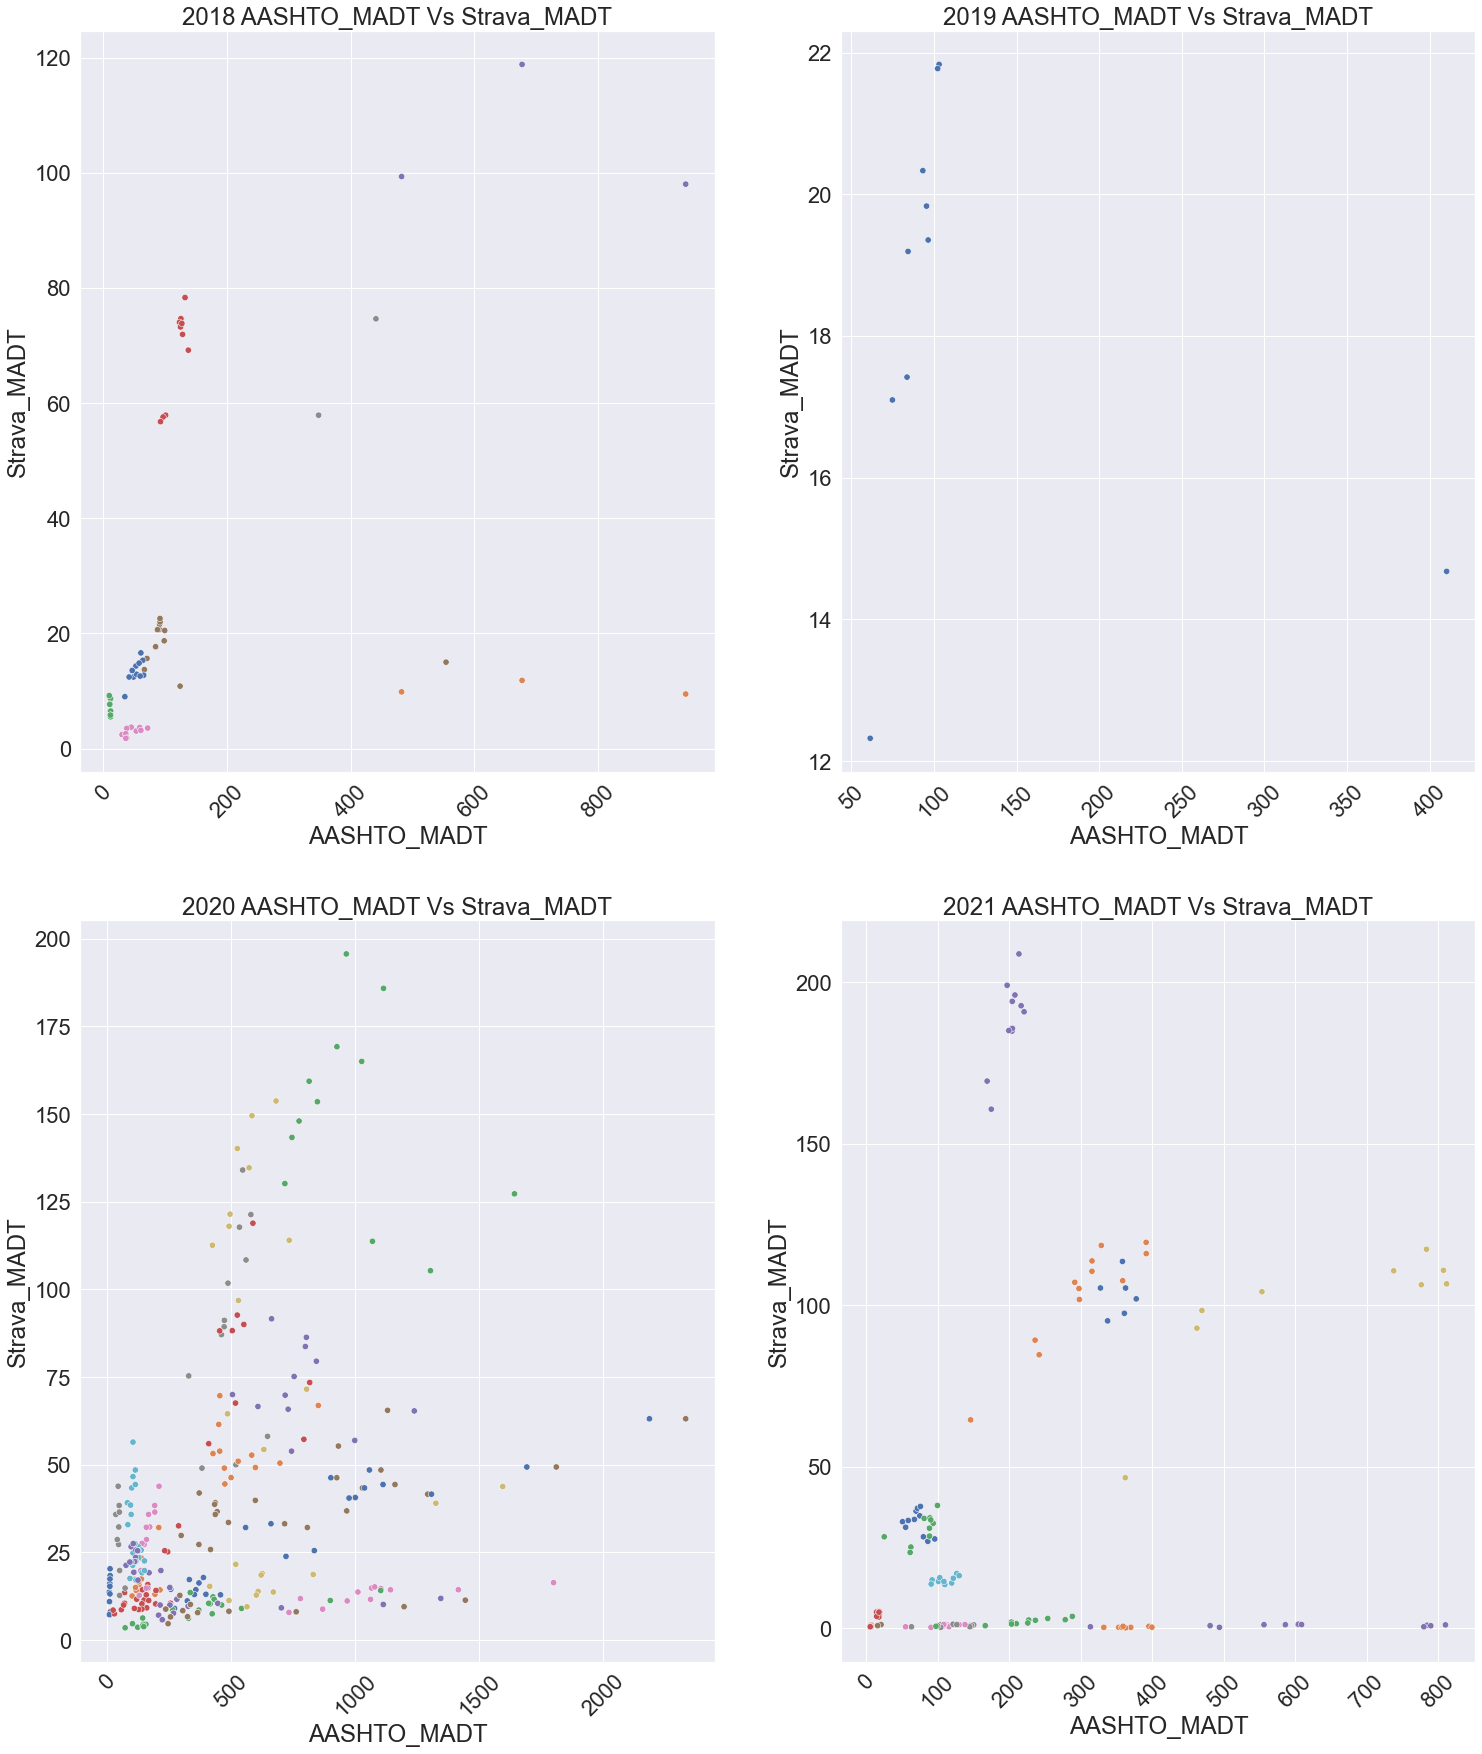

In [43]:
d1m=data1.loc[data1['seasonal_factor']<=1.0]
path_cor(d1m)

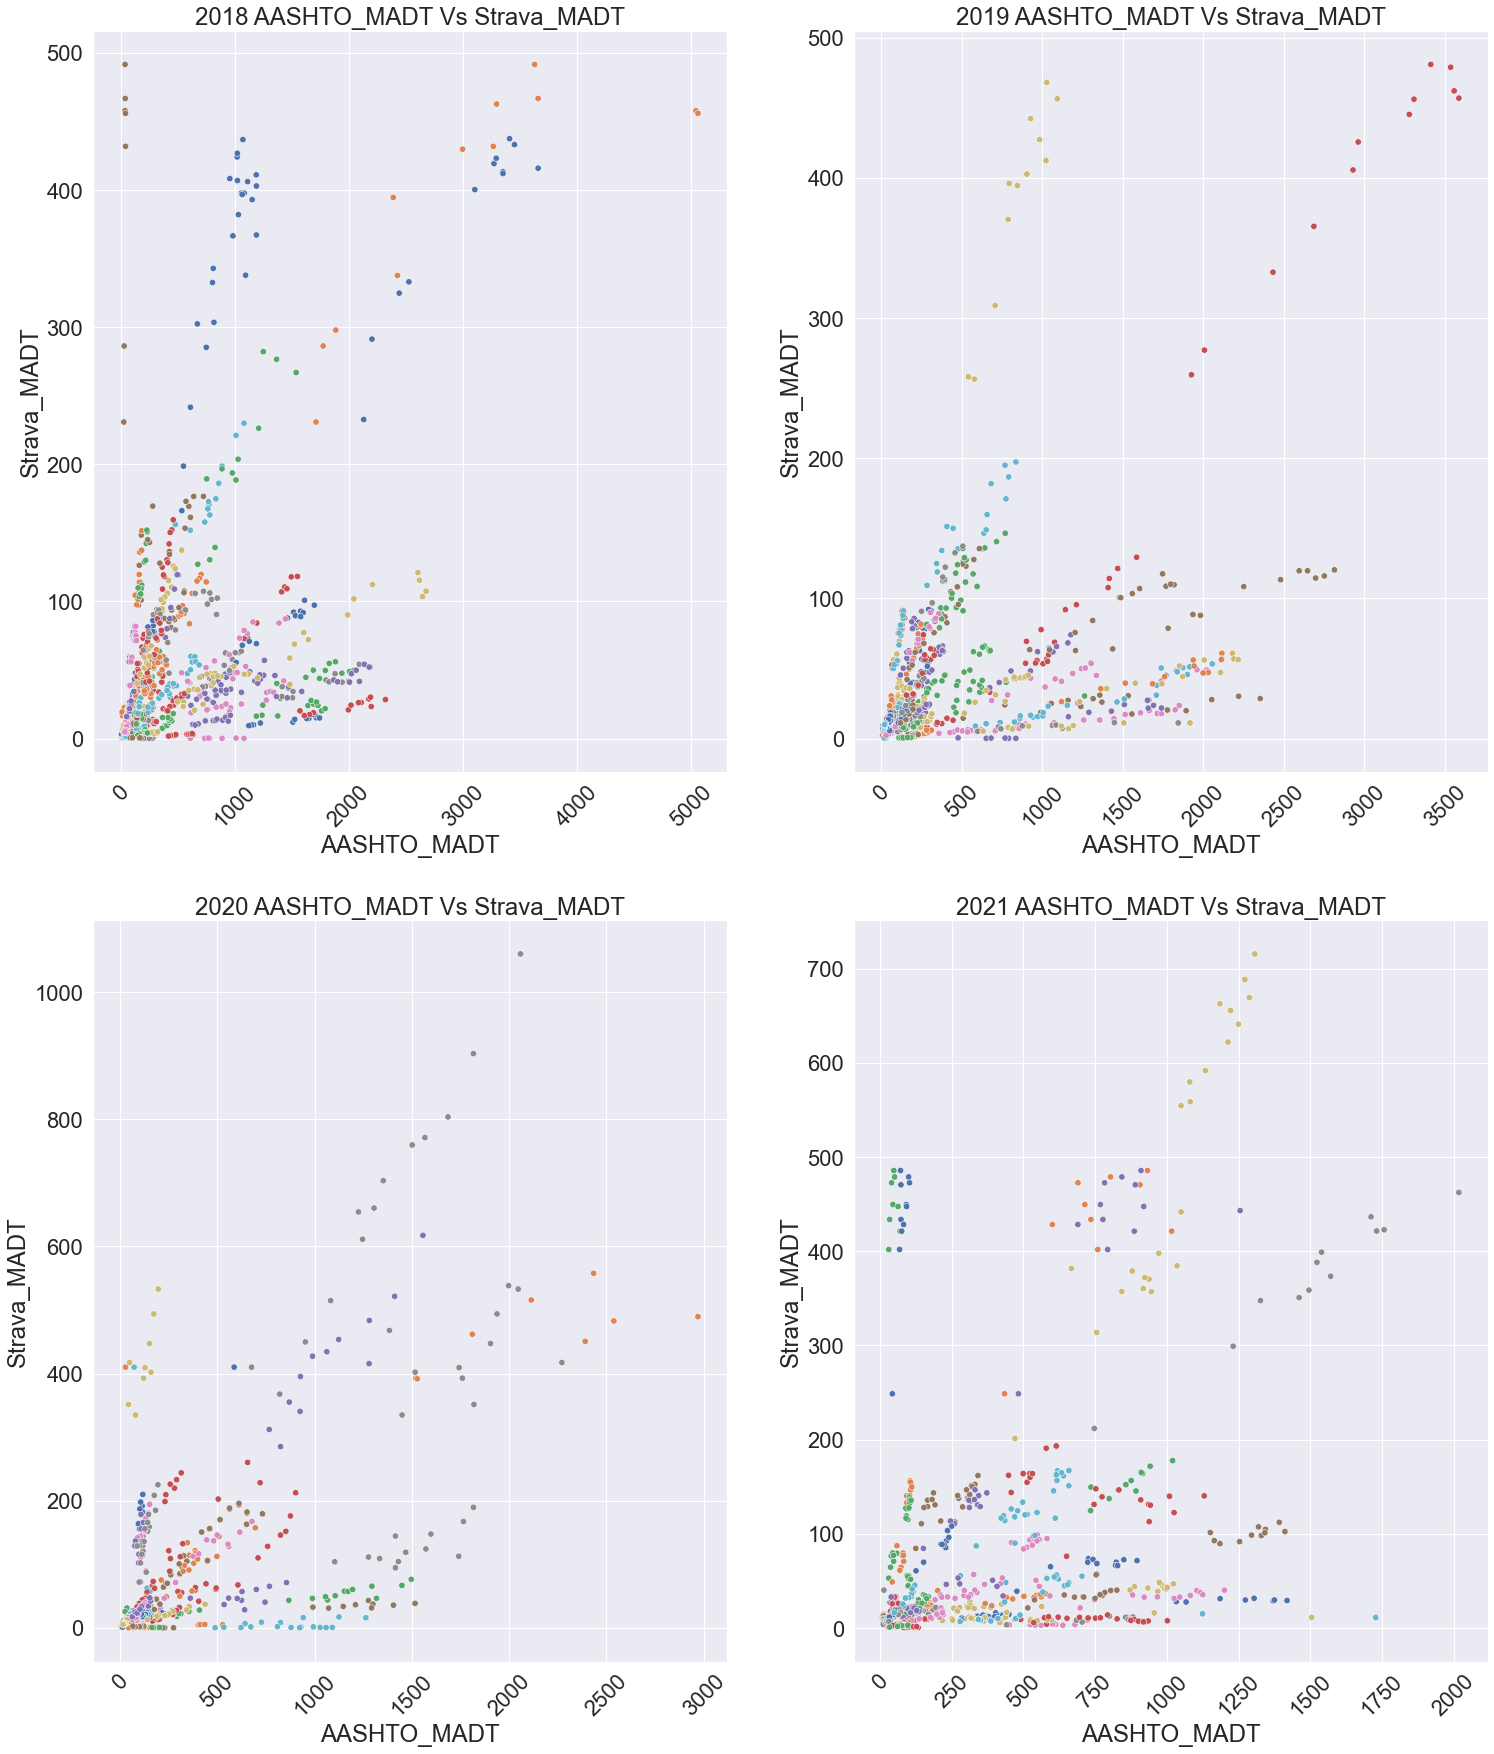

In [44]:
d2m=data1[(data1.seasonal_factor>1)& (data1.seasonal_factor<=2.0) ]
path_cor(d2m)

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_2892\2691221900.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax4 = sns.scatterplot(x=d21['AASHTO_MADT'],y=d21['Strava_MADT'],hue=d21['ID'],palette="deep",


AttributeError: 'NoneType' object has no attribute 'remove'

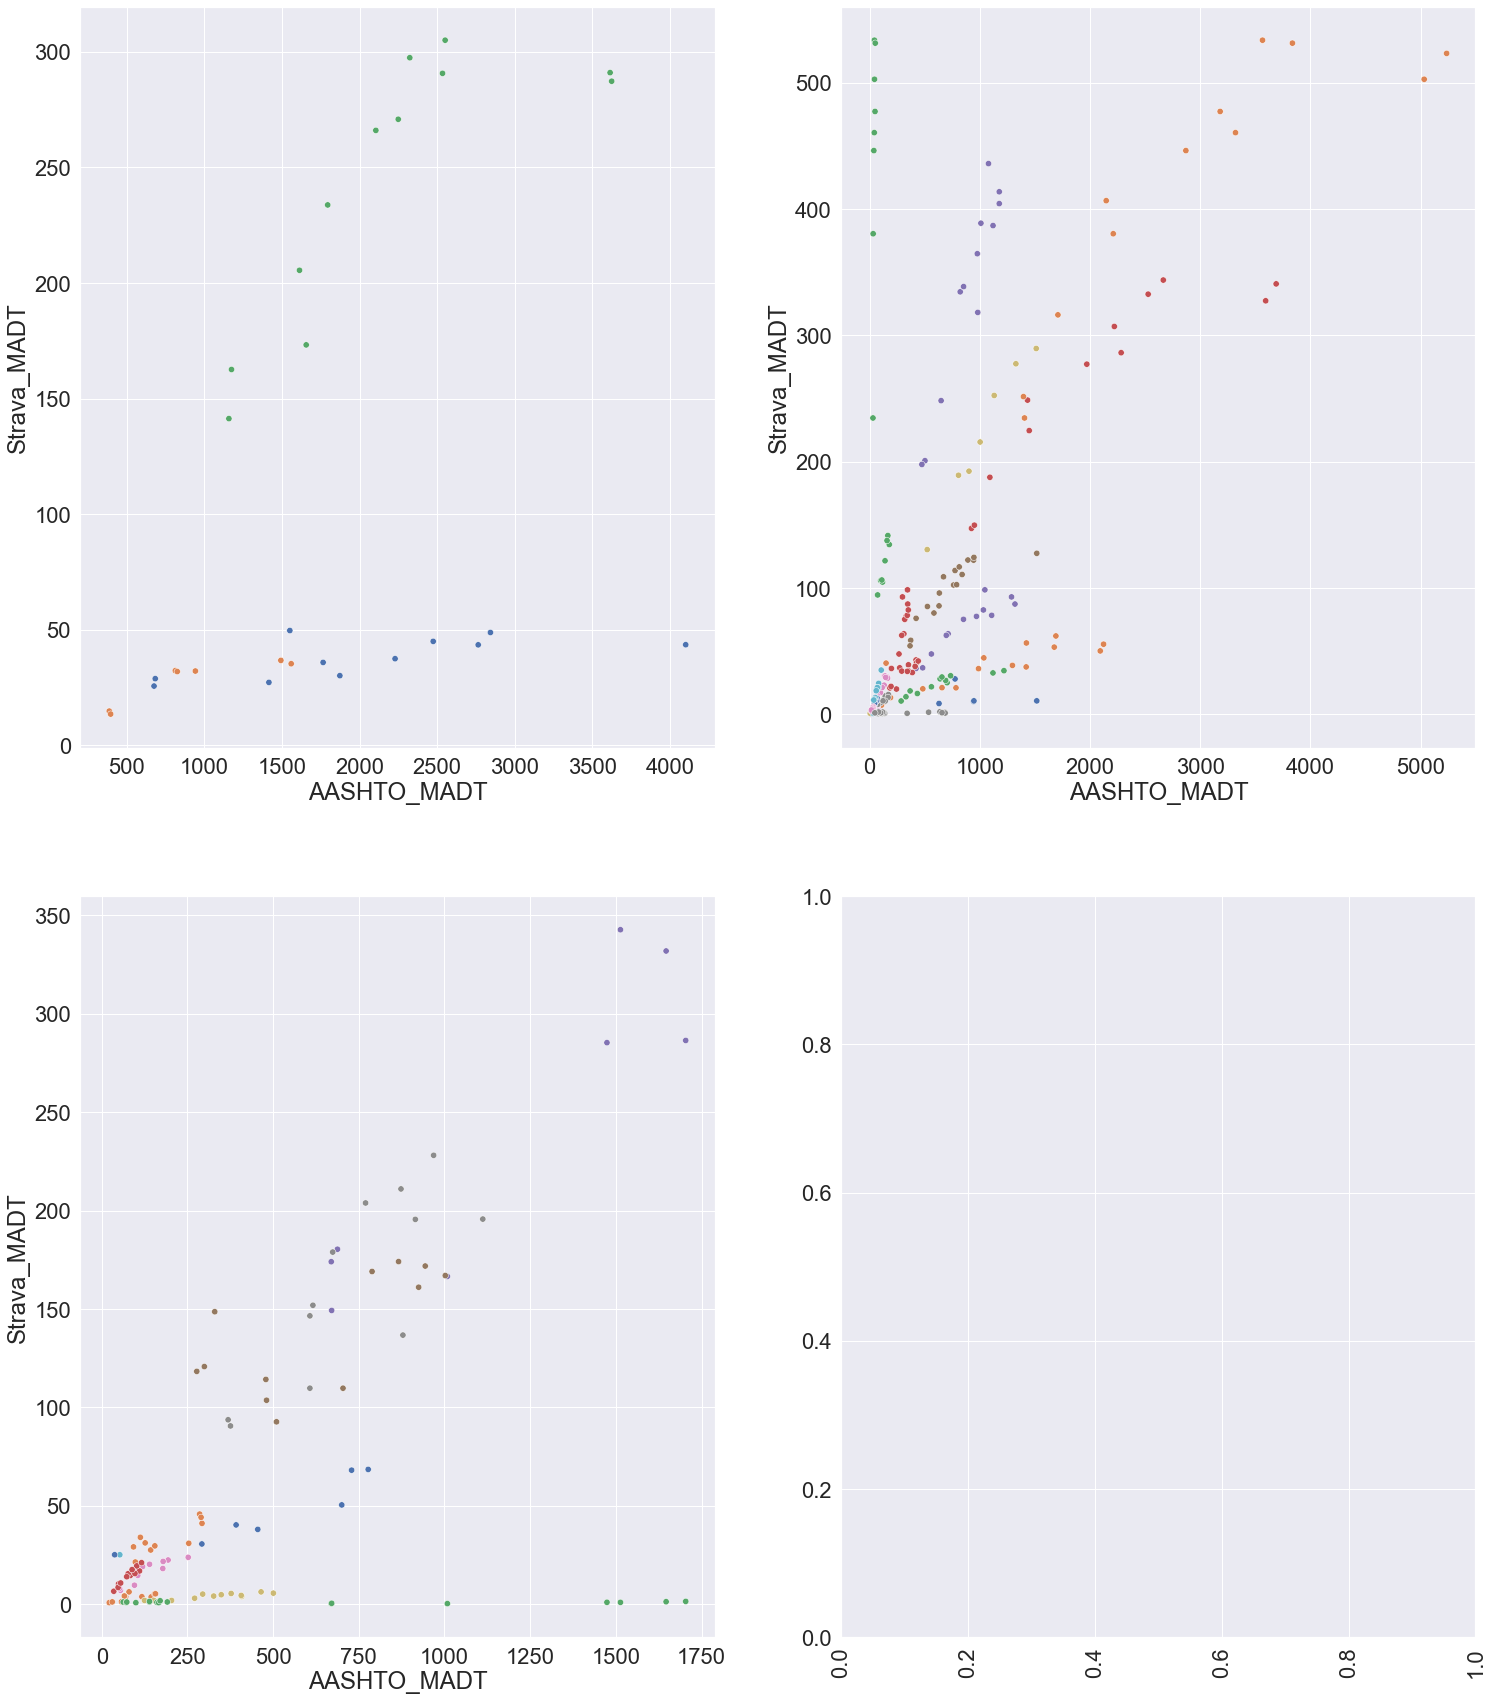

In [45]:
d2m=data1[(data1.seasonal_factor>2.0)& (data1.seasonal_factor<=5) ]
path_cor(d2m)

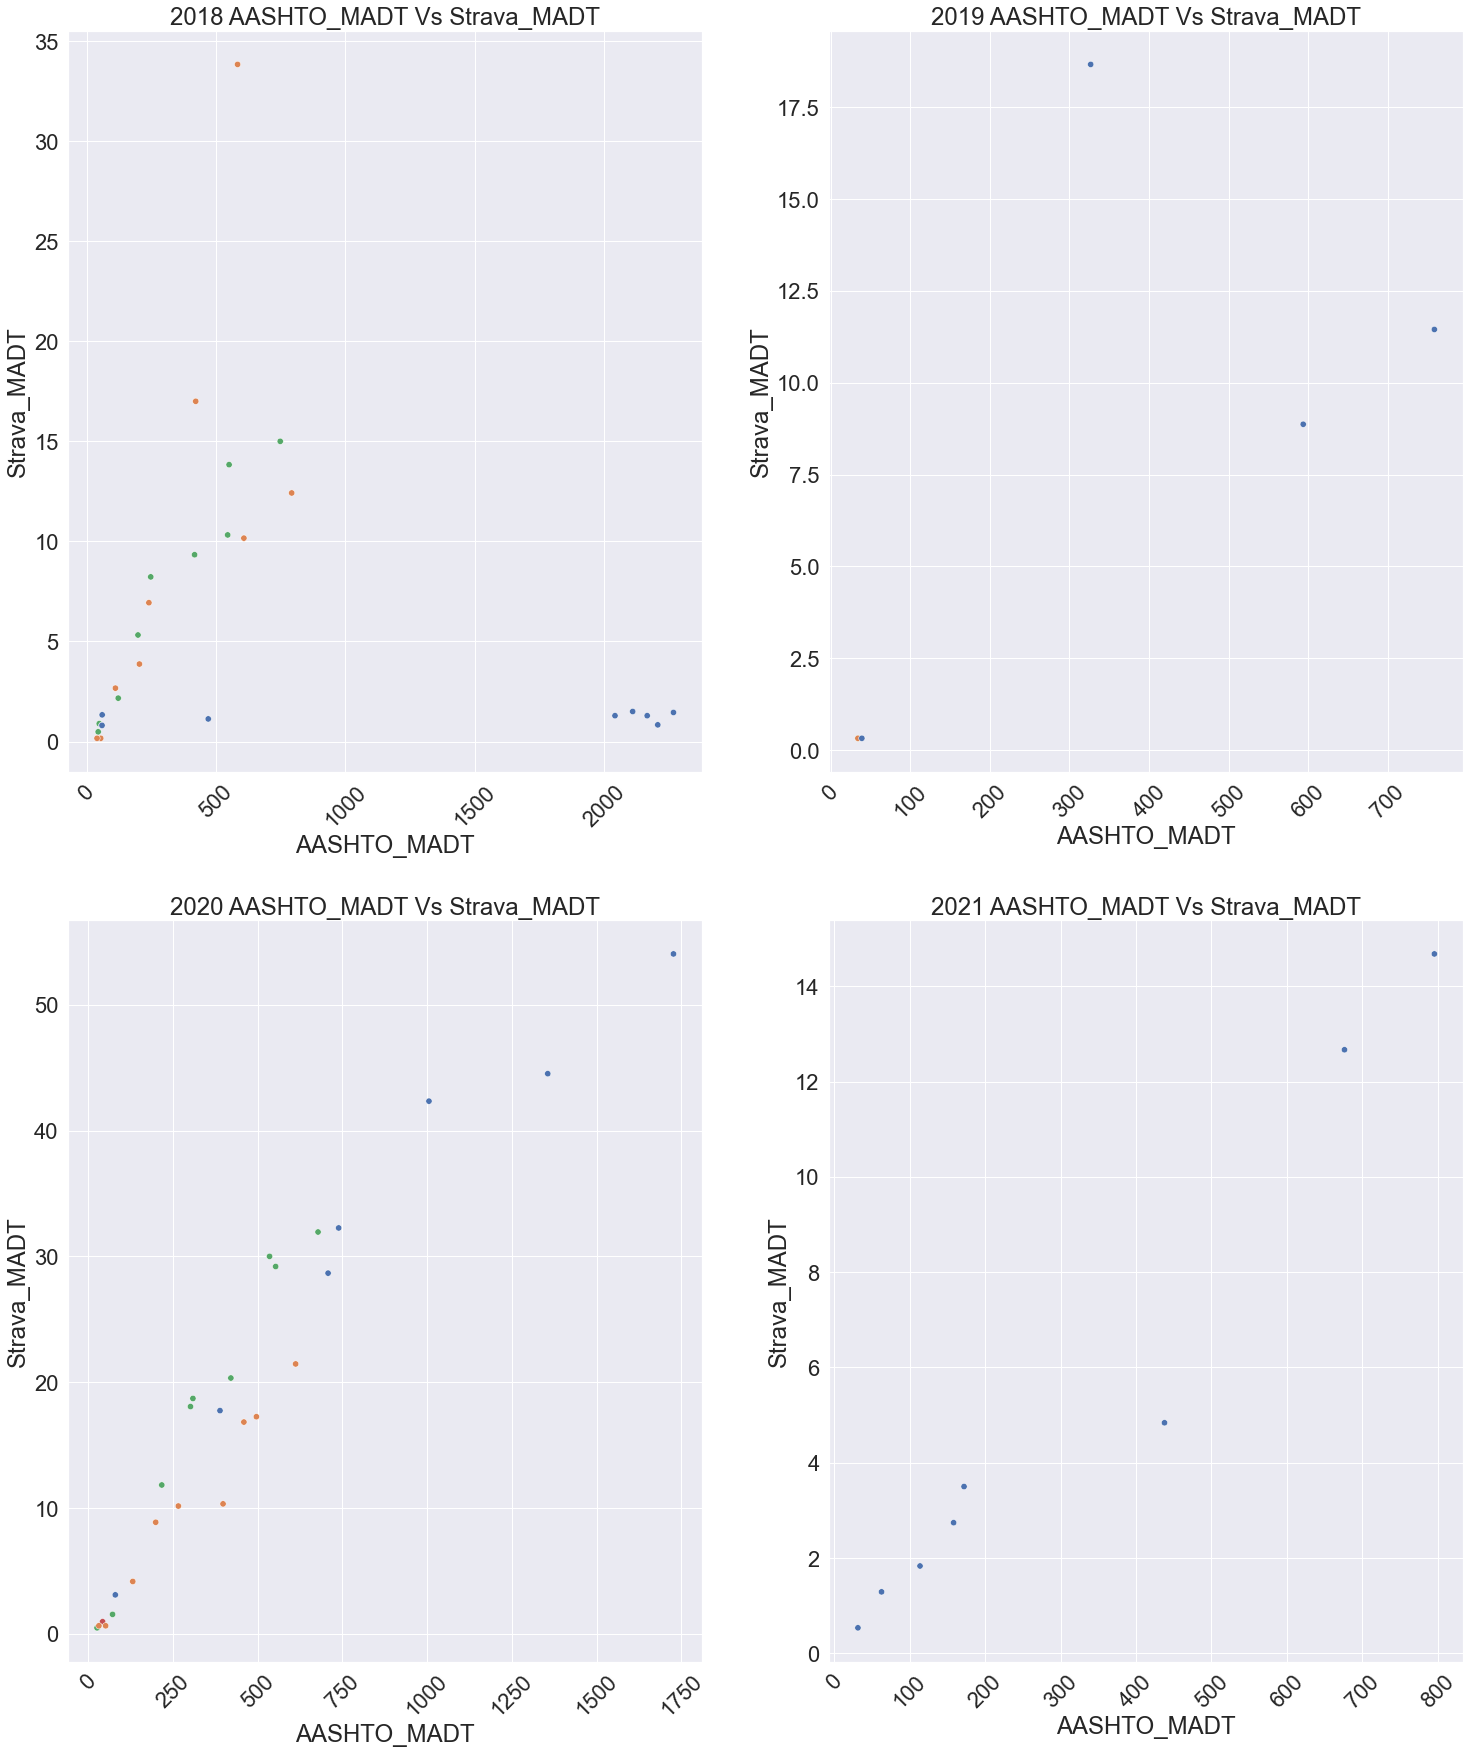

In [46]:
d3m=data1.loc[data1['seasonal_factor']>5.0]
path_cor(d3m)

# Lets do it for Combining all 4 years together

In [47]:
av_seasonal_data=pd.DataFrame({'seasonal_factor' : seasonal_data.groupby(['id'])['seasonal_factor'].mean()}).reset_index()
av_seasonal_data.shape

(145, 2)

In [48]:
data1.columns

Index(['Unnamed: 0', 'ID', 'location', 'latitude', 'longitude', 'year',
       'month', 'MTT', 'days_in_month', 'Simple_MADT', 'AASHTO_MADT', 'diff',
       'type', 'geometry', 'road', 'city', 'county', 'state', 'country', 'id',
       'serial_num', 'user_type', 'domain', 'site_name', 'lat', 'long',
       'osmid', 'name', 'OSM Functional Class', 'City Bicycle Facilities',
       'geometry.1', 'GEOID', 'Location_County', 'Region', 'edgeUID_', 'osmId',
       'dist', 'edge_uid', 'osm_refere', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'Strava_MADT',
       'seasonal_factor'],
      dtype='object')

In [49]:
data2=data1[['id','Simple_MADT', 'AASHTO_MADT','Strava_MADT']]
data2.head()

id  Simple_MADT  AASHTO_MADT  Strava_MADT
0  100003575       247.87       250.71        68.23
1  100003575       299.13       297.64        74.83
2  100003575       273.55       277.49        81.61
3  100003575       293.20       292.09        77.83
4  100003575       284.87       285.12        82.26

In [50]:
av_stv=pd.DataFrame({'stv_total' : data.groupby(['id','month'])['Strava_MADT'].mean()}).reset_index()
av_AASHTO_MADT=pd.DataFrame({'AASHTO_MADT' : data.groupby(['id','month'])['AASHTO_MADT'].mean()}).reset_index()
av_Simple_MADT=pd.DataFrame({'Simple_MADT' : data.groupby(['id','month'])['Simple_MADT'].mean()}).reset_index()
av_data=pd.merge(av_stv,av_AASHTO_MADT,on=['id','month'], how='inner')
av_data1=pd.merge(av_data,av_Simple_MADT,on=['id','month'], how='inner')
av_data1.head()

id  month  stv_total  AASHTO_MADT  Simple_MADT
0  100000671      1      11.69        52.92        51.58
1  100000671      2      14.40        47.98        48.22
2  100000671      3      15.48        52.44        52.43
3  100000671      4      20.46        68.64        68.29
4  100000671      5      21.61        78.02        78.20

In [51]:
av_data1.shape

(1793, 5)

In [52]:
av_data2=pd.merge(av_data1,av_seasonal_data,on=['id'], how='inner')
av_data2.head()

id  month  stv_total  AASHTO_MADT  Simple_MADT  seasonal_factor
0  100000671      1      11.69        52.92        51.58             1.35
1  100000671      2      14.40        47.98        48.22             1.35
2  100000671      3      15.48        52.44        52.43             1.35
3  100000671      4      20.46        68.64        68.29             1.35
4  100000671      5      21.61        78.02        78.20             1.35

In [53]:
def MADT_plot_ave (MOY_ind):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(20,15)})
    sns.set(font_scale=2.0)
    ax=sns.scatterplot(x=MOY_ind['AASHTO_MADT'],y=MOY_ind['stv_total'], hue=MOY_ind['id'],palette="deep",markers=True,marker="o",s=80)
    ax.get_legend().remove()
    plt.xticks(rotation = 'vertical')
    ax.title.set_text('2019-2021 Average AASHTO_MADT')
    ax.set_ylabel('Average Strava MADT')
    ax.set_xlabel('Average AASHTO_MADT')
    plt.show()

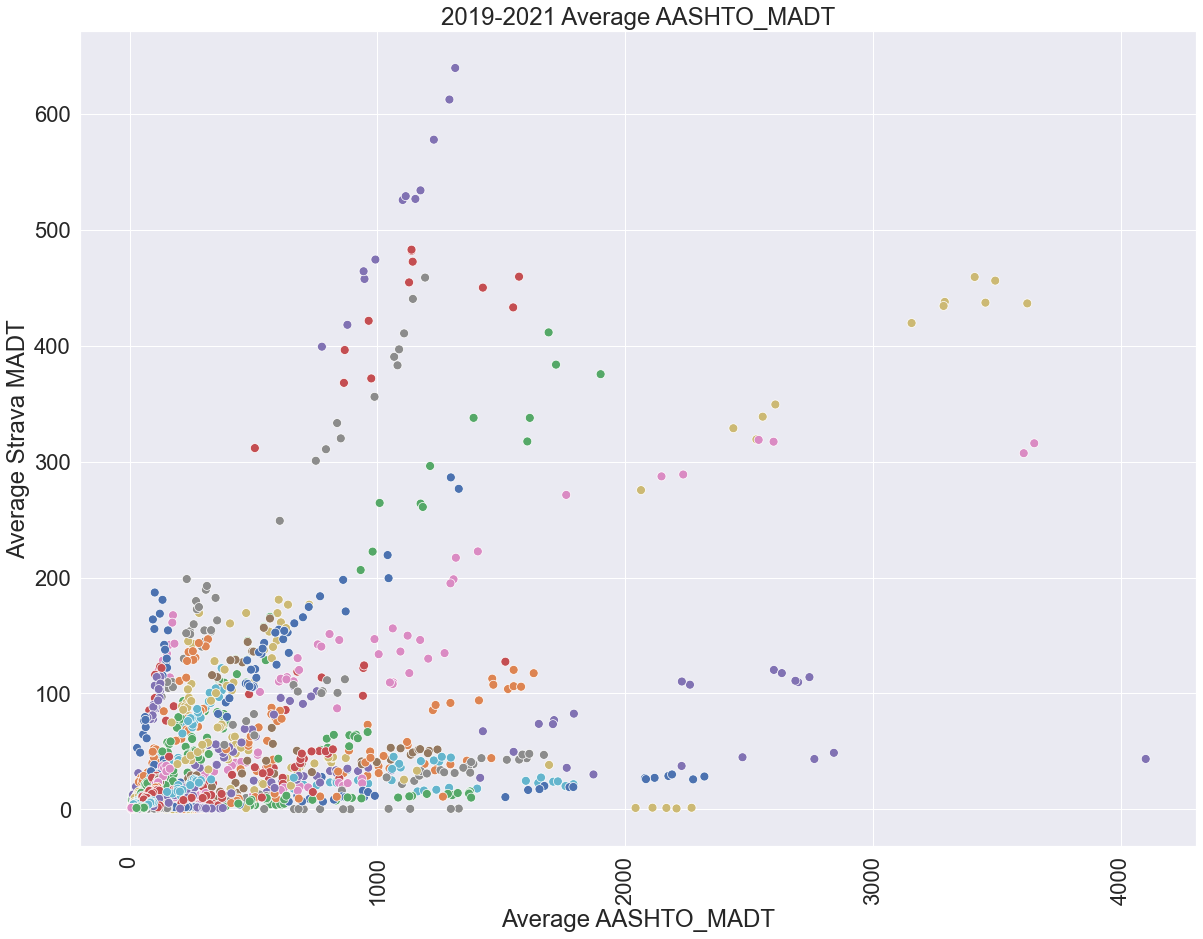

In [54]:
MADT_plot_ave(av_data2)

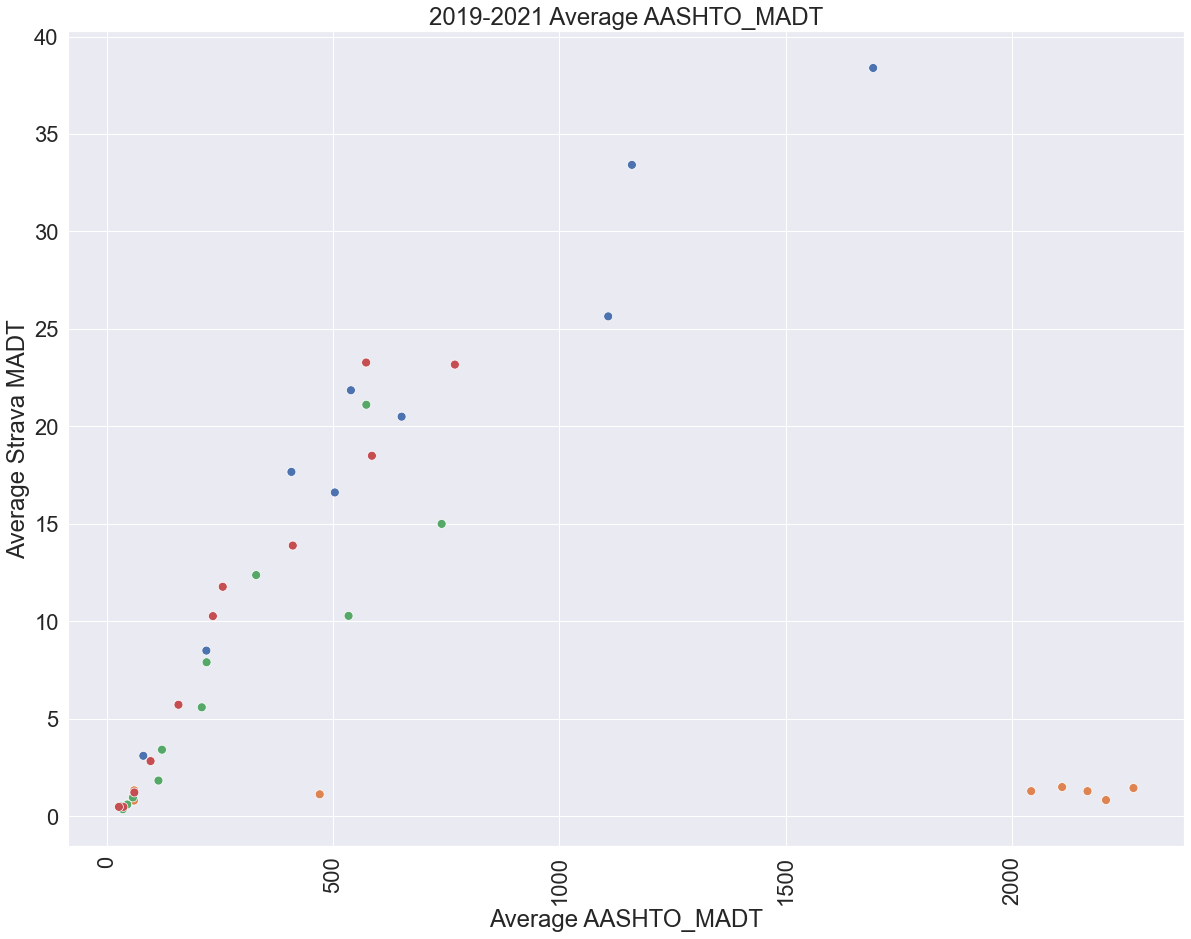

In [55]:
d3am=av_data2.loc[av_data2['seasonal_factor']>3.0]
MADT_plot_ave(d3am)

In [61]:
d1am['id'].nunique()

90

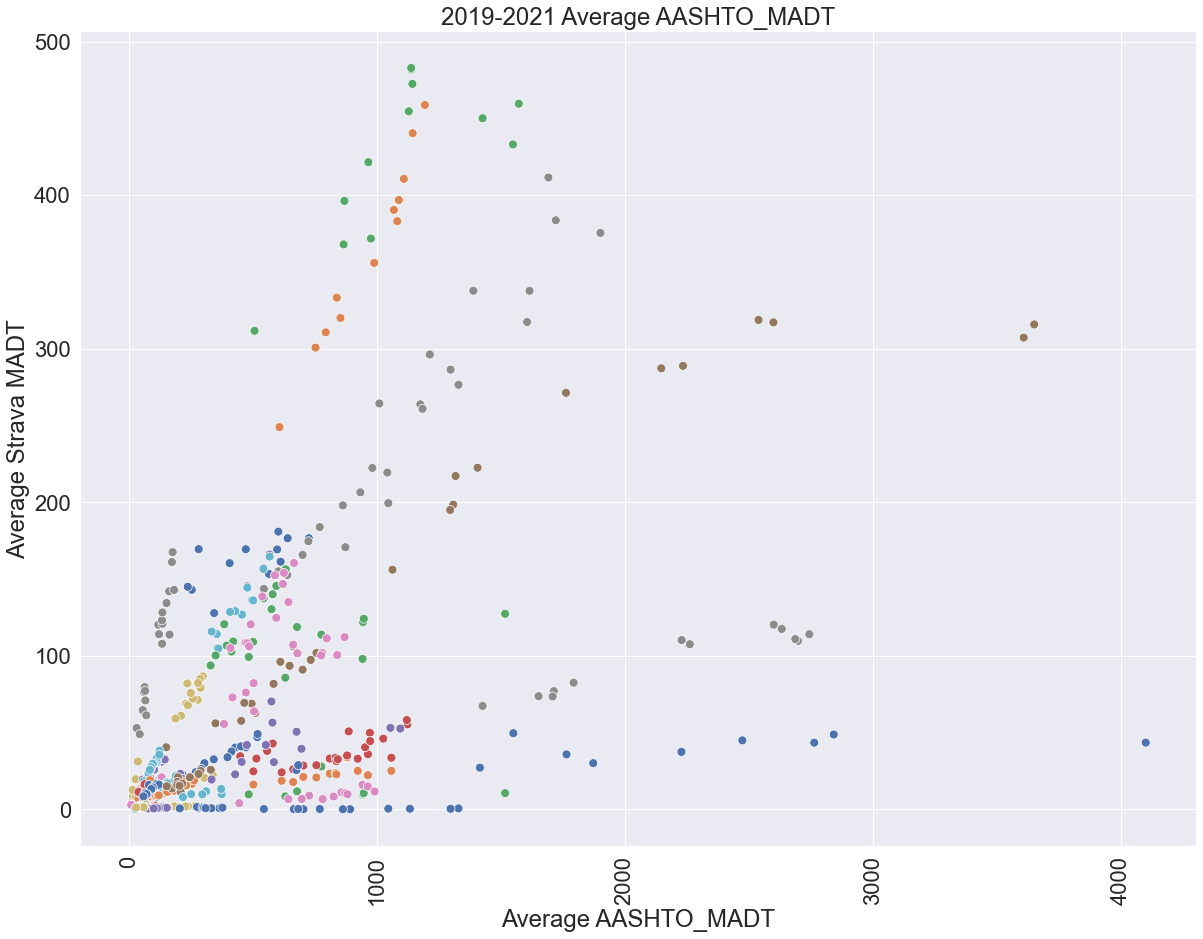

In [58]:
d2am=av_data2[(av_data2.seasonal_factor>1.5)& (av_data2.seasonal_factor<=3) ]
MADT_plot_ave(d2am)

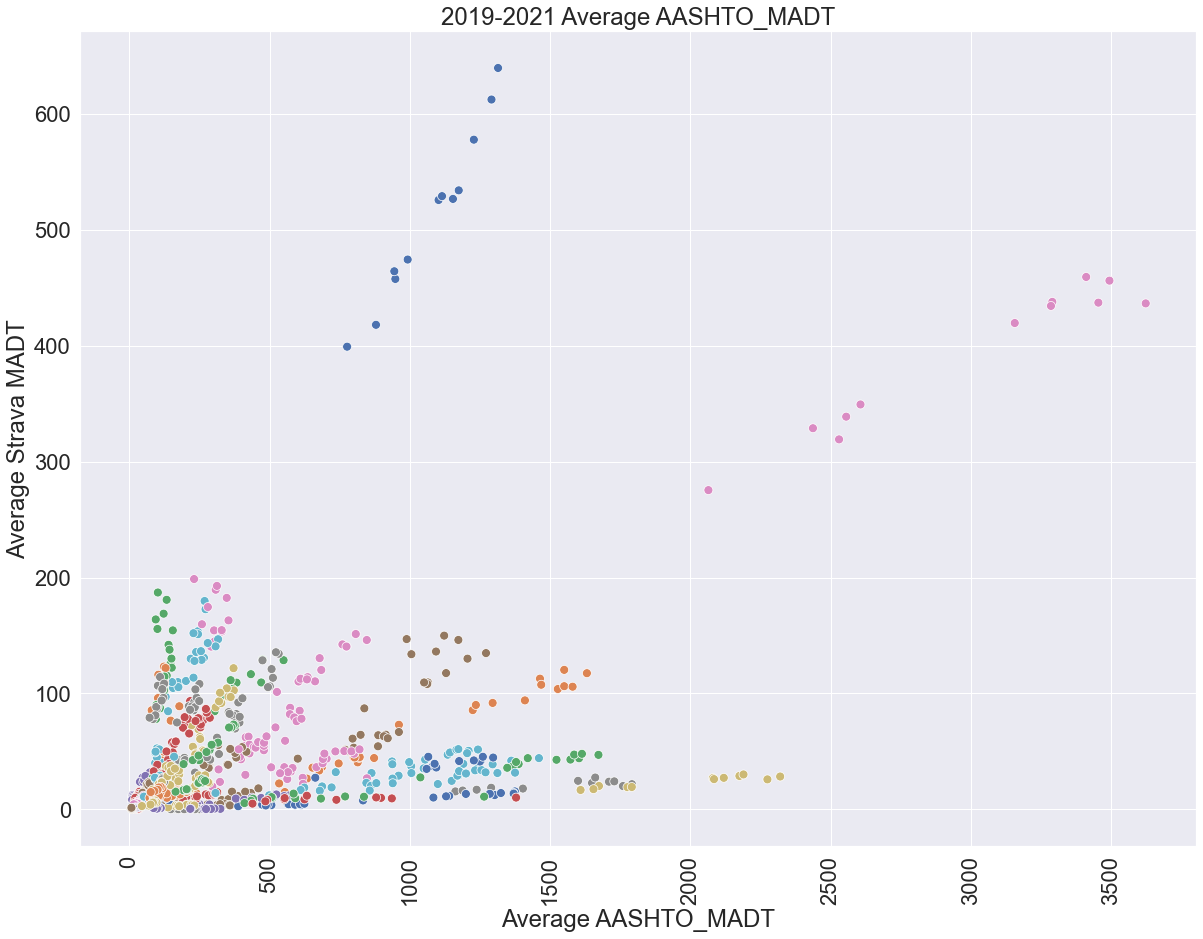

In [60]:
d1am=av_data2.loc[av_data2['seasonal_factor']<=1.5]
MADT_plot_ave(d1am)

In [116]:
# Check the pattern by Plant Zone
pzone=gpd.read_file('C:/UC Berkeley Project Backup/AT Census/Plant Zone/plant_zone.shp')
pzone.head()

STATEFP STUSPS        NAME  TEMP ZONE  Shape_Leng  Shape_Area  \
0      06     CA  California 15.00   8b        0.05        0.00   
1      06     CA  California 15.00   8b        0.07        0.00   
2      06     CA  California 20.00   9a        0.03        0.00   
3      06     CA  California 10.00   8a        0.03        0.00   
4      06     CA  California 10.00   8a        0.02        0.00   

                                            geometry  
0  POLYGON Z ((-124.12270 41.99700 0.00000, -124....  
1  POLYGON Z ((-124.13400 41.96840 0.00000, -124....  
2  POLYGON Z ((-123.94210 41.99420 0.00000, -123....  
3  POLYGON Z ((-123.96010 41.98170 0.00000, -123....  
4  POLYGON Z ((-123.95160 41.97510 0.00000, -123....

In [119]:
pzone.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

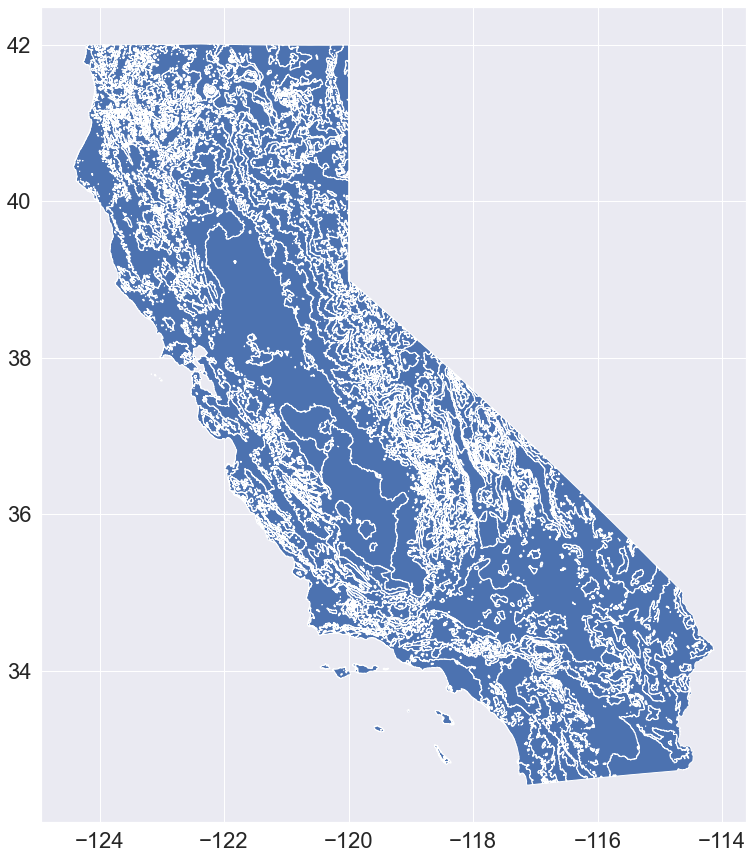

In [117]:
pzone.plot()

In [126]:
data3=data.drop(['geometry','geometry.1'], axis=1)
data3.head()

Unnamed: 0    ID location  latitude  longitude  year  month   MTT  \
0           0  3575    urban     32.66    -117.07  2018      3  7684   
1           1  3575    urban     32.66    -117.07  2018      4  8974   
2           2  3575    urban     32.66    -117.07  2018      5  8480   
3           3  3575    urban     32.66    -117.07  2018      6  8796   
4           4  3575    urban     32.66    -117.07  2018      7  8831   

   days_in_month  Simple_MADT  ...      osmId  dist   edge_uid osm_refere  \
0             31       247.87  ...  234828855   d11  305836426  234828855   
1             30       299.13  ...  234828855   d11  305836426  234828855   
2             31       273.55  ...  234828855   d11  305836426  234828855   
3             30       293.20  ...  234828855   d11  305836426  234828855   
4             31       284.87  ...  234828855   d11  305836426  234828855   

  stv_total stv_com_total stv_rec_total stv_com_ratio  stv_rec_ratio  \
0      2115           120          1995          0.06           0.94   
1      2245           155          2090          0.07           0.93   
2      2530           175          2355          0.07           0.93   
3      2335           145          2190          0.06           0.94   
4      2550           135          2415          0.05           0.95   

  Strava_MADT  
0       68.23  
1       74.83  
2       81.61  
3       77.83  
4       82.26  

[5 rows x 43 columns]

In [127]:
geometry = [Point(xy) for xy in zip(data3.latitude, data3.longitude)]
#df = df.drop(['Lon', 'Lat'], axis=1)
gdf = gpd.GeoDataFrame(data3, crs="EPSG:4326", geometry=geometry)
gdf.head()

Unnamed: 0    ID location  latitude  longitude  year  month   MTT  \
0           0  3575    urban     32.66    -117.07  2018      3  7684   
1           1  3575    urban     32.66    -117.07  2018      4  8974   
2           2  3575    urban     32.66    -117.07  2018      5  8480   
3           3  3575    urban     32.66    -117.07  2018      6  8796   
4           4  3575    urban     32.66    -117.07  2018      7  8831   

   days_in_month  Simple_MADT  ...  dist   edge_uid osm_refere stv_total  \
0             31       247.87  ...   d11  305836426  234828855      2115   
1             30       299.13  ...   d11  305836426  234828855      2245   
2             31       273.55  ...   d11  305836426  234828855      2530   
3             30       293.20  ...   d11  305836426  234828855      2335   
4             31       284.87  ...   d11  305836426  234828855      2550   

  stv_com_total stv_rec_total stv_com_ratio stv_rec_ratio  Strava_MADT  \
0           120          1995          0.06          0.94        68.23   
1           155          2090          0.07          0.93        74.83   
2           175          2355          0.07          0.93        81.61   
3           145          2190          0.06          0.94        77.83   
4           135          2415          0.05          0.95        82.26   

                      geometry  
0  POINT (32.65733 -117.07063)  
1  POINT (32.65733 -117.07063)  
2  POINT (32.65733 -117.07063)  
3  POINT (32.65733 -117.07063)  
4  POINT (32.65733 -117.07063)  

[5 rows x 44 columns]

In [131]:
gdf['longitude'].describe()

count   4975.00
mean    -120.94
std        2.25
min     -124.09
25%     -122.44
50%     -122.39
75%     -117.87
max     -116.93
Name: longitude, dtype: float64

In [128]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [144]:
# read plant zone after GIS spatial join
pzone1=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Plant Zone/plant_zone.csv')
pzone1['Strava_MADT']=pzone1['stv_total']/pzone1['days_in_month']
pzone1.head()

OBJECTID  Field1    ID location  latitude  longitude  year  month   MTT  \
0         1       0  3575    urban     32.66    -117.07  2018      3  7684   
1         2       1  3575    urban     32.66    -117.07  2018      4  8974   
2         3       2  3575    urban     32.66    -117.07  2018      5  8480   
3         4       3  3575    urban     32.66    -117.07  2018      6  8796   
4         5       4  3575    urban     32.66    -117.07  2018      7  8831   

   days_in_month  ...  Join_Count  TARGET_FID  JOIN_FID STATEFP STUSPS  \
0             31  ...           1           1      3703       6     CA   
1             30  ...           1           2      3703       6     CA   
2             31  ...           1           3      3703       6     CA   
3             30  ...           1           4      3703       6     CA   
4             31  ...           1           5      3703       6     CA   

                 NAME TEMP ZONE Shape_Leng Strava_MADT  
0  Sweetwater Bikeway   30  10a      30.60       68.23  
1  Sweetwater Bikeway   30  10a      30.60       74.83  
2  Sweetwater Bikeway   30  10a      30.60       81.61  
3  Sweetwater Bikeway   30  10a      30.60       77.83  
4  Sweetwater Bikeway   30  10a      30.60       82.26  

[5 rows x 56 columns]

In [140]:
pzone1.columns

Index(['OBJECTID', 'Field1', 'ID', 'location', 'latitude', 'longitude', 'year',
       'month', 'MTT', 'days_in_month', 'Simple_MADT', 'AASHTO_MADT', 'diff',
       'type', 'geometry', 'road', 'city', 'county', 'state', 'country', 'id',
       'serial_num', 'user_type', 'domain', 'site_name', 'lat', 'long',
       'osmid', 'name', 'OSM Functional Class', 'City Bicycle Facilities',
       'geometry.1', 'GEOID', 'Location_County', 'Region', 'edgeUID_', 'osmId',
       'dist', 'edge_uid', 'osm_refere', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'OBJECTID.1',
       'Join_Count', 'TARGET_FID', 'JOIN_FID', 'STATEFP', 'STUSPS', 'NAME',
       'TEMP', 'ZONE', 'Shape_Leng'],
      dtype='object')

In [137]:
pzone1['ZONE'].unique()

array(['10a', '10b', '6b', '7a', '9b'], dtype=object)

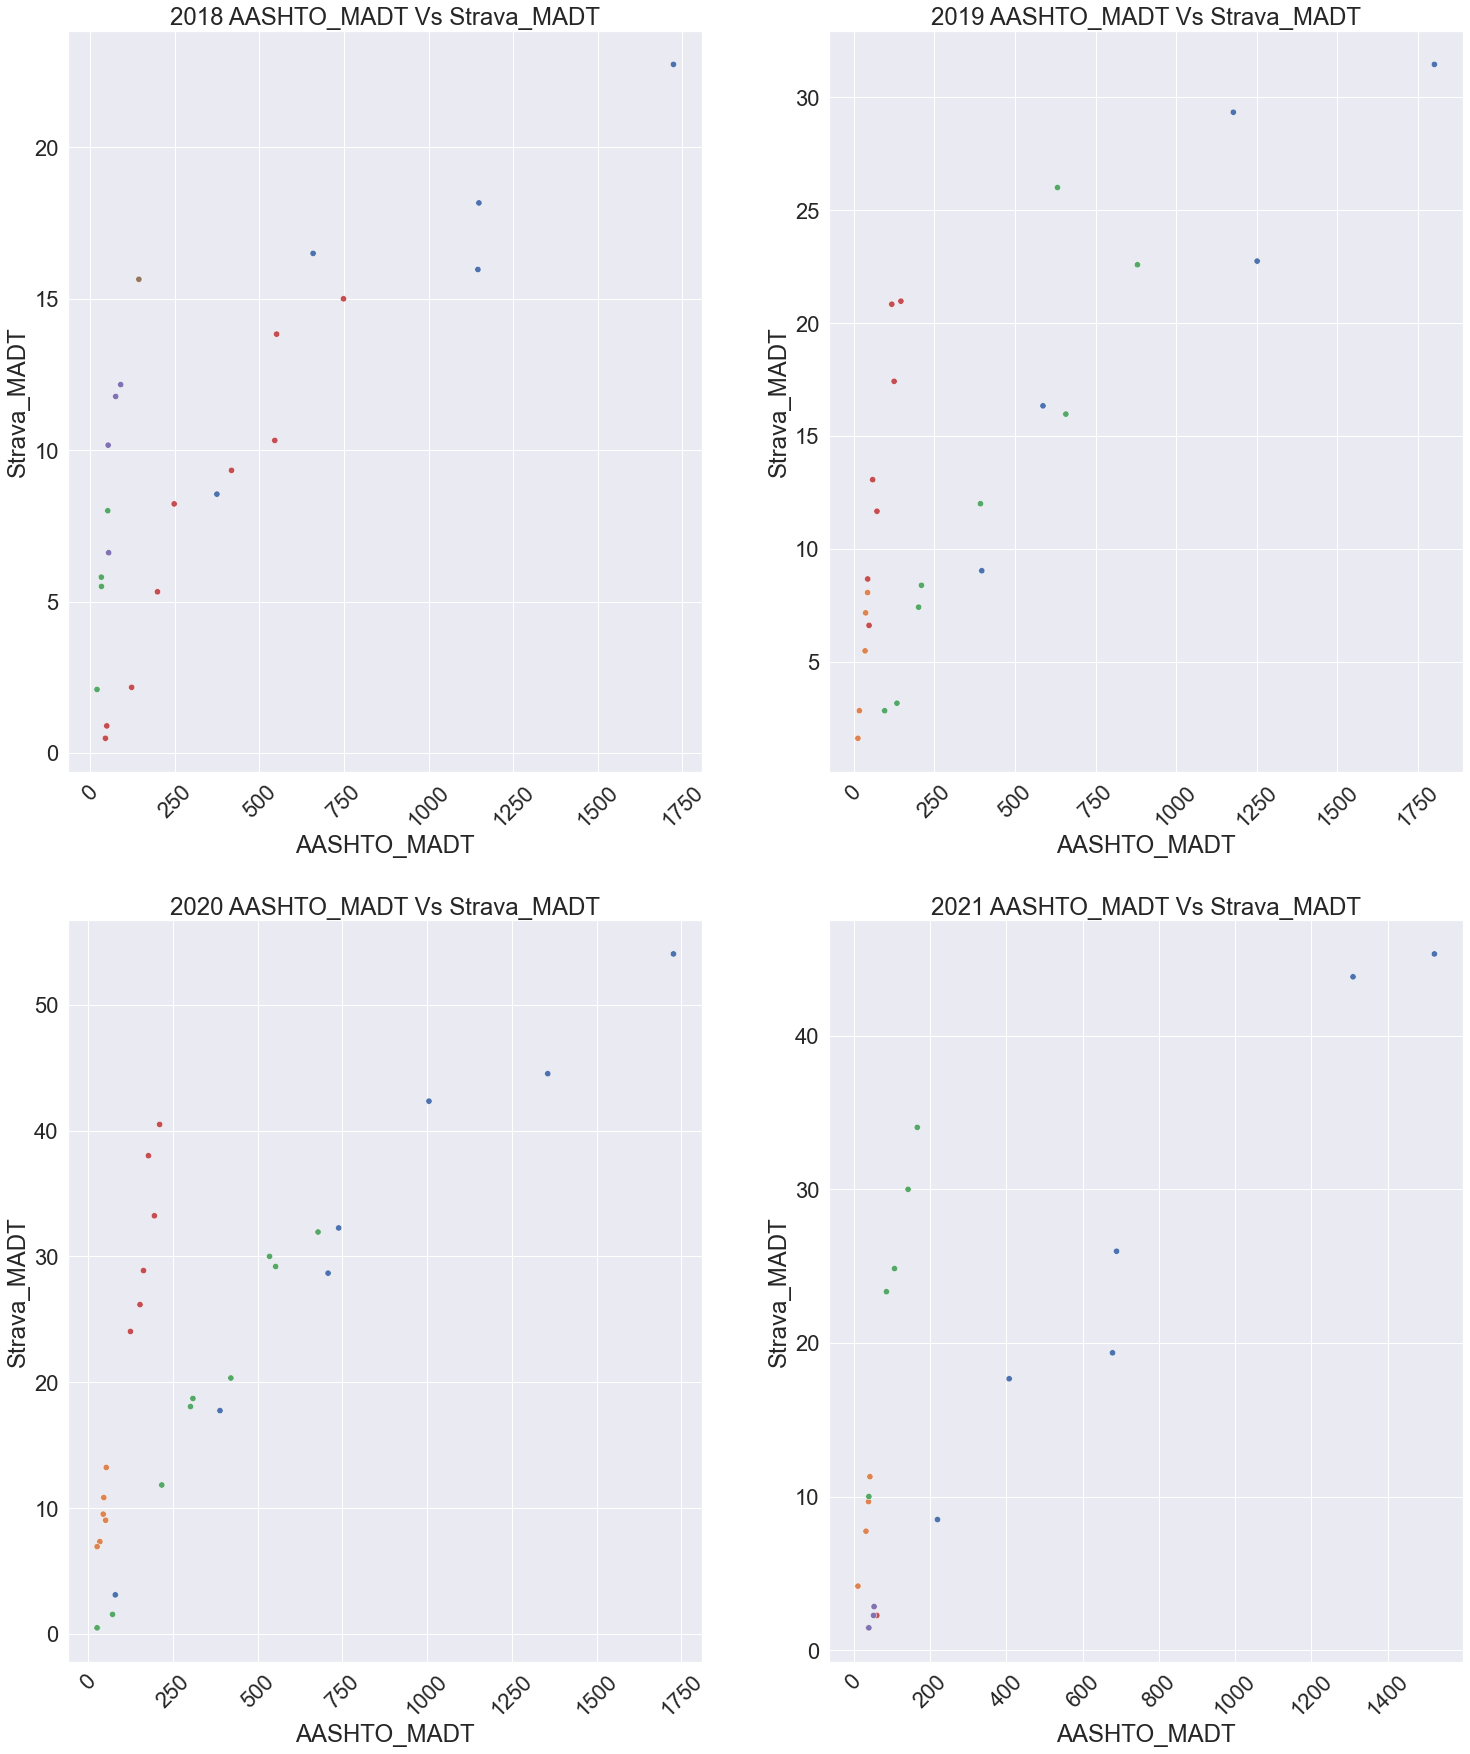

In [149]:
six_b=pzone1.loc[pzone1['ZONE']=='6b']
path_cor(six_b)


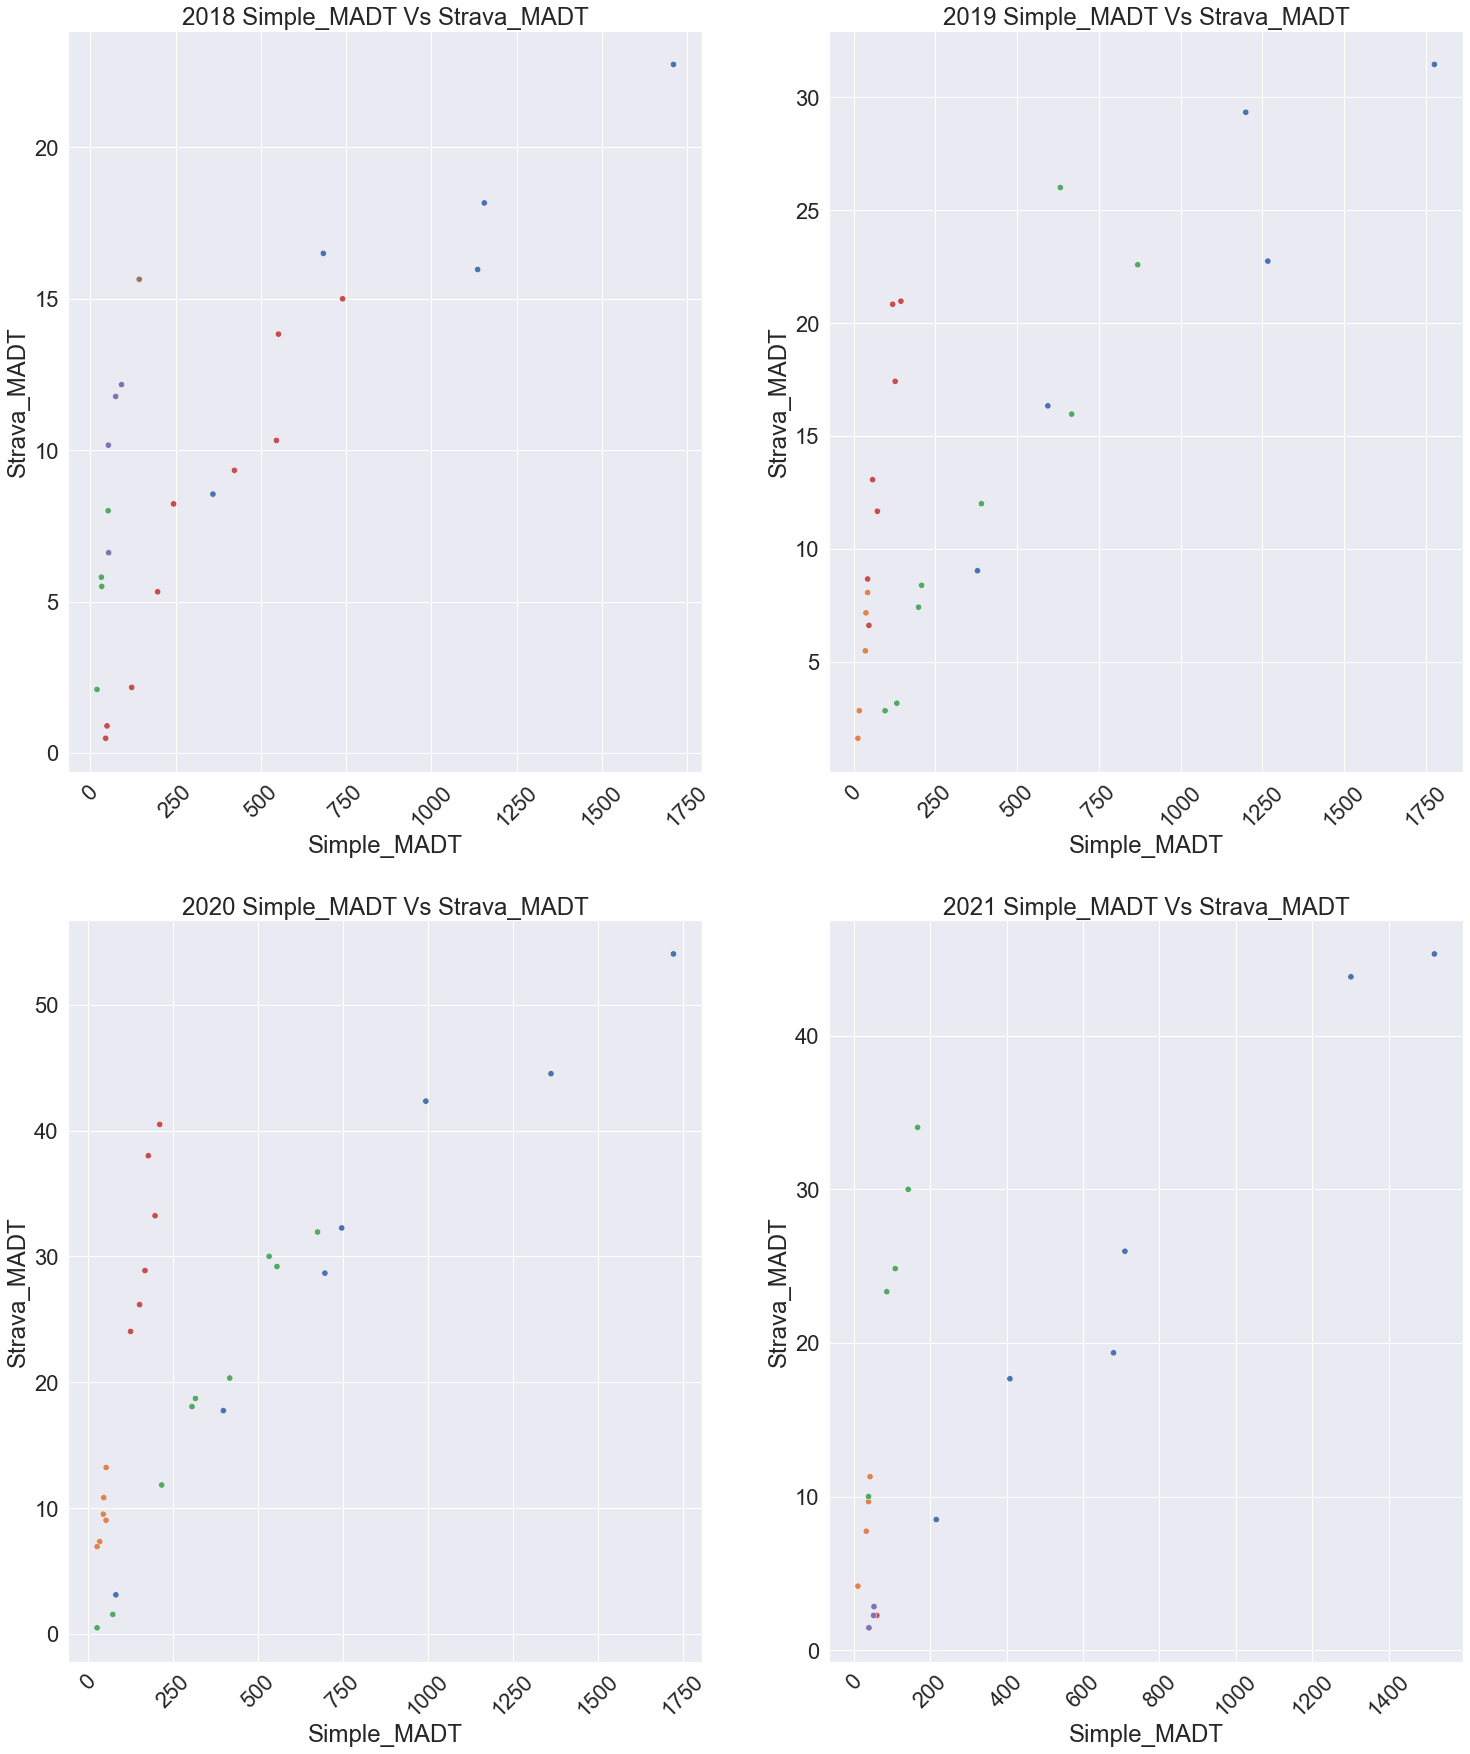

In [148]:
path_cor_simple(six_b)

In [151]:
six_b

OBJECTID  Field1     ID location  latitude  longitude  year  month  \
1352      1353    1352  49628    urban     38.86    -120.01  2018      5   
1353      1354    1353  49628    urban     38.86    -120.01  2018      6   
1354      1355    1354  49628    urban     38.86    -120.01  2018      9   
1355      1356    1355  49628    urban     38.86    -120.01  2018     10   
1356      1357    1356  49628    urban     38.86    -120.01  2019      4   
...        ...     ...    ...      ...       ...        ...   ...    ...   
4880      4944    4943  30664    rural     38.93    -120.03  2021      5   
4881      4945    4944  30664    rural     38.93    -120.03  2021      6   
4882      4946    4945  30664    rural     38.93    -120.03  2021      7   
4883      4947    4946  30664    rural     38.93    -120.03  2021      8   
4884      4948    4947  30664    rural     38.93    -120.03  2021     11   

        MTT  days_in_month  ...  Join_Count  TARGET_FID  JOIN_FID STATEFP  \
1352   1000             31  ...           1        1353      1568       6   
1353   1566             30  ...           1        1354      1568       6   
1354   1003             30  ...           1        1355      1568       6   
1355    605             31  ...           1        1356      1568       6   
1356    527             30  ...           1        1357      1568       6   
...     ...            ...  ...         ...         ...       ...     ...   
4880  22001             31  ...           1        4944      1568       6   
4881  39034             30  ...           1        4945      1568       6   
4882  47106             31  ...           1        4946      1568       6   
4883  21076             31  ...           1        4947      1568       6   
4884   6476             30  ...           1        4948      1568       6   

     STUSPS NAME TEMP ZONE Shape_Leng Strava_MADT  
1352     CA  NaN   -5   6b      13.64        5.81  
1353     CA  NaN   -5   6b      13.64        8.00  
1354     CA  NaN   -5   6b      13.64        5.50  
1355     CA  NaN   -5   6b      13.64        2.10  
1356     CA  NaN   -5   6b      13.64        2.83  
...     ...  ...  ...  ...        ...         ...  
4880     CA  NaN   -5   6b      13.64       25.97  
4881     CA  NaN   -5   6b      13.64       43.83  
4882     CA  NaN   -5   6b      13.64       45.32  
4883     CA  NaN   -5   6b      13.64       19.35  
4884     CA  NaN   -5   6b      13.64        8.50  

[99 rows x 56 columns]

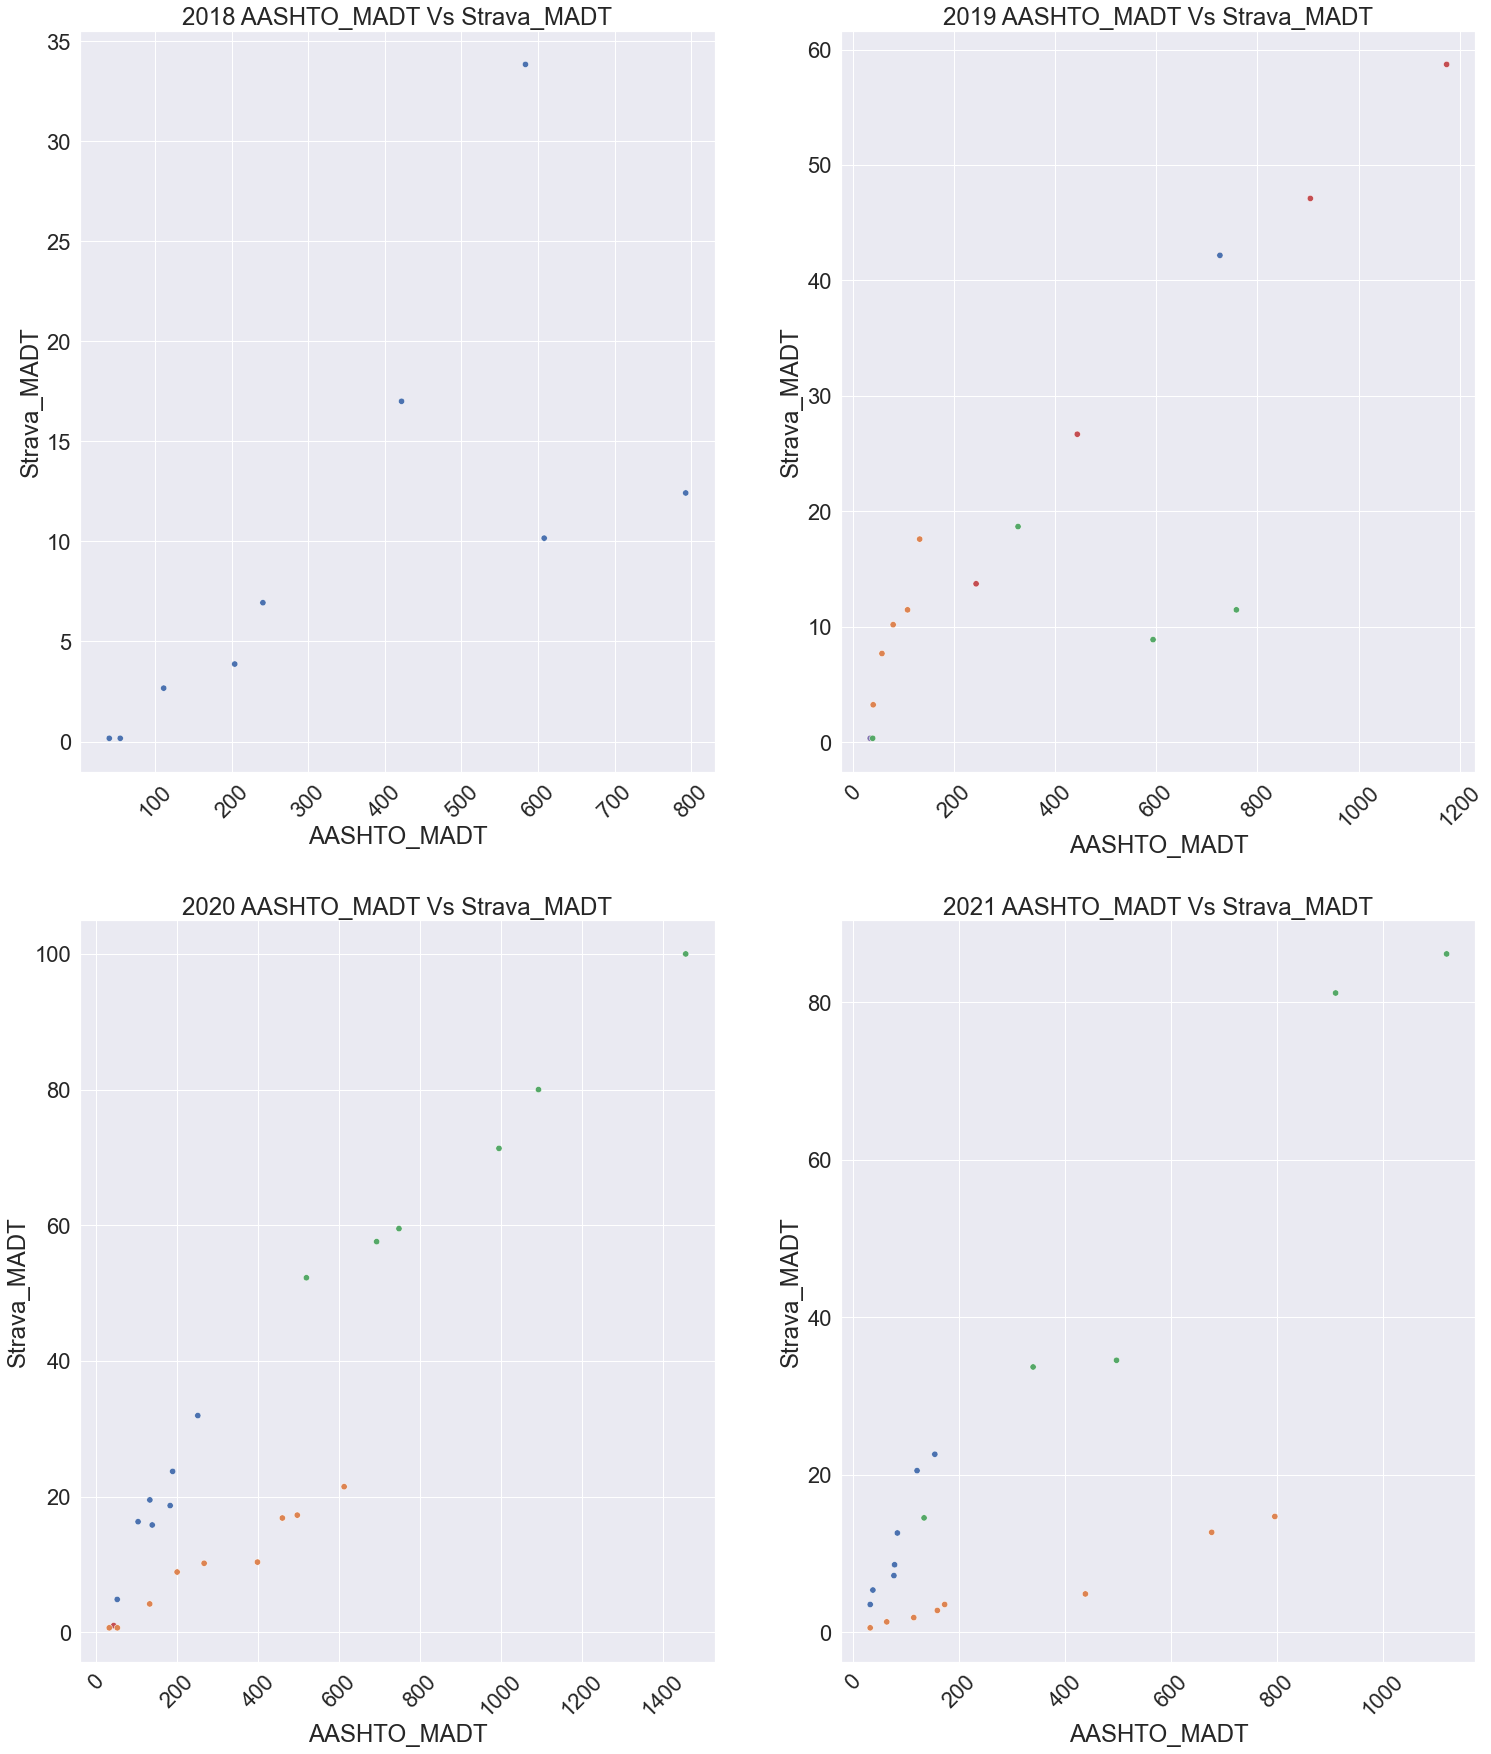

In [152]:
seven_a=pzone1.loc[pzone1['ZONE']=='7a']
path_cor(seven_a)

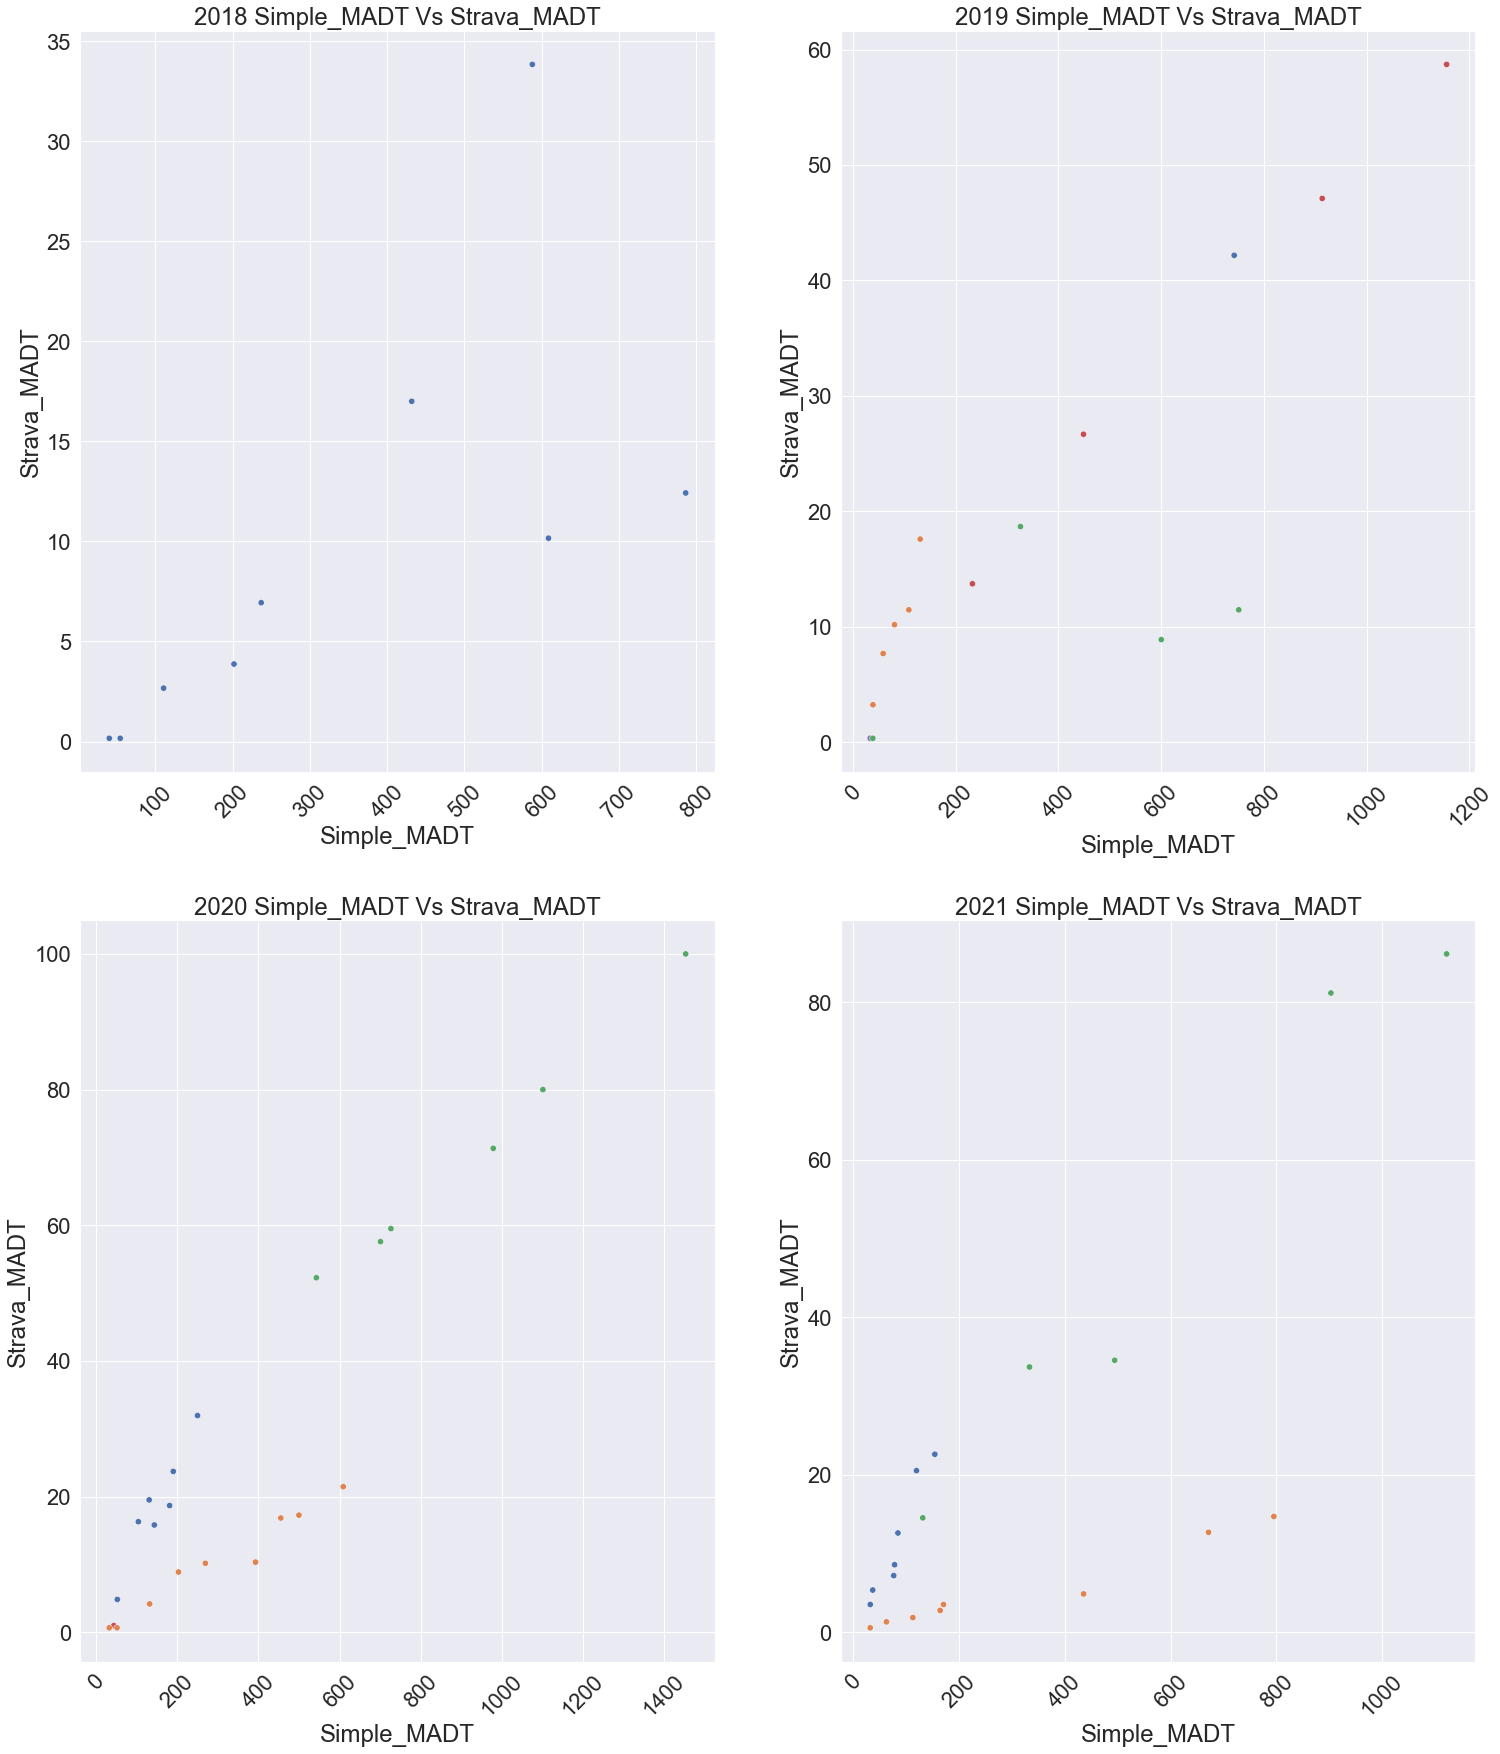

In [153]:
path_cor_simple(seven_a)

In [156]:
seven_a

OBJECTID  Field1     ID location  latitude  longitude  year  month  \
1404      1405    1404  58298    urban     38.95    -119.96  2019     12   
1405      1406    1405  58297    urban     38.95    -119.96  2019     12   
1406      1407    1406  58298    urban     38.95    -119.96  2020      1   
1407      1408    1407  58297    urban     38.95    -119.96  2020      1   
1408      1409    1408  50992    urban     38.95    -119.96  2018      1   
...        ...     ...    ...      ...       ...        ...   ...    ...   
4897      4961    4960  52194    rural     39.16    -120.16  2021      7   
4898      4962    4961  52194    rural     39.16    -120.16  2021      8   
4899      4963    4962  52194    rural     39.16    -120.16  2021      9   
4900      4964    4963  52194    rural     39.16    -120.16  2021     11   
4901      4965    4964  30667    rural     39.16    -120.16  2019      6   

        MTT  days_in_month  ...  Join_Count  TARGET_FID  JOIN_FID STATEFP  \
1404   1043             31  ...           1        1405      3599       6   
1405   1043             31  ...           1        1406      3599       6   
1406   1332             31  ...           1        1407      3599       6   
1407   1332             31  ...           1        1408      3599       6   
1408   1694             31  ...           1        1409      3599       6   
...     ...            ...  ...         ...         ...       ...     ...   
4897  34781             31  ...           1        4961      1506       6   
4898  15316             31  ...           1        4962      1506       6   
4899   9989             30  ...           1        4963      1506       6   
4900   3932             30  ...           1        4964      1506       6   
4901  22266             30  ...           1        4965      1506       6   

     STUSPS                      NAME TEMP ZONE Shape_Leng Strava_MADT  
1404     CA                       NaN    0   7a      80.55        0.32  
1405     CA                       NaN    0   7a      80.55        0.32  
1406     CA                       NaN    0   7a      80.55        0.97  
1407     CA                       NaN    0   7a      80.55        0.97  
1408     CA                       NaN    0   7a      80.55        0.16  
...     ...                       ...  ...  ...        ...         ...  
4897     CA  Truckee River Bike Trail    0   7a       0.56       86.13  
4898     CA  Truckee River Bike Trail    0   7a       0.56       34.52  
4899     CA  Truckee River Bike Trail    0   7a       0.56       33.67  
4900     CA  Truckee River Bike Trail    0   7a       0.56       14.50  
4901     CA  Truckee River Bike Trail    0   7a       0.56       42.17  

[70 rows x 56 columns]

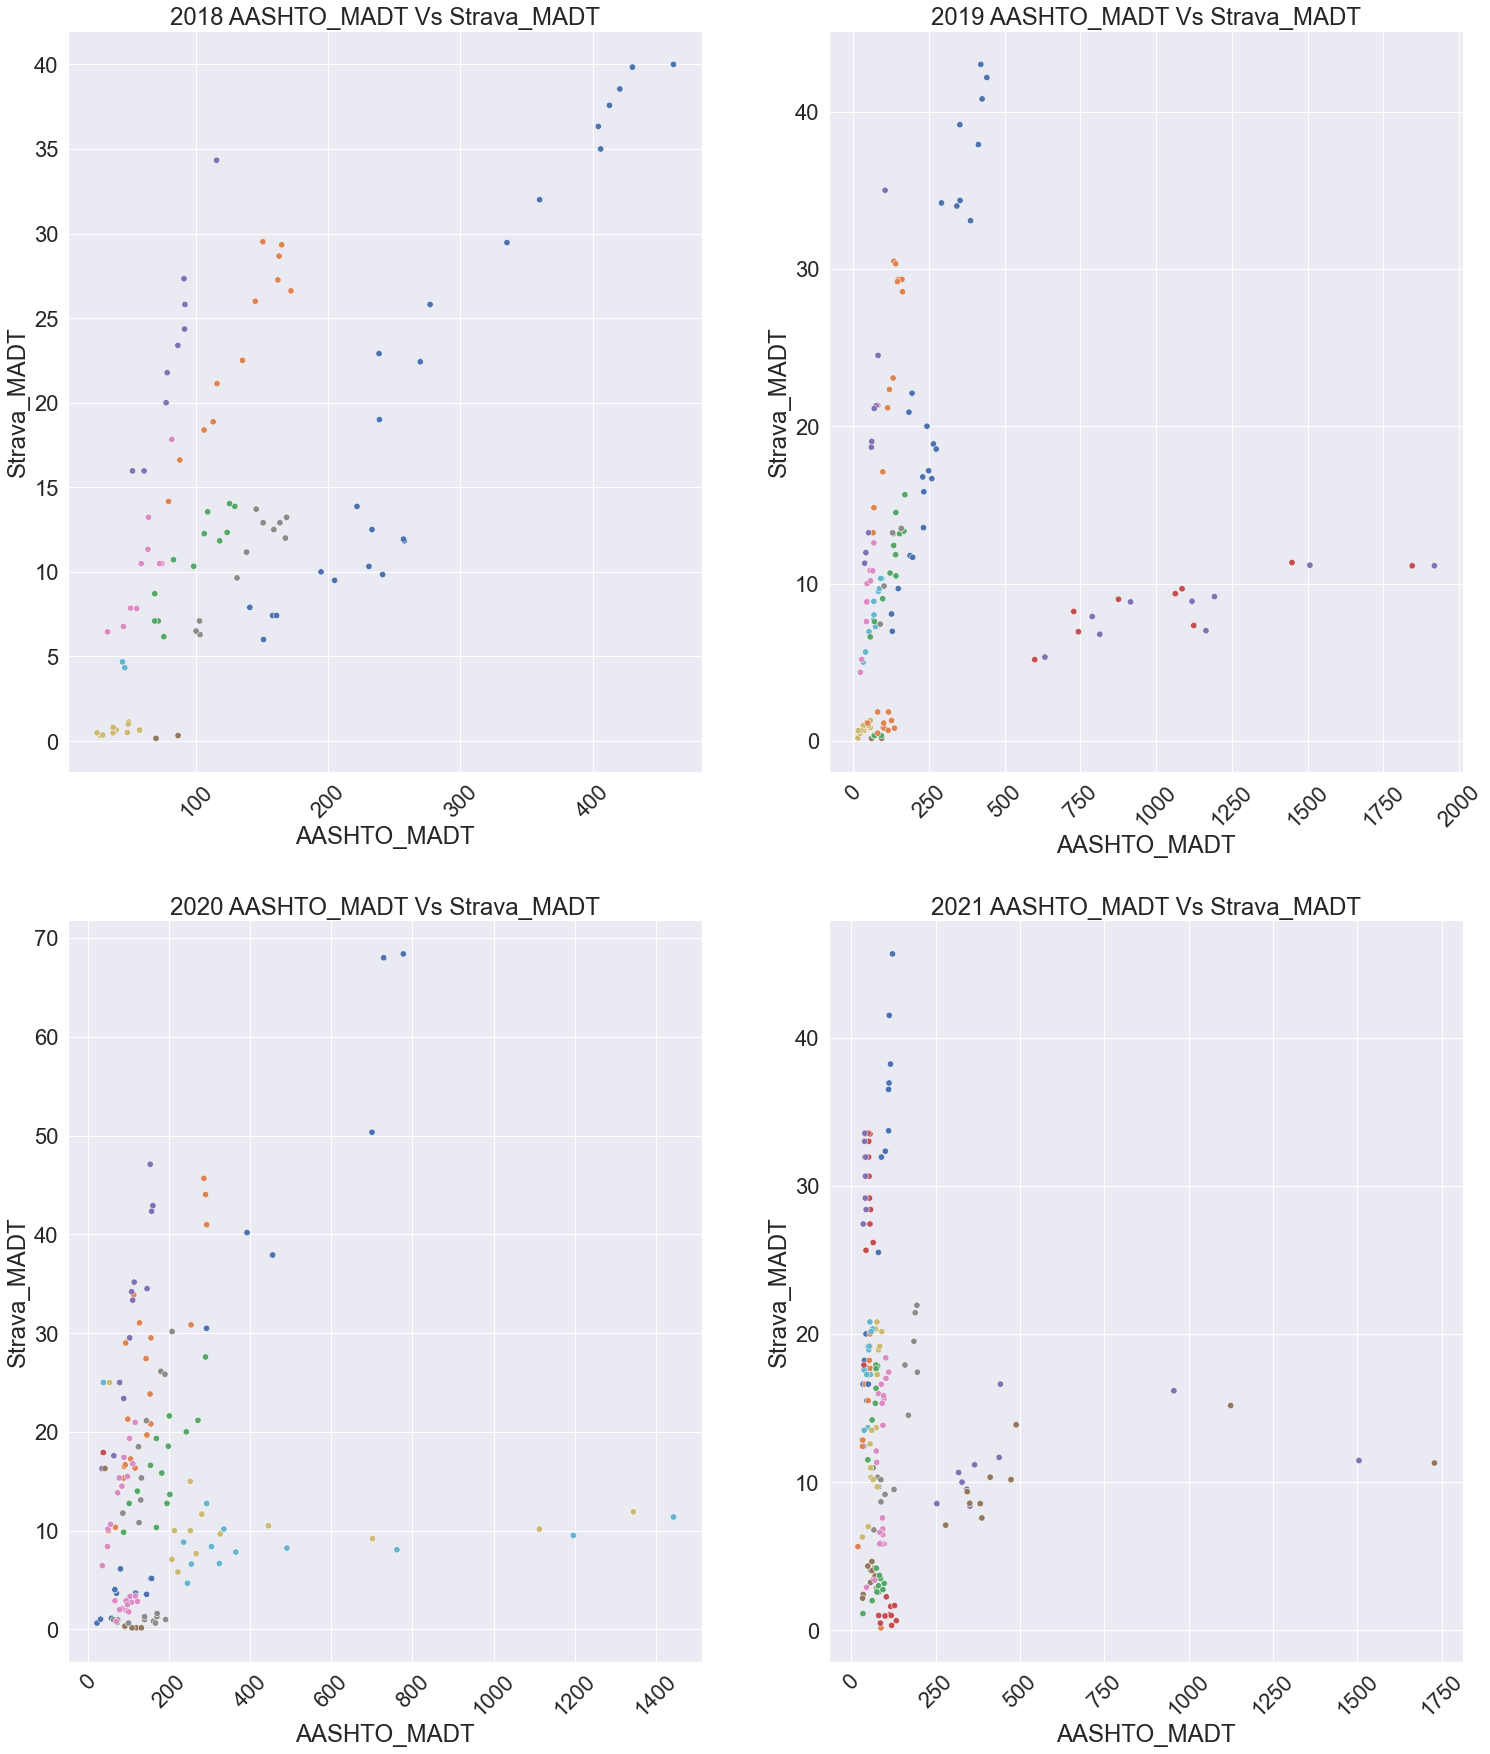

In [157]:
nine_b=pzone1.loc[pzone1['ZONE']=='9b']
path_cor(nine_b)

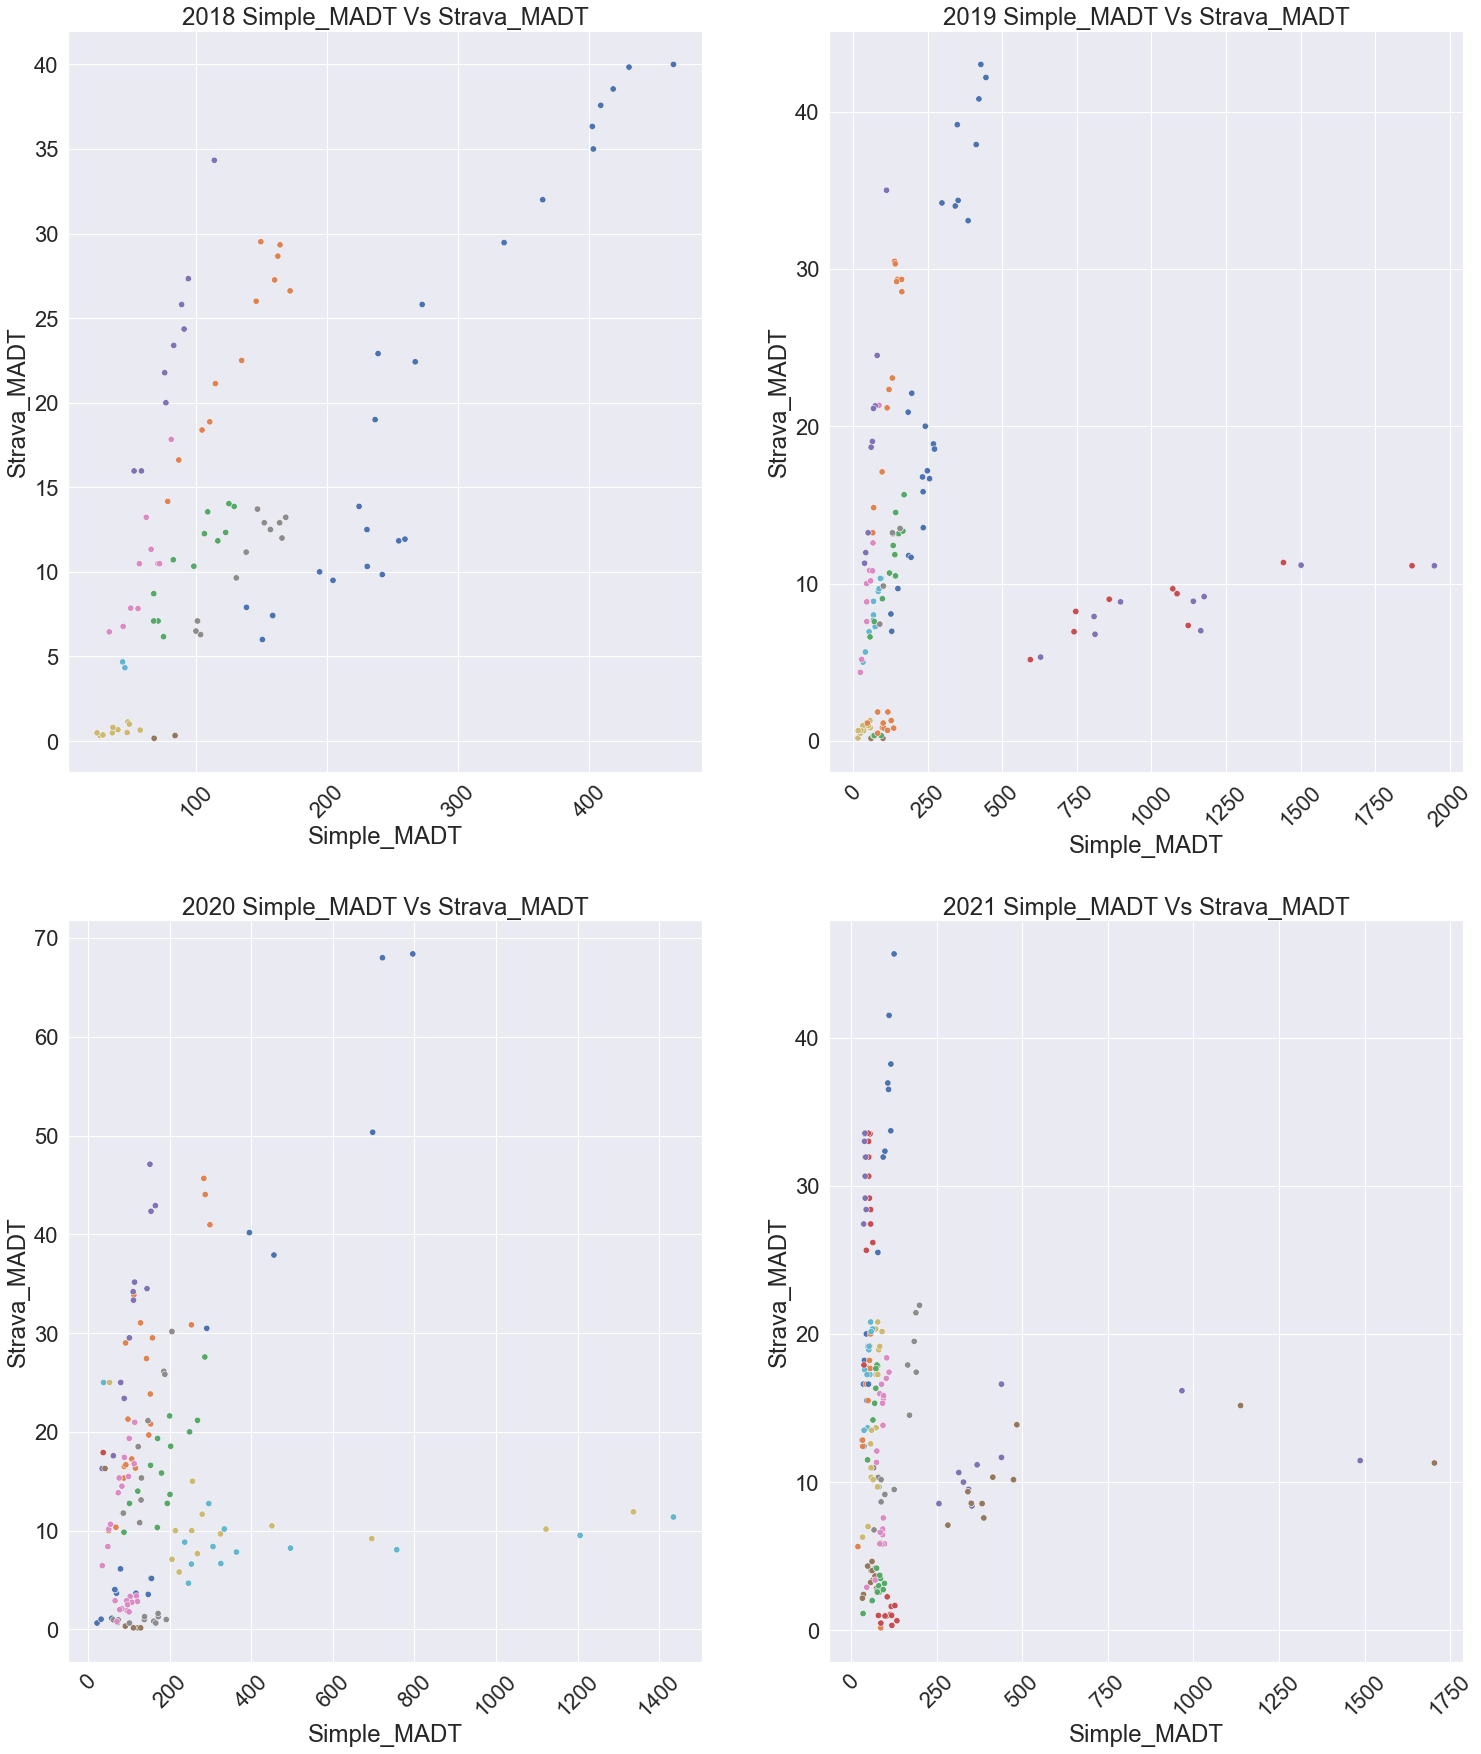

In [158]:
path_cor_simple(nine_b)

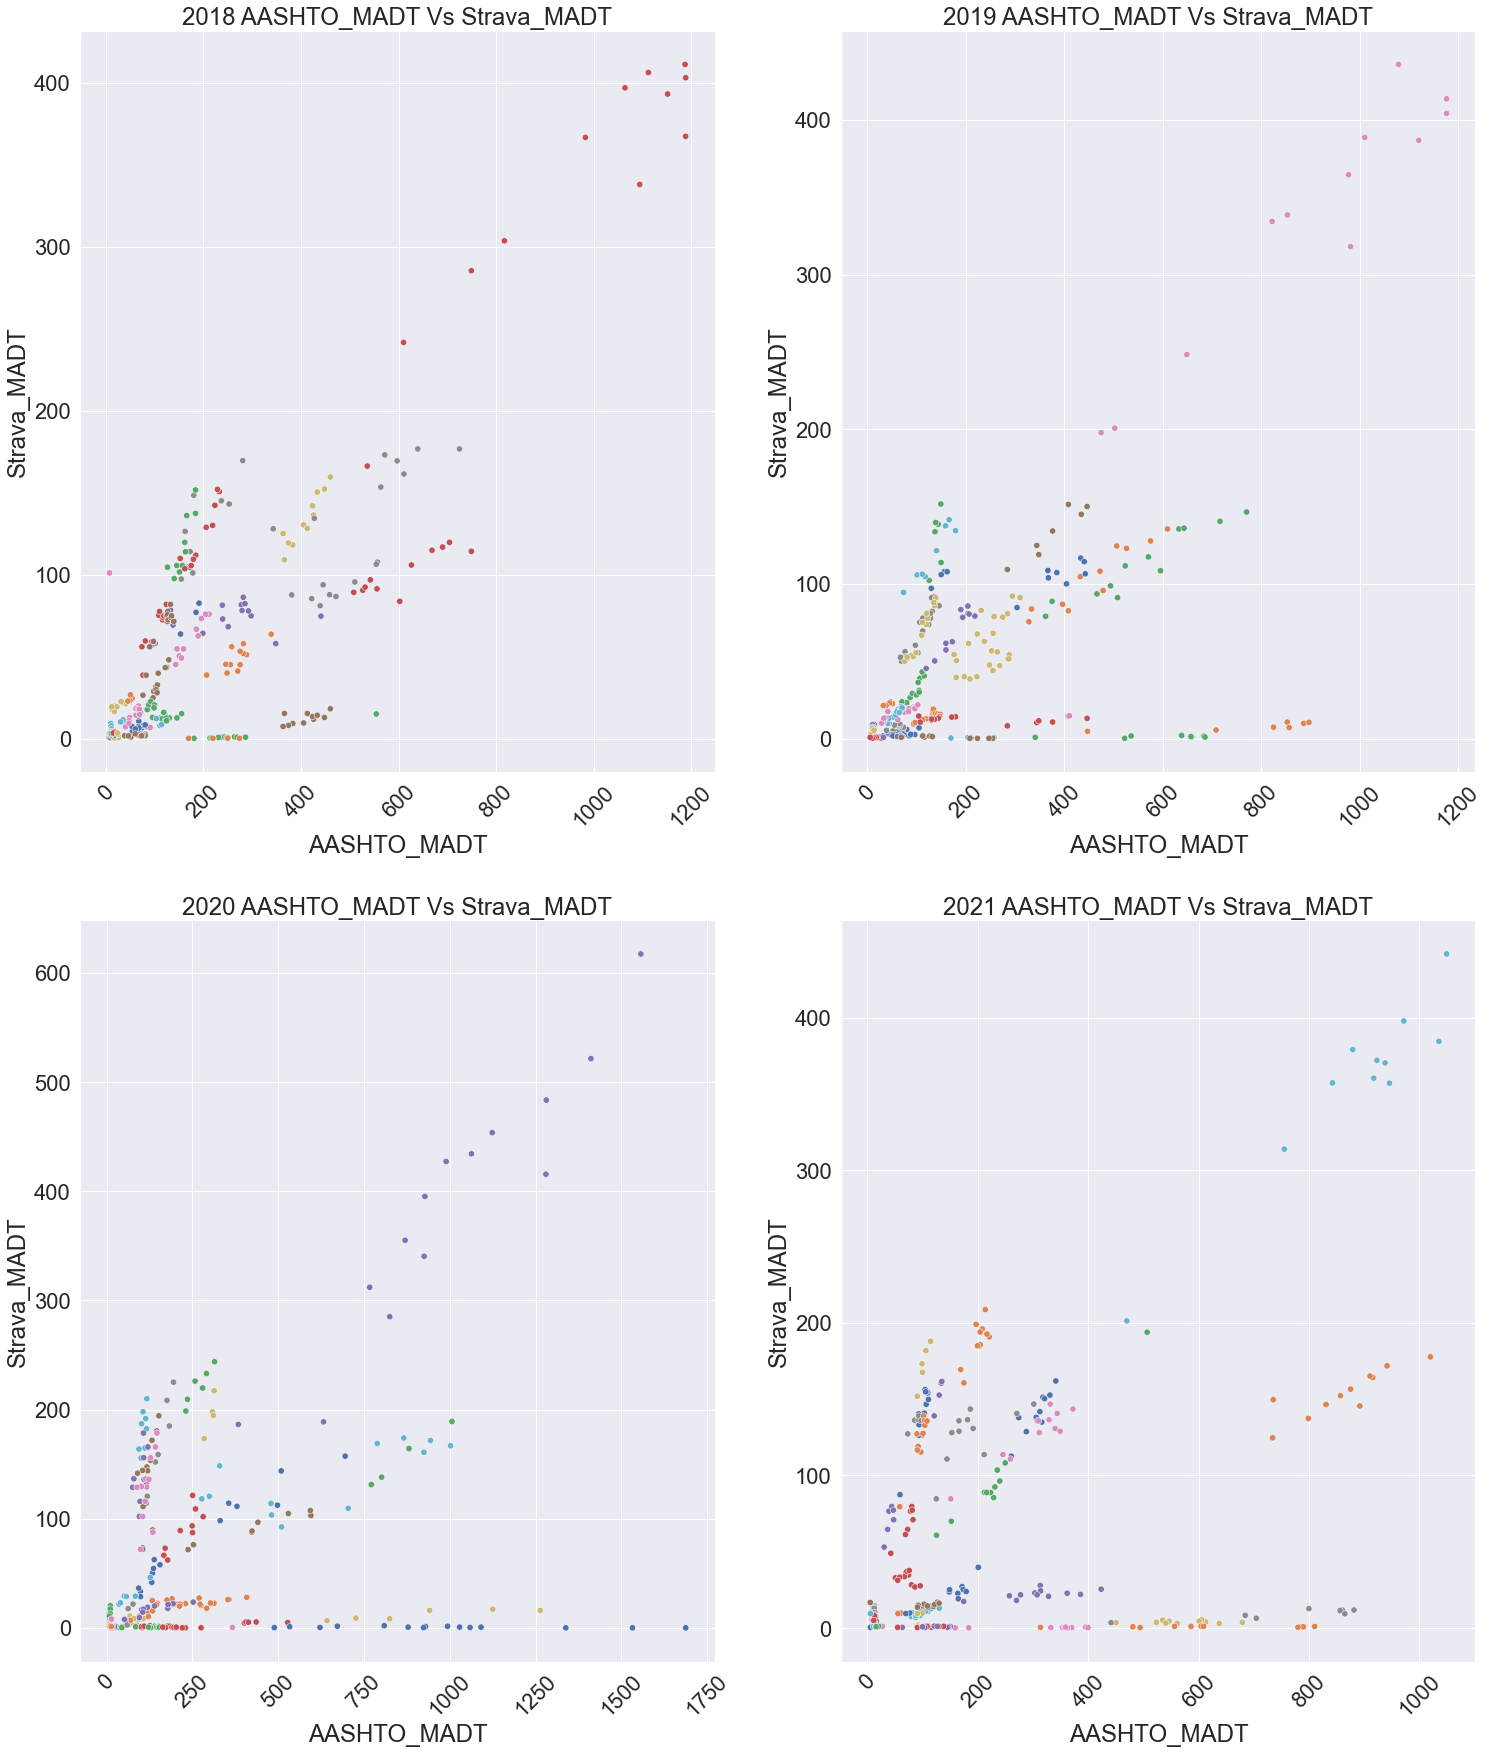

In [171]:
ten_a=pzone1.loc[pzone1['ZONE']=='10a']
path_cor(ten_a)

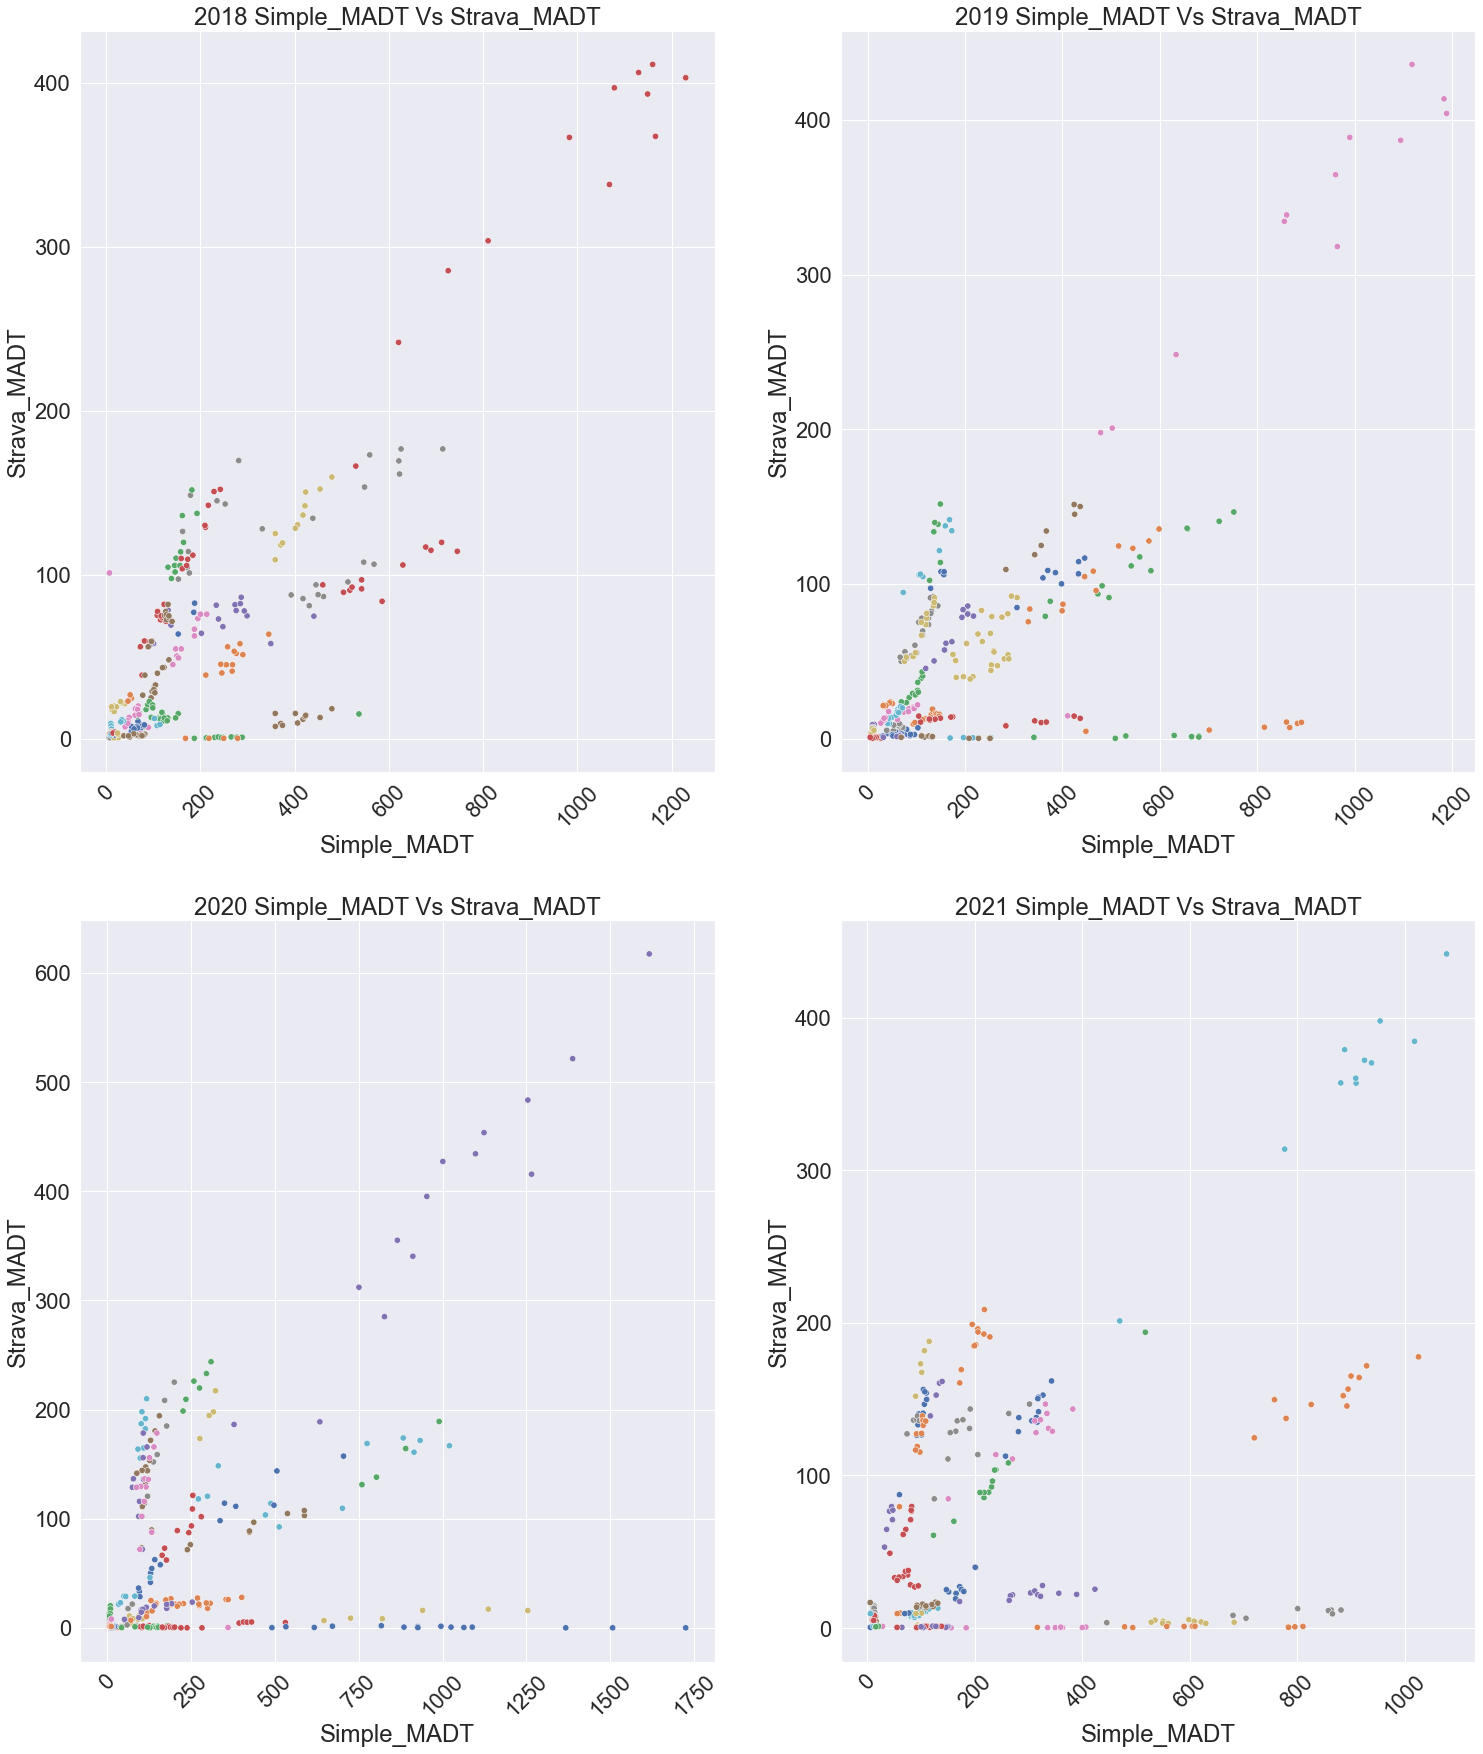

In [173]:
path_cor_simple(ten_a)

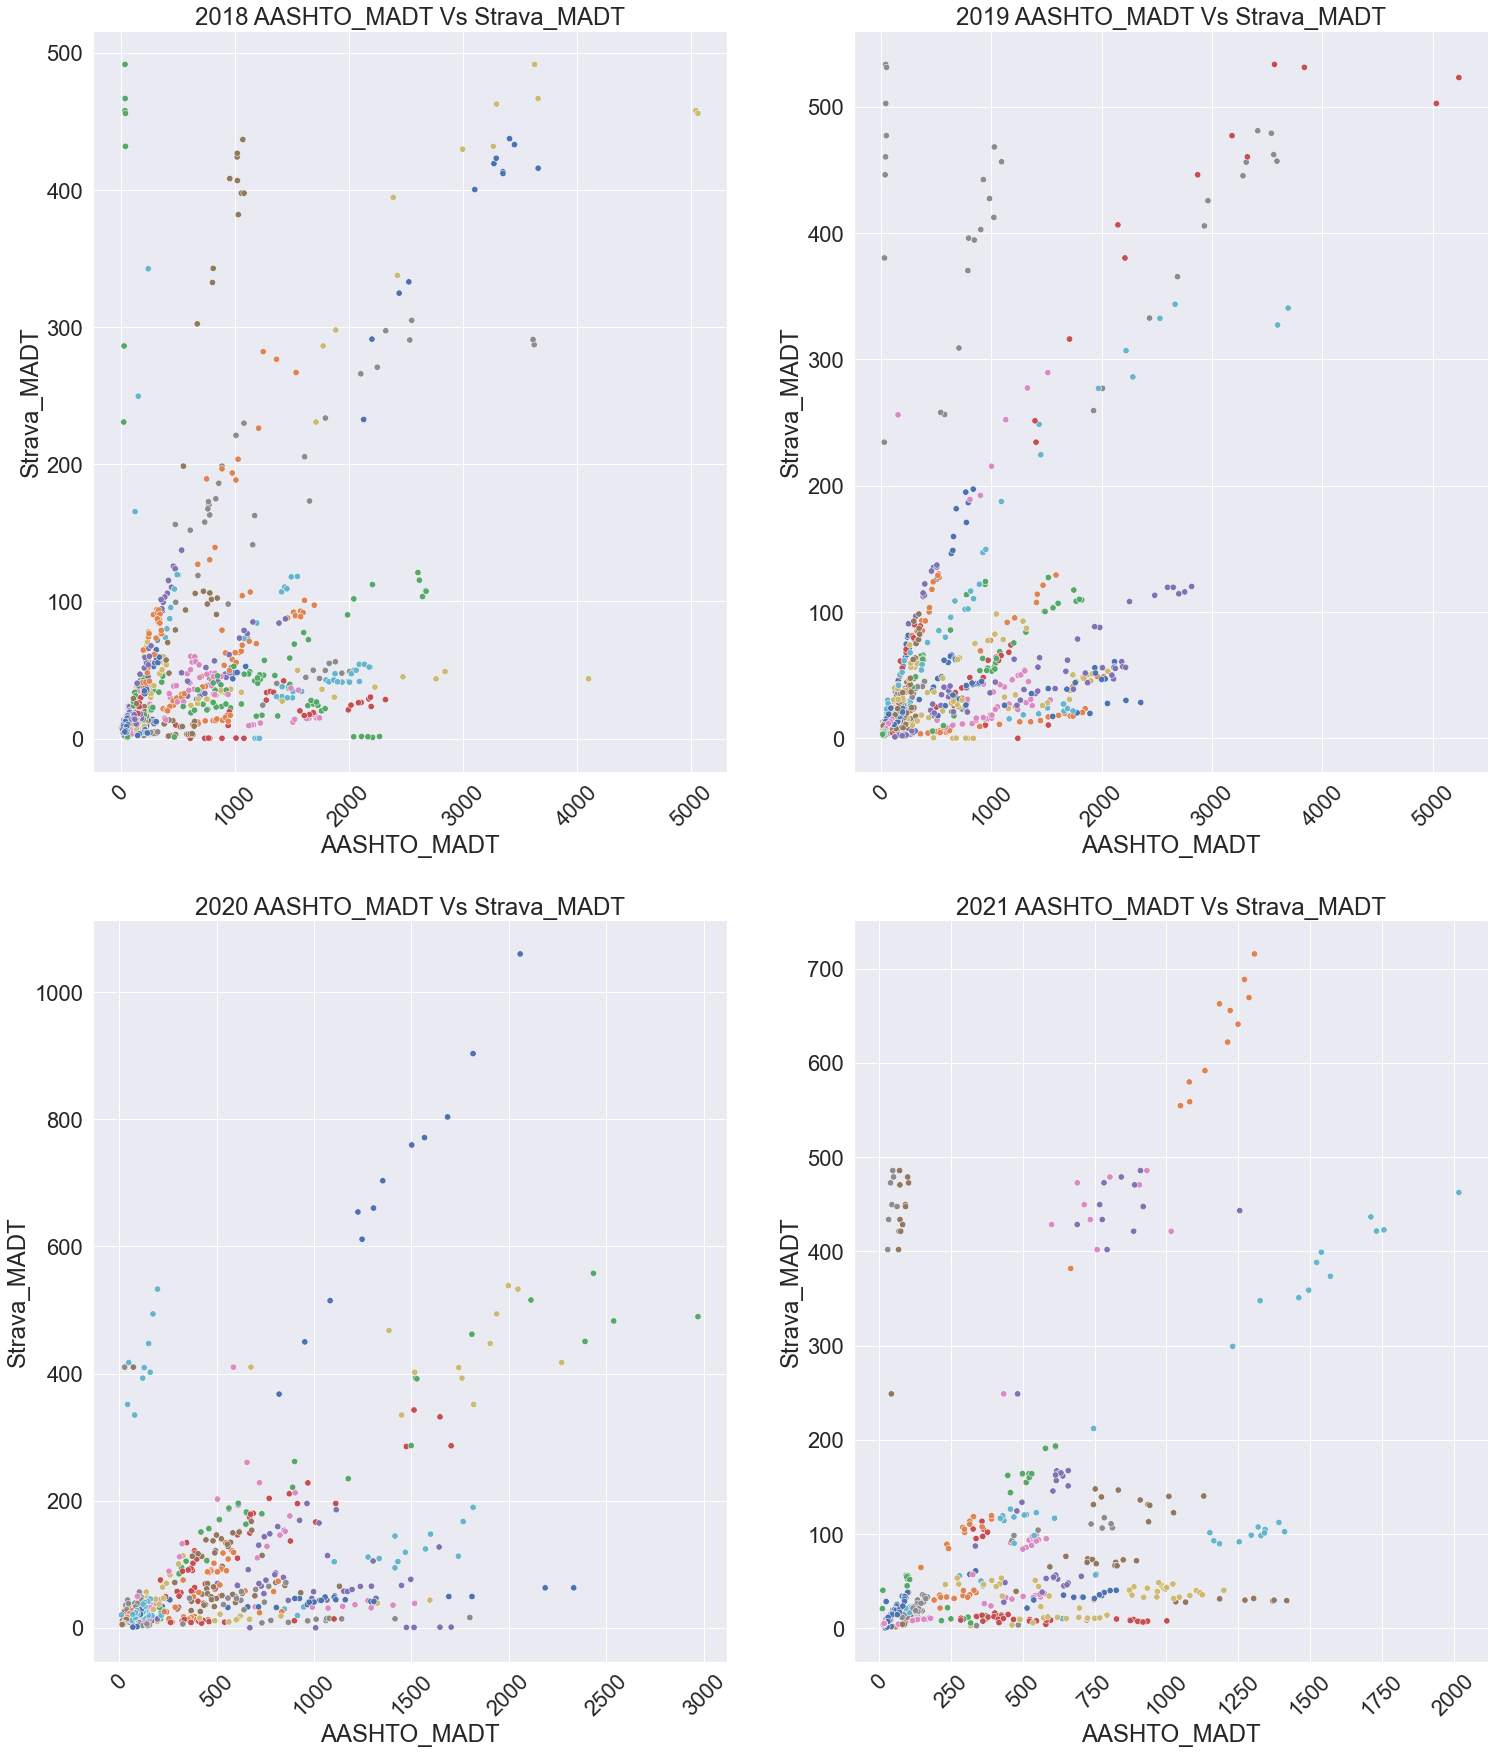

In [177]:
ten_b=pzone1.loc[pzone1['ZONE']=='10b']
path_cor(ten_b)

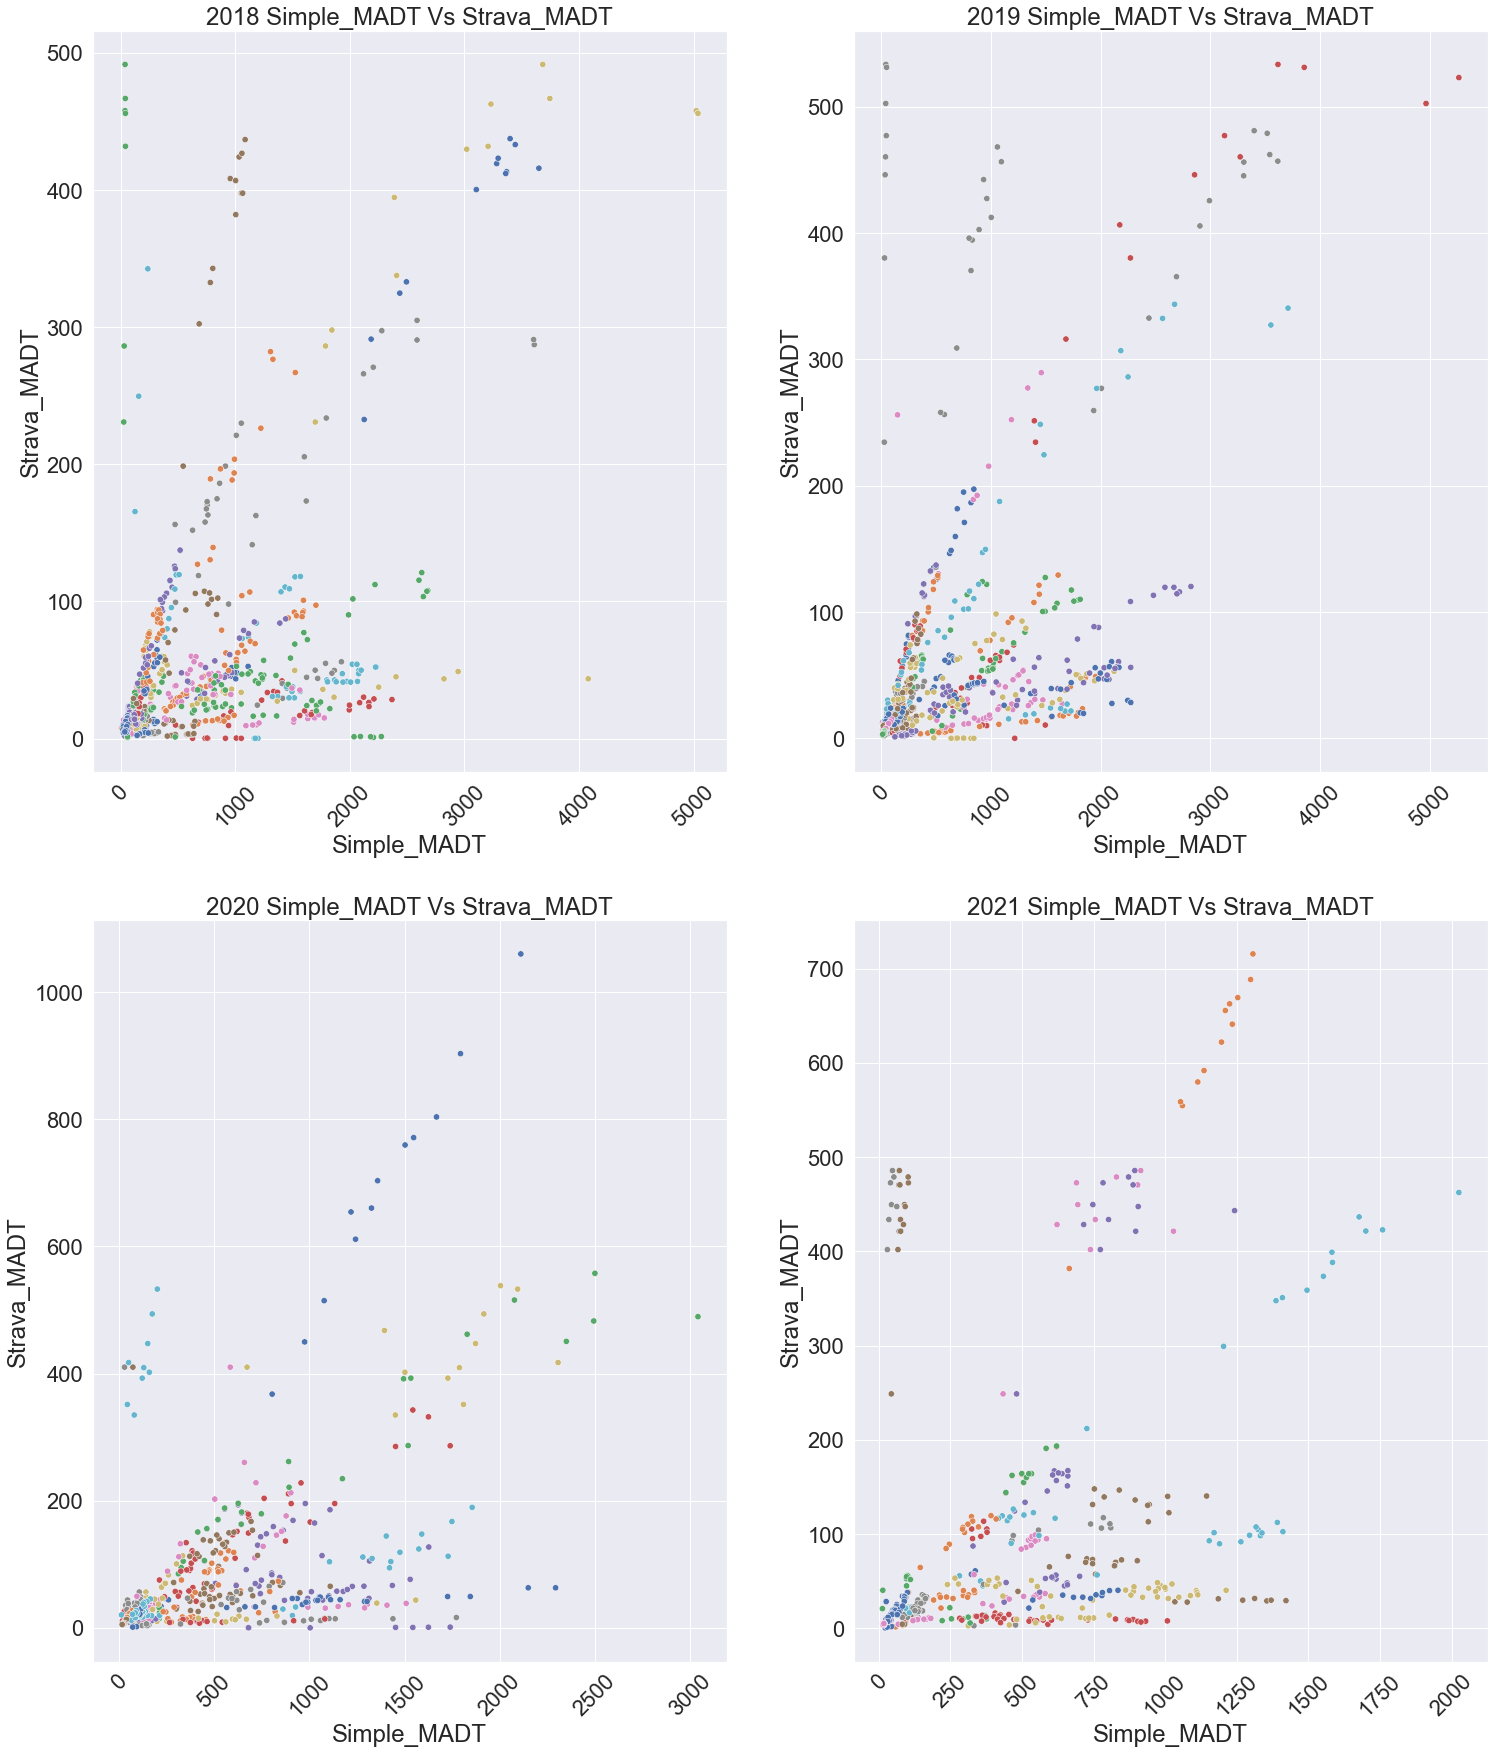

In [178]:
path_cor_simple(ten_b)

In [185]:
ten_b

OBJECTID  Field1     ID location  latitude  longitude  year  month  \
44          45      44   3578    urban     32.58    -117.13  2018      1   
45          46      45   3578    urban     32.58    -117.13  2018      2   
46          47      46   3578    urban     32.58    -117.13  2018      3   
47          48      47   3578    urban     32.58    -117.13  2018      4   
48          49      48   3578    urban     32.58    -117.13  2018      5   
...        ...     ...    ...      ...       ...        ...   ...    ...   
4486      4527    4526  14390    urban     37.82    -122.33  2021      8   
4487      4528    4527  14390    urban     37.82    -122.33  2021      9   
4488      4529    4528  14390    urban     37.82    -122.33  2021     10   
4489      4530    4529  14390    urban     37.82    -122.33  2021     11   
4490      4531    4530  14390    urban     37.82    -122.33  2021     12   

       MTT  days_in_month  ...  Join_Count  TARGET_FID  JOIN_FID STATEFP  \
44    3268             31  ...           1          45      3697       6   
45    3020             28  ...           1          46      3697       6   
46    3296             31  ...           1          47      3697       6   
47    3638             30  ...           1          48      3697       6   
48    3657             31  ...           1          49      3697       6   
...    ...            ...  ...         ...         ...       ...     ...   
4486  9096             31  ...           1        4527      1699       6   
4487  8762             30  ...           1        4528      1699       6   
4488  7628             31  ...           1        4529      1699       6   
4489  7043             30  ...           1        4530      1699       6   
4490  4477             31  ...           1        4531      1699       6   

     STUSPS         NAME TEMP ZONE Shape_Leng Strava_MADT  
44       CA  Palm Avenue   35  10b       1.41        8.39  
45       CA  Palm Avenue   35  10b       1.41        8.39  
46       CA  Palm Avenue   35  10b       1.41        6.61  
47       CA  Palm Avenue   35  10b       1.41        9.50  
48       CA  Palm Avenue   35  10b       1.41        9.03  
...     ...          ...  ...  ...        ...         ...  
4486     CA          NaN   35  10b       0.30      107.10  
4487     CA          NaN   35  10b       0.30      105.17  
4488     CA          NaN   35  10b       0.30       89.19  
4489     CA          NaN   35  10b       0.30       84.67  
4490     CA          NaN   35  10b       0.30       64.52  

[2727 rows x 56 columns]

In [184]:
corr, _ = pearsonr(six_b['Simple_MADT'], six_b['Strava_MADT'])
print('Pearsons 6b correlation: %.3f' % corr)
corr, _ = pearsonr(six_b['AASHTO_MADT'], six_b['Strava_MADT'])
print('Pearsons 6b correlation: %.3f' % corr)

Pearsons 6b correlation: 0.671
Pearsons 6b correlation: 0.670


In [183]:
corr, _ = pearsonr(seven_a['Simple_MADT'], seven_a['Strava_MADT'])
print('Pearsons 7a correlation: %.3f' % corr)
corr, _ = pearsonr(seven_a['AASHTO_MADT'], seven_a['Strava_MADT'])
print('Pearsons 7a correlation: %.3f' % corr)

Pearsons 7a correlation: 0.835
Pearsons 7a correlation: 0.834


In [182]:
corr, _ = pearsonr(nine_b['Simple_MADT'], nine_b['Strava_MADT'])
print('Pearsons nine_b correlation: %.3f' % corr)
corr, _ = pearsonr(nine_b['AASHTO_MADT'], nine_b['Strava_MADT'])
print('Pearsons nine_b correlation: %.3f' % corr)

Pearsons nine_b correlation: 0.015
Pearsons nine_b correlation: 0.014


In [181]:
corr, _ = pearsonr(ten_a['Simple_MADT'], ten_a['Strava_MADT'])
print('Pearsons 10 aSimple correlation: %.3f' % corr)
corr, _ = pearsonr(ten_a['AASHTO_MADT'], ten_a['Strava_MADT'])
print('Pearsons 10z AASHTO correlation: %.3f' % corr)

Pearsons 10 aSimple correlation: 0.574
Pearsons 10z AASHTO correlation: 0.574


In [180]:
corr, _ = pearsonr(ten_b['Simple_MADT'], ten_b['Strava_MADT'])
print('Pearsons 10b Simple correlation: %.3f' % corr)
corr, _ = pearsonr(ten_b['AASHTO_MADT'], ten_b['Strava_MADT'])
print('Pearsons 10b AASHTO correlation: %.3f' % corr)

Pearsons 10b Simple correlation: 0.433
Pearsons 10b AASHTO correlation: 0.433


# end of Coding